## Keras Tutorial own data

In [161]:
import os, json
import re
import zipfile
import cv2

import xml.etree.ElementTree as ET
from xml.etree.ElementTree import parse, Element, SubElement, ElementTree

import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
# import tensorflow_datasets as tfds

In [2]:
CUDA_AVAILABLE_DEVICES = ["0"]

In [162]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13571241453337808063
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15505555456
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16288280985183522099
physical_device_desc: "device: 0, name: Quadro P5000, pci bus id: 0000:04:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [163]:
print(tf.__version__)

2.7.0


In [5]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""A script for testing that TensorFlow is installed correctly on Windows.

The script will attempt to verify your TensorFlow installation, and print
suggestions for how to fix your installation.
"""

import ctypes
import imp
import sys

def main():
  try:
    import tensorflow as tf
    print("TensorFlow successfully installed.")
    if tf.test.is_built_with_cuda():
      print("The installed version of TensorFlow includes GPU support.")
    else:
      print("The installed version of TensorFlow does not include GPU support.")
    sys.exit(0)
  except ImportError:
    print("ERROR: Failed to import the TensorFlow module.")

  candidate_explanation = False

  python_version = sys.version_info.major, sys.version_info.minor
  print("\n- Python version is %d.%d." % python_version)
  if not (python_version == (3, 5) or python_version == (3, 6)):
    candidate_explanation = True
    print("- The official distribution of TensorFlow for Windows requires "
          "Python version 3.5 or 3.6.")
  
  try:
    _, pathname, _ = imp.find_module("tensorflow")
    print("\n- TensorFlow is installed at: %s" % pathname)
  except ImportError:
    candidate_explanation = False
    print("""
- No module named TensorFlow is installed in this Python environment. You may
  install it using the command `pip install tensorflow`.""")

  try:
    msvcp140 = ctypes.WinDLL("msvcp140.dll")
  except OSError:
    candidate_explanation = True
    print("""
- Could not load 'msvcp140.dll'. TensorFlow requires that this DLL be
  installed in a directory that is named in your %PATH% environment
  variable. You may install this DLL by downloading Microsoft Visual
  C++ 2015 Redistributable Update 3 from this URL:
  https://www.microsoft.com/en-us/download/details.aspx?id=53587""")

  try:
    cudart64_80 = ctypes.WinDLL("cudart64_80.dll")
  except OSError:
    candidate_explanation = True
    print("""
- Could not load 'cudart64_80.dll'. The GPU version of TensorFlow
  requires that this DLL be installed in a directory that is named in
  your %PATH% environment variable. Download and install CUDA 8.0 from
  this URL: https://developer.nvidia.com/cuda-toolkit""")

  try:
    nvcuda = ctypes.WinDLL("nvcuda.dll")
  except OSError:
    candidate_explanation = True
    print("""
- Could not load 'nvcuda.dll'. The GPU version of TensorFlow requires that
  this DLL be installed in a directory that is named in your %PATH%
  environment variable. Typically it is installed in 'C:\Windows\System32'.
  If it is not present, ensure that you have a CUDA-capable GPU with the
  correct driver installed.""")

  cudnn5_found = False
  try:
    cudnn5 = ctypes.WinDLL("cudnn64_5.dll")
    cudnn5_found = True
  except OSError:
    candidate_explanation = True
    print("""
- Could not load 'cudnn64_5.dll'. The GPU version of TensorFlow
  requires that this DLL be installed in a directory that is named in
  your %PATH% environment variable. Note that installing cuDNN is a
  separate step from installing CUDA, and it is often found in a
  different directory from the CUDA DLLs. You may install the
  necessary DLL by downloading cuDNN 5.1 from this URL:
  https://developer.nvidia.com/cudnn""")

  cudnn6_found = False
  try:
    cudnn = ctypes.WinDLL("cudnn64_6.dll")
    cudnn6_found = True
  except OSError:
    candidate_explanation = True

  if not cudnn5_found or not cudnn6_found:
    print()
    if not cudnn5_found and not cudnn6_found:
      print("- Could not find cuDNN.")
    elif not cudnn5_found:
      print("- Could not find cuDNN 5.1.")
    else:
      print("- Could not find cuDNN 6.")
      print("""
  The GPU version of TensorFlow requires that the correct cuDNN DLL be installed
  in a directory that is named in your %PATH% environment variable. Note that
  installing cuDNN is a separate step from installing CUDA, and it is often
  found in a different directory from the CUDA DLLs. The correct version of
  cuDNN depends on your version of TensorFlow:
  
  * TensorFlow 1.2.1 or earlier requires cuDNN 5.1. ('cudnn64_5.dll')
  * TensorFlow 1.3 or later requires cuDNN 6. ('cudnn64_6.dll')
    
  You may install the necessary DLL by downloading cuDNN from this URL:
  https://developer.nvidia.com/cudnn""")
    
  if not candidate_explanation:
    print("""
- All required DLLs appear to be present. Please open an issue on the
  TensorFlow GitHub page: https://github.com/tensorflow/tensorflow/issues""")

  sys.exit(-1)

if __name__ == "__main__":
  main()

TensorFlow successfully installed.
The installed version of TensorFlow includes GPU support.


SystemExit: 0

C:\Users\Susanne\miniconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3369: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [5]:
# url = "https://github.com/srihari-humbarwadi/datasets/releases/download/v0.1.0/data.zip"
# filename = os.path.join(os.getcwd(), "data.zip")
# keras.utils.get_file(filename, url)


# with zipfile.ZipFile("data.zip", "r") as z_fp:
#     z_fp.extractall("./")

In [165]:
def swap_xy(boxes):
    """Swaps order the of x and y coordinates of the boxes.

    Arguments:
      boxes: A tensor with shape `(num_boxes, 4)` representing bounding boxes.

    Returns:
      swapped boxes with shape same as that of boxes.
    """
    return tf.stack([boxes[:, 1], boxes[:, 0], boxes[:, 3], boxes[:, 2]], axis=-1)


def convert_to_xywh(boxes):
    """Changes the box format to center, width and height.

    Arguments:
      boxes: A tensor of rank 2 or higher with a shape of `(..., num_boxes, 4)`
        representing bounding boxes where each box is of the format
        `[xmin, ymin, xmax, ymax]`.

    Returns:
      converted boxes with shape same as that of boxes.
    """
    return tf.concat(
        [(boxes[..., :2] + boxes[..., 2:]) / 2.0, boxes[..., 2:] - boxes[..., :2]],
        axis=-1,
    )


def convert_to_corners(boxes):
    """Changes the box format to corner coordinates

    Arguments:
      boxes: A tensor of rank 2 or higher with a shape of `(..., num_boxes, 4)`
        representing bounding boxes where each box is of the format
        `[x, y, width, height]`.

    Returns:
      converted boxes with shape same as that of boxes.
    """
    return tf.concat(
        [boxes[..., :2] - boxes[..., 2:] / 2.0, boxes[..., :2] + boxes[..., 2:] / 2.0],
        axis=-1,
    )

In [166]:
def compute_iou(boxes1, boxes2):
    """Computes pairwise IOU matrix for given two sets of boxes

    Arguments:
      boxes1: A tensor with shape `(N, 4)` representing bounding boxes
        where each box is of the format `[x, y, width, height]`.
        boxes2: A tensor with shape `(M, 4)` representing bounding boxes
        where each box is of the format `[x, y, width, height]`.

    Returns:
      pairwise IOU matrix with shape `(N, M)`, where the value at ith row
        jth column holds the IOU between ith box and jth box from
        boxes1 and boxes2 respectively.
    """
    boxes1_corners = convert_to_corners(boxes1)
    boxes2_corners = convert_to_corners(boxes2)
    lu = tf.maximum(boxes1_corners[:, None, :2], boxes2_corners[:, :2])
    rd = tf.minimum(boxes1_corners[:, None, 2:], boxes2_corners[:, 2:])
    intersection = tf.maximum(0.0, rd - lu)
    intersection_area = intersection[:, :, 0] * intersection[:, :, 1]
    boxes1_area = boxes1[:, 2] * boxes1[:, 3]
    boxes2_area = boxes2[:, 2] * boxes2[:, 3]
    union_area = tf.maximum(
        boxes1_area[:, None] + boxes2_area - intersection_area, 1e-8
    )
    return tf.clip_by_value(intersection_area / union_area, 0.0, 1.0)


def visualize_detections(
    image, boxes, classes, scores, ax=None, figsize=(7, 7), linewidth=1, color=[0, 0, 1]
):
    """Visualize Detections"""
    image = np.array(image, dtype=np.uint8)

    plt.axis("off")
    plt.imshow(image)
    if ax is None:
        # plt.figure(figsize=figsize)
        ax = plt.gca()
    for box, _cls, score in zip(boxes, classes, scores):
        text = "{}: {:.2f}".format(_cls, score)
        x1, y1, x2, y2 = box
        w, h = x2 - x1, y2 - y1
        patch = plt.Rectangle(
            [x1, y1], w, h, fill=False, edgecolor=color, linewidth=linewidth
        )
        ax.add_patch(patch)
        ax.text(
            x1,
            y1,
            text,
            bbox={"facecolor": color, "alpha": 0.4},
            clip_box=ax.clipbox,
            clip_on=True,
        )
#     plt.show()
    return ax

In [167]:
class AnchorBox:
    """Generates anchor boxes.

    This class has operations to generate anchor boxes for feature maps at
    strides `[8, 16, 32, 64, 128]`. Where each anchor each box is of the
    format `[x, y, width, height]`.

    Attributes:
      aspect_ratios: A list of float values representing the aspect ratios of
        the anchor boxes at each location on the feature map
      scales: A list of float values representing the scale of the anchor boxes
        at each location on the feature map.
      num_anchors: The number of anchor boxes at each location on feature map
      areas: A list of float values representing the areas of the anchor
        boxes for each feature map in the feature pyramid.
      strides: A list of float value representing the strides for each feature
        map in the feature pyramid.
    """

    def __init__(self):
        self.aspect_ratios = [0.5, 1.0, 2.0]
        self.scales = [2 ** x for x in [0, 1 / 3, 2 / 3]]

        self._num_anchors = len(self.aspect_ratios) * len(self.scales)
        self._strides = [2 ** i for i in range(3, 8)]
        self._areas = [x ** 2 for x in [32.0, 64.0, 128.0, 256.0, 512.0]]
        self._anchor_dims = self._compute_dims()

    def _compute_dims(self):
        """Computes anchor box dimensions for all ratios and scales at all levels
        of the feature pyramid.
        """
        anchor_dims_all = []
        for area in self._areas:
            anchor_dims = []
            for ratio in self.aspect_ratios:
                anchor_height = tf.math.sqrt(area / ratio)
                anchor_width = area / anchor_height
                dims = tf.reshape(
                    tf.stack([anchor_width, anchor_height], axis=-1), [1, 1, 2]
                )
                for scale in self.scales:
                    anchor_dims.append(scale * dims)
            anchor_dims_all.append(tf.stack(anchor_dims, axis=-2))
        return anchor_dims_all

    def _get_anchors(self, feature_height, feature_width, level):
        """Generates anchor boxes for a given feature map size and level

        Arguments:
          feature_height: An integer representing the height of the feature map.
          feature_width: An integer representing the width of the feature map.
          level: An integer representing the level of the feature map in the
            feature pyramid.

        Returns:
          anchor boxes with the shape
          `(feature_height * feature_width * num_anchors, 4)`
        """
        rx = tf.range(feature_width, dtype=tf.float32) + 0.5
        ry = tf.range(feature_height, dtype=tf.float32) + 0.5
        centers = tf.stack(tf.meshgrid(rx, ry), axis=-1) * self._strides[level - 3]
        centers = tf.expand_dims(centers, axis=-2)
        centers = tf.tile(centers, [1, 1, self._num_anchors, 1])
        dims = tf.tile(
            self._anchor_dims[level - 3], [feature_height, feature_width, 1, 1]
        )
        anchors = tf.concat([centers, dims], axis=-1)
        return tf.reshape(
            anchors, [feature_height * feature_width * self._num_anchors, 4]
        )

    def get_anchors(self, image_height, image_width):
        """Generates anchor boxes for all the feature maps of the feature pyramid.

        Arguments:
          image_height: Height of the input image.
          image_width: Width of the input image.

        Returns:
          anchor boxes for all the feature maps, stacked as a single tensor
            with shape `(total_anchors, 4)`
        """
        anchors = [
            self._get_anchors(
                tf.math.ceil(image_height / 2 ** i),
                tf.math.ceil(image_width / 2 ** i),
                i,
            )
            for i in range(3, 8)
        ]
        return tf.concat(anchors, axis=0)

In [168]:
def random_flip_horizontal(image, boxes):
    """Flips image and boxes horizontally with 50% chance

    Arguments:
      image: A 3-D tensor of shape `(height, width, channels)` representing an
        image.
      boxes: A tensor with shape `(num_boxes, 4)` representing bounding boxes,
        having normalized coordinates.

    Returns:
      Randomly flipped image and boxes
    """    
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        boxes = tf.stack(
            [1 - boxes[:, 2], boxes[:, 1], 1 - boxes[:, 0], boxes[:, 3]], axis=-1
        )
    return image, boxes


def resize_and_pad_image(
    image, min_side=800.0, max_side=1333.0, jitter=[640, 1024], stride=128.0
):
    """Resizes and pads image while preserving aspect ratio.

    1. Resizes images so that the shorter side is equal to `min_side`
    2. If the longer side is greater than `max_side`, then resize the image
      with longer side equal to `max_side`
    3. Pad with zeros on right and bottom to make the image shape divisible by
    `stride`

    Arguments:
      image: A 3-D tensor of shape `(height, width, channels)` representing an
        image.
      min_side: The shorter side of the image is resized to this value, if
        `jitter` is set to None.
      max_side: If the longer side of the image exceeds this value after
        resizing, the image is resized such that the longer side now equals to
        this value.
      jitter: A list of floats containing minimum and maximum size for scale
        jittering. If available, the shorter side of the image will be
        resized to a random value in this range.
      stride: The stride of the smallest feature map in the feature pyramid.
        Can be calculated using `image_size / feature_map_size`.

    Returns:
      image: Resized and padded image.
      image_shape: Shape of the image before padding.
      ratio: The scaling factor used to resize the image
    """
    image_shape = tf.cast(tf.shape(image)[:2], dtype=tf.float32)
    if jitter is not None:
        min_side = tf.random.uniform((), jitter[0], jitter[1], dtype=tf.float32)
    ratio = min_side / tf.reduce_min(image_shape)
    if ratio * tf.reduce_max(image_shape) > max_side:
        ratio = max_side / tf.reduce_max(image_shape)
    image_shape = ratio * image_shape
    image = tf.image.resize(image, tf.cast(image_shape, dtype=tf.int32))
    padded_image_shape = tf.cast(
        tf.math.ceil(image_shape / stride) * stride, dtype=tf.int32
    )
    image = tf.image.pad_to_bounding_box(
        image, 0, 0, padded_image_shape[0], padded_image_shape[1]
    )
    return image, image_shape, ratio


def preprocess_data(sample):
    """Applies preprocessing step to a single sample

    Arguments:
      sample: A dict representing a single training sample.

    Returns:
      image: Resized and padded image with random horizontal flipping applied.
      bbox: Bounding boxes with the shape `(num_objects, 4)` where each box is
        of the format `[x, y, width, height]`.
      class_id: An tensor representing the class id of the objects, having
        shape `(num_objects,)`.
    """ 
#     name = sample['filename']
#     print(name)
#     image = json_dict_2[name]['image']
#     bbox = json_dict_2[name]['objects']['bbox']
#     class_id = json_dict_2[name]['objects']['label']
    
#     image = tf.cast(image, dtype=tf.int32)
    
    image = sample["image"]    
    _bbox = swap_xy(sample["objects"]["bbox"])
#     _bbox = tf.cast(bbox, dtype=tf.float32)
    class_id = tf.cast(sample["objects"]["label"], dtype=tf.int32)
    length = sample["length"]
#     print(length)
    
#     _bbox = _bbox.numpy()
    
#     index = 0
#     for i in range(len(_bbox)):
#         if _bbox[i][0] != 0:
#             index = i + 1
#         else:
#             index = index

    bbox = tf.stack(_bbox[:length],axis=0)
    class_id = tf.stack(class_id[:length],axis=0)

#     class_id = [0]*len(bbox)
    
#     bbox = _bbox
    class_id = tf.cast(class_id, dtype=tf.int32)
    bbox = tf.cast(bbox, dtype=tf.float32)
#     print(bbox)
#     bbox_ = tf.stack([_bbox[0]],axis=0)
#     print(bbox_)
    
#     bbox_values = tf.get_static_value(boxes, partial=False)

#     for i in range(len(bbox_values)):
#         if bbox_values[i][0] == 0:
#             break
#     boxes = tf.slice(bbox,[0,0], [i, 4])

    image, bbox = random_flip_horizontal(image, bbox)
    image, image_shape, _ = resize_and_pad_image(image)
#     image = tf.cast(image, dtype=tf.float32)

    bbox = tf.stack(
        [
            bbox[:, 0] * image_shape[1],
            bbox[:, 1] * image_shape[0],
            bbox[:, 2] * image_shape[1],
            bbox[:, 3] * image_shape[0],
        ],
        axis=-1,
    )
    bbox = convert_to_xywh(bbox)
    return image, bbox, class_id

In [169]:
# for sample in train_dataset.take(1):
#     image, bbox, class_id = preprocess_data(sample)
#     print(bbox)

In [170]:
class LabelEncoder:
    """Transforms the raw labels into targets for training.

    This class has operations to generate targets for a batch of samples which
    is made up of the input images, bounding boxes for the objects present and
    their class ids.

    Attributes:
      anchor_box: Anchor box generator to encode the bounding boxes.
      box_variance: The scaling factors used to scale the bounding box targets.
    """

    def __init__(self):
        self._anchor_box = AnchorBox()
        self._box_variance = tf.convert_to_tensor(
            [0.1, 0.1, 0.2, 0.2], dtype=tf.float32
        )

    def _match_anchor_boxes(
        self, anchor_boxes, gt_boxes, match_iou=0.5, ignore_iou=0.4
    ):
        """Matches ground truth boxes to anchor boxes based on IOU.

        1. Calculates the pairwise IOU for the M `anchor_boxes` and N `gt_boxes`
          to get a `(M, N)` shaped matrix.
        2. The ground truth box with the maximum IOU in each row is assigned to
          the anchor box provided the IOU is greater than `match_iou`.
        3. If the maximum IOU in a row is less than `ignore_iou`, the anchor
          box is assigned with the background class.
        4. The remaining anchor boxes that do not have any class assigned are
          ignored during training.

        Arguments:
          anchor_boxes: A float tensor with the shape `(total_anchors, 4)`
            representing all the anchor boxes for a given input image shape,
            where each anchor box is of the format `[x, y, width, height]`.
          gt_boxes: A float tensor with shape `(num_objects, 4)` representing
            the ground truth boxes, where each box is of the format
            `[x, y, width, height]`.
          match_iou: A float value representing the minimum IOU threshold for
            determining if a ground truth box can be assigned to an anchor box.
          ignore_iou: A float value representing the IOU threshold under which
            an anchor box is assigned to the background class.

        Returns:
          matched_gt_idx: Index of the matched object
          positive_mask: A mask for anchor boxes that have been assigned ground
            truth boxes.
          ignore_mask: A mask for anchor boxes that need to by ignored during
            training
        """
        iou_matrix = compute_iou(anchor_boxes, gt_boxes)
        max_iou = tf.reduce_max(iou_matrix, axis=1)
        matched_gt_idx = tf.argmax(iou_matrix, axis=1)
        positive_mask = tf.greater_equal(max_iou, match_iou)
        negative_mask = tf.less(max_iou, ignore_iou)
        ignore_mask = tf.logical_not(tf.logical_or(positive_mask, negative_mask))
        return (
            matched_gt_idx,
            tf.cast(positive_mask, dtype=tf.float32),
            tf.cast(ignore_mask, dtype=tf.float32),
        )

    def _compute_box_target(self, anchor_boxes, matched_gt_boxes):
        """Transforms the ground truth boxes into targets for training"""
        box_target = tf.concat(
            [
                (matched_gt_boxes[:, :2] - anchor_boxes[:, :2]) / anchor_boxes[:, 2:],
                tf.math.log(matched_gt_boxes[:, 2:] / anchor_boxes[:, 2:]),
            ],
            axis=-1,
        )
        box_target = box_target / self._box_variance
        return box_target

    def _encode_sample(self, image_shape, gt_boxes, cls_ids):
        """Creates box and classification targets for a single sample"""
        anchor_boxes = self._anchor_box.get_anchors(image_shape[1], image_shape[2])
        cls_ids = tf.cast(cls_ids, dtype=tf.float32)
        matched_gt_idx, positive_mask, ignore_mask = self._match_anchor_boxes(
            anchor_boxes, gt_boxes
        )
        matched_gt_boxes = tf.gather(gt_boxes, matched_gt_idx)
        box_target = self._compute_box_target(anchor_boxes, matched_gt_boxes)
        matched_gt_cls_ids = tf.gather(cls_ids, matched_gt_idx)
        cls_target = tf.where(
            tf.not_equal(positive_mask, 1.0), -1.0, matched_gt_cls_ids
        )
        cls_target = tf.where(tf.equal(ignore_mask, 1.0), -2.0, cls_target)
        cls_target = tf.expand_dims(cls_target, axis=-1)
        label = tf.concat([box_target, cls_target], axis=-1)
        return label

    def encode_batch(self, batch_images, gt_boxes, cls_ids):
        """Creates box and classification targets for a batch"""
        images_shape = tf.shape(batch_images)
        batch_size = images_shape[0]

        labels = tf.TensorArray(dtype=tf.float32, size=batch_size, dynamic_size=True)
        for i in range(batch_size):
            label = self._encode_sample(images_shape, gt_boxes[i], cls_ids[i])
            labels = labels.write(i, label)
        batch_images = tf.keras.applications.resnet.preprocess_input(batch_images)
        return batch_images, labels.stack()

In [171]:
def get_backbone():
    """Builds ResNet50 with pre-trained imagenet weights"""
    backbone = keras.applications.ResNet50(
        include_top=False, input_shape=[None, None, 3]
    )
    c3_output, c4_output, c5_output = [
        backbone.get_layer(layer_name).output
        for layer_name in ["conv3_block4_out", "conv4_block6_out", "conv5_block3_out"]
    ]
    return keras.Model(
        inputs=[backbone.inputs], outputs=[c3_output, c4_output, c5_output]
    )

In [172]:
class FeaturePyramid(keras.layers.Layer):
    """Builds the Feature Pyramid with the feature maps from the backbone.

    Attributes:
      num_classes: Number of classes in the dataset.
      backbone: The backbone to build the feature pyramid from.
        Currently supports ResNet50 only.
    """

    def __init__(self, backbone=None, **kwargs):
        super(FeaturePyramid, self).__init__(name="FeaturePyramid", **kwargs)
        self.backbone = backbone if backbone else get_backbone()
        self.conv_c3_1x1 = keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c4_1x1 = keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c5_1x1 = keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c3_3x3 = keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c4_3x3 = keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c5_3x3 = keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c6_3x3 = keras.layers.Conv2D(256, 3, 2, "same")
        self.conv_c7_3x3 = keras.layers.Conv2D(256, 3, 2, "same")
        self.upsample_2x = keras.layers.UpSampling2D(2)

    def call(self, images, training=False):
        c3_output, c4_output, c5_output = self.backbone(images, training=training)
        p3_output = self.conv_c3_1x1(c3_output)
        p4_output = self.conv_c4_1x1(c4_output)
        p5_output = self.conv_c5_1x1(c5_output)
        p4_output = p4_output + self.upsample_2x(p5_output)
        p3_output = p3_output + self.upsample_2x(p4_output)
        p3_output = self.conv_c3_3x3(p3_output)
        p4_output = self.conv_c4_3x3(p4_output)
        p5_output = self.conv_c5_3x3(p5_output)
        p6_output = self.conv_c6_3x3(c5_output)
        p7_output = self.conv_c7_3x3(tf.nn.relu(p6_output))
        return p3_output, p4_output, p5_output, p6_output, p7_output

In [173]:
def build_head(output_filters, bias_init):
    """Builds the class/box predictions head.

    Arguments:
      output_filters: Number of convolution filters in the final layer.
      bias_init: Bias Initializer for the final convolution layer.

    Returns:
      A keras sequential model representing either the classification
        or the box regression head depending on `output_filters`.
    """
    head = keras.Sequential([keras.Input(shape=[None, None, 256])])
    kernel_init = tf.initializers.RandomNormal(0.0, 0.01)
    for _ in range(4):
        head.add(
            keras.layers.Conv2D(256, 3, padding="same", kernel_initializer=kernel_init)
        )
        head.add(keras.layers.ReLU())
    head.add(
        keras.layers.Conv2D(
            output_filters,
            3,
            1,
            padding="same",
            kernel_initializer=kernel_init,
            bias_initializer=bias_init,
        )
    )
    return head

In [174]:
class RetinaNet(keras.Model):
    """A subclassed Keras model implementing the RetinaNet architecture.

    Attributes:
      num_classes: Number of classes in the dataset.
      backbone: The backbone to build the feature pyramid from.
        Currently supports ResNet50 only.
    """

    def __init__(self, num_classes, backbone=None, **kwargs):
        super(RetinaNet, self).__init__(name="RetinaNet", **kwargs)
        self.fpn = FeaturePyramid(backbone)
        self.num_classes = num_classes

        prior_probability = tf.constant_initializer(-np.log((1 - 0.01) / 0.01))
        self.cls_head = build_head(9 * num_classes, prior_probability)
        self.box_head = build_head(9 * 4, "zeros")

    def call(self, image, training=False):
        features = self.fpn(image, training=training)
        N = tf.shape(image)[0]
        cls_outputs = []
        box_outputs = []
        for feature in features:
            box_outputs.append(tf.reshape(self.box_head(feature), [N, -1, 4]))
            cls_outputs.append(
                tf.reshape(self.cls_head(feature), [N, -1, self.num_classes])
            )
        cls_outputs = tf.concat(cls_outputs, axis=1)
        box_outputs = tf.concat(box_outputs, axis=1)
        return tf.concat([box_outputs, cls_outputs], axis=-1)

In [175]:
class DecodePredictions(tf.keras.layers.Layer):
    """A Keras layer that decodes predictions of the RetinaNet model.

    Attributes:
      num_classes: Number of classes in the dataset
      confidence_threshold: Minimum class probability, below which detections
        are pruned.
      nms_iou_threshold: IOU threshold for the NMS operation
      max_detections_per_class: Maximum number of detections to retain per
       class.
      max_detections: Maximum number of detections to retain across all
        classes.
      box_variance: The scaling factors used to scale the bounding box
        predictions.
    """

    def __init__(
        self,
        num_classes=1,
        confidence_threshold=0.05,
        nms_iou_threshold=0.5,
        max_detections_per_class=6,
        max_detections=6,
        box_variance=[0.1, 0.1, 0.2, 0.2],
        **kwargs
    ):
        super(DecodePredictions, self).__init__(**kwargs)
        self.num_classes = num_classes
        self.confidence_threshold = confidence_threshold
        self.nms_iou_threshold = nms_iou_threshold
        self.max_detections_per_class = max_detections_per_class
        self.max_detections = max_detections

        self._anchor_box = AnchorBox()
        self._box_variance = tf.convert_to_tensor(
            [0.1, 0.1, 0.2, 0.2], dtype=tf.float32
        )

    def _decode_box_predictions(self, anchor_boxes, box_predictions):
        boxes = box_predictions * self._box_variance
        boxes = tf.concat(
            [
                boxes[:, :, :2] * anchor_boxes[:, :, 2:] + anchor_boxes[:, :, :2],
                tf.math.exp(boxes[:, :, 2:]) * anchor_boxes[:, :, 2:],
            ],
            axis=-1,
        )
        boxes_transformed = convert_to_corners(boxes)
        return boxes_transformed

    def call(self, images, predictions):
        image_shape = tf.cast(tf.shape(images), dtype=tf.float32)
        anchor_boxes = self._anchor_box.get_anchors(image_shape[1], image_shape[2])
        box_predictions = predictions[:, :, :4]
        cls_predictions = tf.nn.sigmoid(predictions[:, :, 4:])
        boxes = self._decode_box_predictions(anchor_boxes[None, ...], box_predictions)

        return tf.image.combined_non_max_suppression(
            tf.expand_dims(boxes, axis=2),
            cls_predictions,
            self.max_detections_per_class,
            self.max_detections,
            self.nms_iou_threshold,
            self.confidence_threshold,
            clip_boxes=False,
        )

In [176]:
class RetinaNetBoxLoss(tf.losses.Loss):
    """Implements Smooth L1 loss"""

    def __init__(self, delta):
        super(RetinaNetBoxLoss, self).__init__(
            reduction="none", name="RetinaNetBoxLoss"
        )
        self._delta = delta

    def call(self, y_true, y_pred):
        difference = y_true - y_pred
        absolute_difference = tf.abs(difference)
        squared_difference = difference ** 2
        loss = tf.where(
            tf.less(absolute_difference, self._delta),
            0.5 * squared_difference,
            absolute_difference - 0.5,
        )
        return tf.reduce_sum(loss, axis=-1)


class RetinaNetClassificationLoss(tf.losses.Loss):
    """Implements Focal loss"""

    def __init__(self, alpha, gamma):
        super(RetinaNetClassificationLoss, self).__init__(
            reduction="none", name="RetinaNetClassificationLoss"
        )
        self._alpha = alpha
        self._gamma = gamma

    def call(self, y_true, y_pred):
        cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=y_true, logits=y_pred
        )
        probs = tf.nn.sigmoid(y_pred)
        alpha = tf.where(tf.equal(y_true, 1.0), self._alpha, (1.0 - self._alpha))
        pt = tf.where(tf.equal(y_true, 1.0), probs, 1 - probs)
        loss = alpha * tf.pow(1.0 - pt, self._gamma) * cross_entropy
        return tf.reduce_sum(loss, axis=-1)


class RetinaNetLoss(tf.losses.Loss):
    """Wrapper to combine both the losses"""

    def __init__(self, num_classes=1, alpha=0.25, gamma=2.0, delta=1.0):
        super(RetinaNetLoss, self).__init__(reduction="auto", name="RetinaNetLoss")
        self._clf_loss = RetinaNetClassificationLoss(alpha, gamma)
        self._box_loss = RetinaNetBoxLoss(delta)
        self._num_classes = num_classes

    def call(self, y_true, y_pred):
        y_pred = tf.cast(y_pred, dtype=tf.float32)
        box_labels = y_true[:, :, :4]
        box_predictions = y_pred[:, :, :4]
        cls_labels = tf.one_hot(
            tf.cast(y_true[:, :, 4], dtype=tf.int32),
            depth=self._num_classes,
            dtype=tf.float32,
        )
        cls_predictions = y_pred[:, :, 4:]
        positive_mask = tf.cast(tf.greater(y_true[:, :, 4], -1.0), dtype=tf.float32)
        ignore_mask = tf.cast(tf.equal(y_true[:, :, 4], -2.0), dtype=tf.float32)
        clf_loss = self._clf_loss(cls_labels, cls_predictions)
        box_loss = self._box_loss(box_labels, box_predictions)
        clf_loss = tf.where(tf.equal(ignore_mask, 1.0), 0.0, clf_loss)
        box_loss = tf.where(tf.equal(positive_mask, 1.0), box_loss, 0.0)
        normalizer = tf.reduce_sum(positive_mask, axis=-1)
        clf_loss = tf.math.divide_no_nan(tf.reduce_sum(clf_loss, axis=-1), normalizer)
        box_loss = tf.math.divide_no_nan(tf.reduce_sum(box_loss, axis=-1), normalizer)
        loss = clf_loss + box_loss
        return loss

In [177]:
model_dir = "retinanet_3/"
label_encoder = LabelEncoder()

num_classes = 1
batch_size = 2

learning_rates = [2.5e-06, 0.000625, 0.00125, 0.0025, 0.00025, 2.5e-05]
learning_rate_boundaries = [125, 250, 500, 240000, 360000]
learning_rate_fn = tf.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=learning_rate_boundaries, values=learning_rates
)

In [178]:
resnet50_backbone = get_backbone()
loss_fn = RetinaNetLoss(num_classes)
model = RetinaNet(num_classes, resnet50_backbone)

optimizer = tf.optimizers.SGD(learning_rate=learning_rate_fn, momentum=0.9)
model.compile(loss=loss_fn, optimizer=optimizer,run_eagerly=True)

In [179]:
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(
        # filepath=os.path.join(model_dir, "weights" + "_epoch_{epoch}"),
        filepath=os.path.join(model_dir, "weights"),
        monitor="loss",
        save_best_only=True,
        save_weights_only=True,
        verbose=1,
    )
]

In [19]:
# #  set `data_dir=None` to load the complete dataset

# (train_dataset, val_dataset), dataset_info = tfds.load(
#     "coco/2017", split=["train", "validation"], with_info=True, data_dir="data"
# )

# Own dataset

### Old

In [75]:
path = os.getcwd()
images = os.path.join(path,'dataset/images')
json_path = os.path.join(path,'dataset/annotations/default_final.json')

In [76]:
with open(json_path) as JSON:
    annotations = json.load(JSON)['items']

# Set up a dictionary, mapping all the ground-truth information
# with respect to the path of the image.
json_dict_1 = {i['image']['path']:i for i in annotations}
print(f'{len(json_dict_1)} images in dataset')

108 images in dataset


In [77]:
print(json_dict_1.keys())

dict_keys(['Tomaat_R_9.png', 'Tomaat_R_8.png', 'Tomaat_R_7.png', 'Tomaat_R_6.png', 'Tomaat_R_5.png', 'Tomaat_R_4.png', 'Tomaat_R_3.png', 'Tomaat_R_2.png', 'Tomaat_R_18.png', 'Tomaat_R_17.png', 'Tomaat_R_16.png', 'Tomaat_R_15.png', 'Tomaat_R_14.png', 'Tomaat_R_13.png', 'Tomaat_R_12.png', 'Tomaat_R_11.png', 'Tomaat_R_10.png', 'Tomaat_R_1.png', 'Tomaat_L_9.png', 'Tomaat_L_8.png', 'Tomaat_L_7.png', 'Tomaat_L_6.png', 'Tomaat_L_5.png', 'Tomaat_L_4.png', 'Tomaat_L_3.png', 'Tomaat_L_2.png', 'Tomaat_L_18.png', 'Tomaat_L_17.png', 'Tomaat_L_16.png', 'Tomaat_L_15.png', 'Tomaat_L_14.png', 'Tomaat_L_13.png', 'Tomaat_L_12.png', 'Tomaat_L_11.png', 'Tomaat_L_10.png', 'Tomaat_L_1.png', 'Top_far_L_9.png', 'Top_far_L_8.png', 'Top_far_L_7.png', 'Top_far_L_6.png', 'Top_far_L_5.png', 'Top_far_L_4.png', 'Top_far_L_3.png', 'Top_far_L_20.png', 'Top_far_L_2.png', 'Top_far_L_19.png', 'Top_far_L_18.png', 'Top_far_L_17.png', 'Top_far_L_16.png', 'Top_far_L_15.png', 'Top_far_L_14.png', 'Top_far_L_13.png', 'Top_far_L_

In [95]:
keys = ['Tomaat_L_1.png','Tomaat_L_2.png','Tomaat_L_3.png','Tomaat_L_4.png','Tomaat_L_5.png','Tomaat_L_6.png',
        'Tomaat_L_7.png','Tomaat_L_8.png','Tomaat_L_9.png','Tomaat_L_10.png','Tomaat_L_11.png','Tomaat_L_12.png',
        'Tomaat_L_13.png','Tomaat_L_14.png','Tomaat_L_15.png','Tomaat_L_16.png','Tomaat_L_17.png','Tomaat_L_18.png',
       'Tomat_far_L_1.png','Tomat_far_L_4.png','Tomat_far_L_7.png','Tomat_far_L_10.png',
       'Tomat_L_2.png','Tomat_L_5.png','Tomat_L_8.png','Tomat_L_11.png',
       'Tomat_R_3.png','Tomat_R_5.png','Tomat_R_6.png','Tomat_R_9.png',
       'Top_L_1.png','Top_L_2.png','Top_L_3.png','Top_L_4.png','Top_L_5.png','Top_L_6.png',
       'Top_L_7.png','Top_L_8.png','Top_L_9.png','Top_L_10.png','Top_L_11.png','Top_L_12.png',
       'Top_L_13.png','Top_L_14.png','Top_L_15.png','Top_L_16.png','Top_L_17.png','Top_L_18.png','Top_L_19.png','Top_L_20.png',]

### MakesenseAI

In [180]:
path = os.getcwd()
images = os.path.join(path,'dataset_new/images')
annotations = os.listdir('dataset_new/annotations')

In [181]:
print(f'{len(annotations)} images in dataset')

50 images in dataset


In [182]:
def resize_img_and_bbox(image,boxes,desired_size):
    old_size = image.shape[:2]
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    image_1 = cv2.resize(image, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    im_new = cv2.copyMakeBorder(image_1, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    
    boxes_new = []
    for box in boxes:
        x1, y1, w, h = box
        x1 = x1*(desired_size/old_size[1]) + left
        y1 = y1*(desired_size/old_size[1]) + top
        w = w*(desired_size/old_size[1]) + left
        h = h*(desired_size/old_size[1]) 
        
        box = [x1, y1, w, h]
        boxes_new.append(box)
    

    return im_new, boxes_new

In [183]:
json_dict_2 = {}
desired_size = 510

filename = []
labels_total = []
bbox_total = []
images_total = []
lengths_total = []

for xml_filename in annotations:

    xml_filename_path = ('dataset_new/annotations/' + xml_filename)
    tree = ET.parse(xml_filename_path)
    root = tree.getroot()
    
    name = root[1].text
    json_dict_2[name] = {}
    json_dict_2[name]['objects'] = {}
    json_dict_2[name]['objects']['bbox'] = {}
    json_dict_2[name]['objects']['label'] = {}

    bboxes = []
    classes = []
    for _object in root.iter('object'):
        
        for bbox in _object.iter('bndbox'):
            x1 = float(bbox[0].text)
            y1 = float(bbox[1].text)
            x2 = float(bbox[2].text)
            y2 = float(bbox[3].text)
            w = x2 - x1
            h = y2 - y1
            
            bbox = [x1, y1, w, h]
            bboxes.append(bbox)
            classes.append(0)

    img_data = plt.imread(os.path.join(images, name))
    
    # resize image and bboxes to desired size
    img_data, bboxes = resize_img_and_bbox(img_data,bboxes,desired_size)
    img_data = (img_data*255).astype(int)

    # normalize bboxes
    bboxes_new = []
    for bbox in bboxes:
        x1, y1, w, h = bbox
        x2 = x1 + w
        y2 = y1 + h
        new_box = [x1,y1,x2,y2]
        
        new_box = [x/desired_size for x in new_box]
        bboxes_new.append(new_box)
        

    json_dict_2[name]['objects']['bbox'] = bboxes_new
    json_dict_2[name]['objects']['label'] = classes
    json_dict_2[name]['image'] = img_data
    
    length = len(bboxes_new)
    for i in range(6 - length):
        bboxes_new.append([0,0,0,0])
        classes.append(0)
    
    filename.append(name)
    labels_total.append(classes)
    bbox_total.append(bboxes_new)
    images_total.append(img_data)
    lengths_total.append(length)

In [96]:
# make new dictionary with scaled images and bboxes
len_data = len(keys)
data_name = list(keys)
json_dict_2 = {}
desired_size = 510
larger_window = 10
# Crop bounding box
filename = []
labels_total = []
bbox_total = []
images_total = []
lengths_total = []
for i in range(0,len_data):
    data = []
    data = json_dict_1[data_name[i]]
    img_data = plt.imread(os.path.join(images, data['image']['path']))
    
    name = data_name[i]
    json_dict_2[name] = {}
    json_dict_2[name]['objects'] = {}
    json_dict_2[name]['objects']['bbox'] = {}
    json_dict_2[name]['objects']['label'] = {}
    bboxes = []
    classes = []
    
    for i, dataaa in enumerate(data['annotations']):
        # Find bboxes in image    
        if len(dataaa) == 7:
            current_bbox = dataaa['bbox']
            bboxes.append(current_bbox)
            classes.append(0)

    # resize image and bboxes to desired size
    img_data, bboxes = resize_img_and_bbox(img_data,bboxes,desired_size)
    
    bboxes_new = []
    for box in bboxes:
        x1, y1, w, h = box
        x2 = x1 + w
        y2 = y1 + h
        new_box = [x1,y1,x2,y2]
        
        # normalize bbox
        new_box = [x/desired_size for x in new_box]
        bboxes_new.append(new_box)
        
    json_dict_2[name]['objects']['bbox'] = bboxes_new
    json_dict_2[name]['objects']['label'] = classes
    
    length = len(bboxes_new)
    for i in range(6 - length):
        bboxes_new.append([0,0,0,0])
        classes.append(0)
        
    img_data = (img_data*255).astype(int)
#     img_data = tf.convert_to_tensor(img_data, dtype=tf.int64)
    
#     bboxes_new = tf.convert_to_tensor(bboxes_new, dtype=tf.float32)
#     classes = tf.convert_to_tensor(classes, dtype=tf.float32)
    
    json_dict_2[name]['image'] = img_data
    
#     filename.append(tf.convert_to_tensor(name, dtype=tf.string))
#     labels_total.append(tf.convert_to_tensor(classes, dtype=tf.int32))
#     bbox_total.append(tf.convert_to_tensor(bboxes_new, dtype=tf.float32))
#     images_total.append(tf.convert_to_tensor(img_data, dtype=tf.int32))

    filename.append(name)
    labels_total.append(classes)
    bbox_total.append(bboxes_new)
    images_total.append(img_data)
    lengths_total.append(length)

In [ ]:
# make new dictionary with scaled images and bboxes
len_data = len(json_dict_1)
data_name = list(json_dict_1)
json_dict_2 = {}
desired_size = 510
larger_window = 10
# Crop bounding box
filename = []
labels_total = []
bbox_total = []
images_total = []
lengths_total = []
for i in range(0,len_data):
    data = []
    print(data_name[i])
    data = json_dict_1[data_name[i]]
    img_data = plt.imread(os.path.join(images, data['image']['path']))
    
    name = data_name[i]
    json_dict_2[name] = {}
    json_dict_2[name]['objects'] = {}
    json_dict_2[name]['objects']['bbox'] = {}
    json_dict_2[name]['objects']['label'] = {}
    bboxes = []
    classes = []
    
    for i, dataaa in enumerate(data['annotations']):
        # Find bboxes in image    
        if len(dataaa) == 7:
            current_bbox = dataaa['bbox']
            bboxes.append(current_bbox)
            classes.append(0)
    
    # resize image and bboxes to desired size
    img_data, bboxes = resize_img_and_bbox(img_data,bboxes,desired_size)
    
    bboxes_new = []
    for box in bboxes:
        x1, y1, w, h = box
        x2 = x1 + w
        y2 = y1 + h
        new_box = [x1,y1,x2,y2]
        
        # normalize bbox
        new_box = [x/desired_size for x in new_box]
        bboxes_new.append(new_box)
        
    json_dict_2[name]['objects']['bbox'] = bboxes_new
    json_dict_2[name]['objects']['label'] = classes
    
    length = len(bboxes_new)
    for i in range(6 - length):
        bboxes_new.append([0,0,0,0])
        classes.append(0)
        
    img_data = (img_data*255).astype(int)
#     img_data = tf.convert_to_tensor(img_data, dtype=tf.int64)
    
#     bboxes_new = tf.convert_to_tensor(bboxes_new, dtype=tf.float32)
#     classes = tf.convert_to_tensor(classes, dtype=tf.float32)
    
    json_dict_2[name]['image'] = img_data
    
#     filename.append(tf.convert_to_tensor(name, dtype=tf.string))
#     labels_total.append(tf.convert_to_tensor(classes, dtype=tf.int32))
#     bbox_total.append(tf.convert_to_tensor(bboxes_new, dtype=tf.float32))
#     images_total.append(tf.convert_to_tensor(img_data, dtype=tf.int32))

    filename.append(name)
    labels_total.append(classes)
    bbox_total.append(bboxes_new)
    images_total.append(img_data)
    lengths_total.append(length)

Tomaat_R_9.png


FileNotFoundError: [Errno 2] No such file or directory: "C:\\Users\\jensz\\Documents\\Studie\\Thesis\\Hugo's internship\\Final_Tomato_Detection\\dataset/images_unique\\Tomaat_R_9.png"

### Split train, val and test

In [97]:
np.random.seed(42)

In [184]:
arr = np.arange(len(filename))
# np.random.shuffle(arr)

In [185]:
print(arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]


In [100]:
train_size = 0.75
val_size = 0.15
test_size = 0.10

In [101]:
index = 0
test_arr =  arr[int((test_size*index)*len(arr)):int((test_size*(index+1))*len(arr))]
rest_arr = np.hstack((arr[:int((test_size*index)*len(arr))], arr[int((test_size*(index+1))*len(arr)):]))

### Create 50 train and test sets

In [199]:
train_arrays = []
test_arrays = []
for i in range(50):
    _train_arr = np.hstack((arr[:i], arr[i+1:]))
    _test_arr =  arr[i]
    
    train_arrays.append(_train_arr)
    test_arrays.append(_test_arr)

In [276]:
for i in range(len(test_arr)):
    for j in range(len(rest_arr)):
        if test_arr[i] == rest_arr[j]:
            print(f'Found duplicate: {test_arr[i]} in both arrays')

In [102]:
train_arr = rest_arr[:int(train_size*len(arr))]
val_arr = rest_arr[int(train_size*len(arr)):]

In [103]:
print(f'{len(train_arr)} images in train set')
print(f'{len(val_arr)} images in val set')
print(f'{len(test_arr)} images in test set')

37 images in train set
8 images in val set
5 images in test set


In [189]:
filenames_train = [filename[i] for i in train_arr]
images_train = [images_total[i] for i in train_arr]
labels_train = [labels_total[i] for i in train_arr]
bbox_train = [bbox_total[i] for i in train_arr]
lengths_train = [lengths_total[i] for i in train_arr]

In [146]:
filenames_val = [filename[i] for i in val_arr]
images_val = [images_total[i] for i in val_arr]
labels_val = [labels_total[i] for i in val_arr]
bbox_val = [bbox_total[i] for i in val_arr]
lengths_val = [lengths_total[i] for i in val_arr]

In [147]:
filenames_test = [filename[i] for i in test_arr]
images_test = [images_total[i] for i in test_arr]
labels_test = [labels_total[i] for i in test_arr]
bbox_test = [bbox_total[i] for i in test_arr]
lengths_test = [lengths_total[i] for i in test_arr]

In [148]:
print(filenames_test)

['Tomaat_L_5.png', 'Top_L_18.png', 'Top_L_1.png', 'Top_L_5.png', 'Tomaat_L_9.png']


In [196]:
train_dataset = tf.data.Dataset.from_tensor_slices({"filename":filenames_train, "image":images_train, 
                                                    "objects": {"label":labels_train, "bbox":bbox_train}, 
                                                    "length":lengths_train})

In [150]:
val_dataset = tf.data.Dataset.from_tensor_slices({"filename":filenames_val, "image":images_val, 
                                                  "objects": {"label":labels_val, "bbox":bbox_val},
                                                  "length":lengths_val})

In [151]:
test_dataset = tf.data.Dataset.from_tensor_slices({"filename":filenames_test, "image":images_test, 
                                                  "objects": {"label":labels_test, "bbox":bbox_test},
                                                  "length":lengths_test})

In [152]:
print(train_dataset)

<TensorSliceDataset element_spec={'filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(510, 510, 3), dtype=tf.int32, name=None), 'objects': {'label': TensorSpec(shape=(6,), dtype=tf.int32, name=None), 'bbox': TensorSpec(shape=(6, 4), dtype=tf.float32, name=None)}, 'length': TensorSpec(shape=(), dtype=tf.int32, name=None)}>


## Visualize data

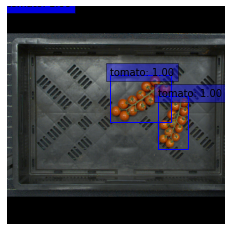

Ground truth


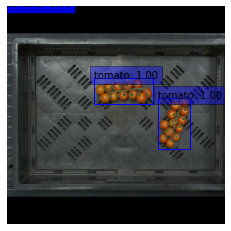

Ground truth


In [191]:
for j, sample in enumerate(train_dataset.take(2)):
    image = tf.cast(sample["image"], dtype=tf.float32)
    
    # Ground truth
    _bboxes = sample["objects"]["bbox"].numpy()
    bboxes = []
    for i in range(len(_bboxes)):
        box = [x*desired_size for x in _bboxes[i]]
        bboxes.append(box)
        
    classes = ['tomato']*len(bboxes)
    scores = [1]*len(bboxes)
    
    # Ground truth visualisation
    visualize_detections(
    image,
    bboxes,
    classes,
    scores,
    )
    plt.show()
    
    print('Ground truth')

In [39]:
for sample in train_dataset.take(1):
    print(sample)

{'filename': <tf.Tensor: shape=(), dtype=string, numpy=b'Top_L_4.png'>, 'image': <tf.Tensor: shape=(510, 510, 3), dtype=int32, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])>, 'objects': {'label': <tf.Tensor: shape=(6,), dtype=int32, numpy=array([0, 0, 

In [4]:
tf.executing_eagerly() 

True

In [157]:
autotune = tf.data.AUTOTUNE
train_dataset = train_dataset.map(preprocess_data, num_parallel_calls=autotune)
train_dataset = train_dataset.shuffle(8 * batch_size)
train_dataset = train_dataset.padded_batch(
    batch_size=batch_size, padding_values=(0.0, 1e-8, -1), drop_remainder=True
)
train_dataset = train_dataset.map(
    label_encoder.encode_batch, num_parallel_calls=autotune
)
train_dataset = train_dataset.apply(tf.data.experimental.ignore_errors())
train_dataset = train_dataset.prefetch(autotune)

val_dataset = val_dataset.map(preprocess_data, num_parallel_calls=autotune)
val_dataset = val_dataset.padded_batch(
    batch_size=1, padding_values=(0.0, 1e-8, -1), drop_remainder=True
)
val_dataset = val_dataset.map(label_encoder.encode_batch, num_parallel_calls=autotune)
val_dataset = val_dataset.apply(tf.data.experimental.ignore_errors())
val_dataset = val_dataset.prefetch(autotune)

In [158]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [39]:
# # Uncomment the following lines, when training on full dataset
# train_steps_per_epoch = dataset_info.splits["train"].num_examples // batch_size
# val_steps_per_epoch = \
#     dataset_info.splits["validation"].num_examples // batch_size

# train_steps = 4 * 100000
# epochs = train_steps // train_steps_per_epoch

# print(f'{dataset_info.splits["train"].num_examples} examples in train set')
# print(f'{dataset_info.splits["validation"].num_examples} examples in validation set')
# print(train_steps_per_epoch)
# print(epochs)

## Leave one out for for all images

In [202]:
epochs = 200

In [204]:
for i in range(len(train_arrays)):
    train_arr = train_arrays[i]
    
    filenames_train = [filename[i] for i in train_arr]
    images_train = [images_total[i] for i in train_arr]
    labels_train = [labels_total[i] for i in train_arr]
    bbox_train = [bbox_total[i] for i in train_arr]
    lengths_train = [lengths_total[i] for i in train_arr]
    
    train_dataset = tf.data.Dataset.from_tensor_slices({"filename":filenames_train, "image":images_train, 
                                                    "objects": {"label":labels_train, "bbox":bbox_train}, 
                                                    "length":lengths_train})
    
    autotune = tf.data.AUTOTUNE
    train_dataset = train_dataset.map(preprocess_data, num_parallel_calls=autotune)
    train_dataset = train_dataset.shuffle(8 * batch_size)
    train_dataset = train_dataset.padded_batch(
        batch_size=batch_size, padding_values=(0.0, 1e-8, -1), drop_remainder=True
    )
    train_dataset = train_dataset.map(
        label_encoder.encode_batch, num_parallel_calls=autotune
    )
    train_dataset = train_dataset.apply(tf.data.experimental.ignore_errors())
    train_dataset = train_dataset.prefetch(autotune)
    
    
    model_dir = f"leave_one_out/_test_img_{i}/"
    
    label_encoder = LabelEncoder()

    num_classes = 1
    batch_size = 2

    learning_rates = [2.5e-06, 0.000625, 0.00125, 0.0025, 0.00025, 2.5e-05]
    learning_rate_boundaries = [125, 250, 500, 240000, 360000]
    learning_rate_fn = tf.optimizers.schedules.PiecewiseConstantDecay(
        boundaries=learning_rate_boundaries, values=learning_rates
    )

    resnet50_backbone = get_backbone()
    loss_fn = RetinaNetLoss(num_classes)
    model = RetinaNet(num_classes, resnet50_backbone)

    optimizer = tf.optimizers.SGD(learning_rate=learning_rate_fn, momentum=0.9)
    model.compile(loss=loss_fn, optimizer=optimizer,run_eagerly=True)

    callbacks_list = [
        tf.keras.callbacks.ModelCheckpoint(
            filepath=os.path.join(model_dir, "weights"),
            monitor="loss",
            save_best_only=True,
            save_weights_only=True,
            verbose=1,
        )
    ]

    
    history = model.fit(
        train_dataset,
        epochs=epochs,
        callbacks=callbacks_list,
        verbose=1,
    )
    history
    

Epoch 1/200
     24/Unknown - 16s 635ms/step - loss: 3.8936
Epoch 00001: loss improved from inf to 3.89363, saving model to leave_one_out/_test_img_0\weights
24/24 [==============================] - 17s 697ms/step - loss: 3.8936
Epoch 2/200
24/24 [==============================] - ETA: 0s - loss: 3.9099
Epoch 00002: loss did not improve from 3.89363
24/24 [==============================] - 16s 648ms/step - loss: 3.9099
Epoch 3/200
24/24 [==============================] - ETA: 0s - loss: 3.9161
Epoch 00003: loss did not improve from 3.89363
24/24 [==============================] - 17s 674ms/step - loss: 3.9161
Epoch 4/200
24/24 [==============================] - ETA: 0s - loss: 3.9039
Epoch 00004: loss did not improve from 3.89363
24/24 [==============================] - 16s 638ms/step - loss: 3.9039
Epoch 5/200
24/24 [==============================] - ETA: 0s - loss: 3.8743
Epoch 00005: loss improved from 3.89363 to 3.87428, saving model to leave_one_out/_test_img_0\weights
24/24 [====

Epoch 40/200
24/24 [==============================] - ETA: 0s - loss: 2.9864
Epoch 00040: loss did not improve from 2.88480
24/24 [==============================] - 16s 664ms/step - loss: 2.9864
Epoch 41/200
24/24 [==============================] - ETA: 0s - loss: 2.7062
Epoch 00041: loss improved from 2.88480 to 2.70621, saving model to leave_one_out/_test_img_0\weights
24/24 [==============================] - 18s 720ms/step - loss: 2.7062
Epoch 42/200
24/24 [==============================] - ETA: 0s - loss: 3.1795
Epoch 00042: loss did not improve from 2.70621
24/24 [==============================] - 17s 666ms/step - loss: 3.1795
Epoch 43/200
24/24 [==============================] - ETA: 0s - loss: 3.1407
Epoch 00043: loss did not improve from 2.70621
24/24 [==============================] - 17s 659ms/step - loss: 3.1407
Epoch 44/200
24/24 [==============================] - ETA: 0s - loss: 3.0662
Epoch 00044: loss did not improve from 2.70621
24/24 [==============================] - 

24/24 [==============================] - ETA: 0s - loss: 1.3443
Epoch 00078: loss improved from 1.37961 to 1.34431, saving model to leave_one_out/_test_img_0\weights
24/24 [==============================] - 19s 764ms/step - loss: 1.3443
Epoch 79/200
24/24 [==============================] - ETA: 0s - loss: 1.2868
Epoch 00079: loss improved from 1.34431 to 1.28675, saving model to leave_one_out/_test_img_0\weights
24/24 [==============================] - 19s 759ms/step - loss: 1.2868
Epoch 80/200
24/24 [==============================] - ETA: 0s - loss: 1.2000
Epoch 00080: loss improved from 1.28675 to 1.19997, saving model to leave_one_out/_test_img_0\weights
24/24 [==============================] - 17s 691ms/step - loss: 1.2000
Epoch 81/200
24/24 [==============================] - ETA: 0s - loss: 1.2430
Epoch 00081: loss did not improve from 1.19997
24/24 [==============================] - 16s 653ms/step - loss: 1.2430
Epoch 82/200
24/24 [==============================] - ETA: 0s - loss

Epoch 115/200
24/24 [==============================] - ETA: 0s - loss: 0.6827
Epoch 00115: loss did not improve from 0.66933
24/24 [==============================] - 16s 640ms/step - loss: 0.6827
Epoch 116/200
24/24 [==============================] - ETA: 0s - loss: 0.6334
Epoch 00116: loss improved from 0.66933 to 0.63342, saving model to leave_one_out/_test_img_0\weights
24/24 [==============================] - 18s 750ms/step - loss: 0.6334
Epoch 117/200
24/24 [==============================] - ETA: 0s - loss: 0.6112
Epoch 00117: loss improved from 0.63342 to 0.61118, saving model to leave_one_out/_test_img_0\weights
24/24 [==============================] - 18s 741ms/step - loss: 0.6112
Epoch 118/200
24/24 [==============================] - ETA: 0s - loss: 0.5987
Epoch 00118: loss improved from 0.61118 to 0.59872, saving model to leave_one_out/_test_img_0\weights
24/24 [==============================] - 18s 729ms/step - loss: 0.5987
Epoch 119/200
24/24 [==============================

Epoch 157/200
24/24 [==============================] - ETA: 0s - loss: 0.3554
Epoch 00157: loss did not improve from 0.35107
24/24 [==============================] - 17s 672ms/step - loss: 0.3554
Epoch 158/200
24/24 [==============================] - ETA: 0s - loss: 0.3848
Epoch 00158: loss did not improve from 0.35107
24/24 [==============================] - 16s 664ms/step - loss: 0.3848
Epoch 159/200
24/24 [==============================] - ETA: 0s - loss: 0.3804
Epoch 00159: loss did not improve from 0.35107
24/24 [==============================] - 17s 684ms/step - loss: 0.3804
Epoch 160/200
24/24 [==============================] - ETA: 0s - loss: 0.3561
Epoch 00160: loss did not improve from 0.35107
24/24 [==============================] - 17s 681ms/step - loss: 0.3561
Epoch 161/200
24/24 [==============================] - ETA: 0s - loss: 0.3292
Epoch 00161: loss improved from 0.35107 to 0.32925, saving model to leave_one_out/_test_img_0\weights
24/24 [=============================

Epoch 195/200
24/24 [==============================] - ETA: 0s - loss: 0.2471
Epoch 00195: loss did not improve from 0.22621
24/24 [==============================] - 17s 681ms/step - loss: 0.2471
Epoch 196/200
24/24 [==============================] - ETA: 0s - loss: 0.2498
Epoch 00196: loss did not improve from 0.22621
24/24 [==============================] - 17s 696ms/step - loss: 0.2498
Epoch 197/200
24/24 [==============================] - ETA: 0s - loss: 0.2694
Epoch 00197: loss did not improve from 0.22621
24/24 [==============================] - 17s 684ms/step - loss: 0.2694
Epoch 198/200
24/24 [==============================] - ETA: 0s - loss: 0.2359
Epoch 00198: loss did not improve from 0.22621
24/24 [==============================] - 17s 675ms/step - loss: 0.2359
Epoch 199/200
24/24 [==============================] - ETA: 0s - loss: 0.2466
Epoch 00199: loss did not improve from 0.22621
24/24 [==============================] - 17s 698ms/step - loss: 0.2466
Epoch 200/200
24/24 

Epoch 35/200
24/24 [==============================] - ETA: 0s - loss: 3.6215
Epoch 00035: loss did not improve from 3.05230
24/24 [==============================] - 17s 691ms/step - loss: 3.6215
Epoch 36/200
24/24 [==============================] - ETA: 0s - loss: 3.5754
Epoch 00036: loss did not improve from 3.05230
24/24 [==============================] - 17s 676ms/step - loss: 3.5754
Epoch 37/200
24/24 [==============================] - ETA: 0s - loss: 3.5737
Epoch 00037: loss did not improve from 3.05230
24/24 [==============================] - 17s 694ms/step - loss: 3.5737
Epoch 38/200
24/24 [==============================] - ETA: 0s - loss: 3.5746
Epoch 00038: loss did not improve from 3.05230
24/24 [==============================] - 17s 664ms/step - loss: 3.5746
Epoch 39/200
24/24 [==============================] - ETA: 0s - loss: 3.5769
Epoch 00039: loss did not improve from 3.05230
24/24 [==============================] - 16s 635ms/step - loss: 3.5769
Epoch 40/200
24/24 [=====

24/24 [==============================] - 18s 735ms/step - loss: 2.3621
Epoch 75/200
24/24 [==============================] - ETA: 0s - loss: 2.3703
Epoch 00075: loss did not improve from 2.36211
24/24 [==============================] - 15s 617ms/step - loss: 2.3703
Epoch 76/200
24/24 [==============================] - ETA: 0s - loss: 2.4415
Epoch 00076: loss did not improve from 2.36211
24/24 [==============================] - 16s 663ms/step - loss: 2.4415
Epoch 77/200
24/24 [==============================] - ETA: 0s - loss: 2.4091
Epoch 00077: loss did not improve from 2.36211
24/24 [==============================] - 17s 697ms/step - loss: 2.4091
Epoch 78/200
24/24 [==============================] - ETA: 0s - loss: 2.3877
Epoch 00078: loss did not improve from 2.36211
24/24 [==============================] - 17s 658ms/step - loss: 2.3877
Epoch 79/200
24/24 [==============================] - ETA: 0s - loss: 2.4126
Epoch 00079: loss did not improve from 2.36211
24/24 [==================

24/24 [==============================] - ETA: 0s - loss: 1.6663
Epoch 00112: loss did not improve from 1.55186
24/24 [==============================] - 18s 716ms/step - loss: 1.6663
Epoch 113/200
24/24 [==============================] - ETA: 0s - loss: 1.5409
Epoch 00113: loss improved from 1.55186 to 1.54086, saving model to leave_one_out/_test_img_1\weights
24/24 [==============================] - 18s 735ms/step - loss: 1.5409
Epoch 114/200
24/24 [==============================] - ETA: 0s - loss: 1.5452
Epoch 00114: loss did not improve from 1.54086
24/24 [==============================] - 17s 672ms/step - loss: 1.5452
Epoch 115/200
24/24 [==============================] - ETA: 0s - loss: 1.6318
Epoch 00115: loss did not improve from 1.54086
24/24 [==============================] - 17s 660ms/step - loss: 1.6318
Epoch 116/200
24/24 [==============================] - ETA: 0s - loss: 1.6319
Epoch 00116: loss did not improve from 1.54086
24/24 [==============================] - 17s 692ms

Epoch 154/200
24/24 [==============================] - ETA: 0s - loss: nan
Epoch 00154: loss did not improve from 1.36263
24/24 [==============================] - 16s 654ms/step - loss: nan
Epoch 155/200
24/24 [==============================] - ETA: 0s - loss: nan
Epoch 00155: loss did not improve from 1.36263
24/24 [==============================] - 16s 649ms/step - loss: nan
Epoch 156/200
24/24 [==============================] - ETA: 0s - loss: nan
Epoch 00156: loss did not improve from 1.36263
24/24 [==============================] - 16s 641ms/step - loss: nan
Epoch 157/200
24/24 [==============================] - ETA: 0s - loss: nan
Epoch 00157: loss did not improve from 1.36263
24/24 [==============================] - 17s 656ms/step - loss: nan
Epoch 158/200
24/24 [==============================] - ETA: 0s - loss: nan
Epoch 00158: loss did not improve from 1.36263
24/24 [==============================] - 16s 662ms/step - loss: nan
Epoch 159/200
24/24 [=============================

24/24 [==============================] - ETA: 0s - loss: nan
Epoch 00197: loss did not improve from 1.36263
24/24 [==============================] - 17s 666ms/step - loss: nan
Epoch 198/200
24/24 [==============================] - ETA: 0s - loss: nan
Epoch 00198: loss did not improve from 1.36263
24/24 [==============================] - 17s 662ms/step - loss: nan
Epoch 199/200
24/24 [==============================] - ETA: 0s - loss: nan
Epoch 00199: loss did not improve from 1.36263
24/24 [==============================] - 16s 645ms/step - loss: nan
Epoch 200/200
24/24 [==============================] - ETA: 0s - loss: nan
Epoch 00200: loss did not improve from 1.36263
24/24 [==============================] - 17s 663ms/step - loss: nan
Epoch 1/200
     24/Unknown - 16s 638ms/step - loss: 3.9206
Epoch 00001: loss improved from inf to 3.92059, saving model to leave_one_out/_test_img_2\weights
24/24 [==============================] - 18s 719ms/step - loss: 3.9206
Epoch 2/200
24/24 [======

24/24 [==============================] - 19s 752ms/step - loss: 2.5429
Epoch 34/200
24/24 [==============================] - ETA: 0s - loss: 2.6379
Epoch 00034: loss did not improve from 2.54291
24/24 [==============================] - 17s 663ms/step - loss: 2.6379
Epoch 35/200
24/24 [==============================] - ETA: 0s - loss: 2.8160
Epoch 00035: loss did not improve from 2.54291
24/24 [==============================] - 17s 680ms/step - loss: 2.8160
Epoch 36/200
24/24 [==============================] - ETA: 0s - loss: 3.1450
Epoch 00036: loss did not improve from 2.54291
24/24 [==============================] - 16s 646ms/step - loss: 3.1450
Epoch 37/200
24/24 [==============================] - ETA: 0s - loss: 3.0778
Epoch 00037: loss did not improve from 2.54291
24/24 [==============================] - 17s 667ms/step - loss: 3.0778
Epoch 38/200
24/24 [==============================] - ETA: 0s - loss: 3.1801
Epoch 00038: loss did not improve from 2.54291
24/24 [==================

Epoch 72/200
24/24 [==============================] - ETA: 0s - loss: 1.3950
Epoch 00072: loss did not improve from 1.26813
24/24 [==============================] - 17s 674ms/step - loss: 1.3950
Epoch 73/200
24/24 [==============================] - ETA: 0s - loss: 1.2404
Epoch 00073: loss improved from 1.26813 to 1.24036, saving model to leave_one_out/_test_img_2\weights
24/24 [==============================] - 17s 705ms/step - loss: 1.2404
Epoch 74/200
24/24 [==============================] - ETA: 0s - loss: 1.1313
Epoch 00074: loss improved from 1.24036 to 1.13126, saving model to leave_one_out/_test_img_2\weights
24/24 [==============================] - 19s 750ms/step - loss: 1.1313
Epoch 75/200
24/24 [==============================] - ETA: 0s - loss: 1.0614
Epoch 00075: loss improved from 1.13126 to 1.06138, saving model to leave_one_out/_test_img_2\weights
24/24 [==============================] - 18s 716ms/step - loss: 1.0614
Epoch 76/200
24/24 [==============================] - E

24/24 [==============================] - ETA: 0s - loss: 0.5125
Epoch 00108: loss improved from 0.55377 to 0.51254, saving model to leave_one_out/_test_img_2\weights
24/24 [==============================] - 18s 728ms/step - loss: 0.5125
Epoch 109/200
24/24 [==============================] - ETA: 0s - loss: 0.5626
Epoch 00109: loss did not improve from 0.51254
24/24 [==============================] - 17s 686ms/step - loss: 0.5626
Epoch 110/200
24/24 [==============================] - ETA: 0s - loss: 0.5716
Epoch 00110: loss did not improve from 0.51254
24/24 [==============================] - 16s 650ms/step - loss: 0.5716
Epoch 111/200
24/24 [==============================] - ETA: 0s - loss: 0.5790
Epoch 00111: loss did not improve from 0.51254
24/24 [==============================] - 17s 659ms/step - loss: 0.5790
Epoch 112/200
24/24 [==============================] - ETA: 0s - loss: 0.5492
Epoch 00112: loss did not improve from 0.51254
24/24 [==============================] - 17s 694ms

Epoch 146/200
24/24 [==============================] - ETA: 0s - loss: 0.3167
Epoch 00146: loss improved from 0.32555 to 0.31675, saving model to leave_one_out/_test_img_2\weights
24/24 [==============================] - 17s 709ms/step - loss: 0.3167
Epoch 147/200
24/24 [==============================] - ETA: 0s - loss: 0.2922
Epoch 00147: loss improved from 0.31675 to 0.29217, saving model to leave_one_out/_test_img_2\weights
24/24 [==============================] - 18s 717ms/step - loss: 0.2922
Epoch 148/200
24/24 [==============================] - ETA: 0s - loss: 0.2942
Epoch 00148: loss did not improve from 0.29217
24/24 [==============================] - 16s 636ms/step - loss: 0.2942
Epoch 149/200
24/24 [==============================] - ETA: 0s - loss: 0.2847
Epoch 00149: loss improved from 0.29217 to 0.28468, saving model to leave_one_out/_test_img_2\weights
24/24 [==============================] - 18s 710ms/step - loss: 0.2847
Epoch 150/200
24/24 [==============================

24/24 [==============================] - ETA: 0s - loss: 0.2293
Epoch 00184: loss did not improve from 0.21822
24/24 [==============================] - 17s 675ms/step - loss: 0.2293
Epoch 185/200
24/24 [==============================] - ETA: 0s - loss: 0.2131
Epoch 00185: loss improved from 0.21822 to 0.21311, saving model to leave_one_out/_test_img_2\weights
24/24 [==============================] - 18s 744ms/step - loss: 0.2131
Epoch 186/200
24/24 [==============================] - ETA: 0s - loss: 0.2386
Epoch 00186: loss did not improve from 0.21311
24/24 [==============================] - 17s 673ms/step - loss: 0.2386
Epoch 187/200
24/24 [==============================] - ETA: 0s - loss: 0.2217
Epoch 00187: loss did not improve from 0.21311
24/24 [==============================] - 16s 657ms/step - loss: 0.2217
Epoch 188/200
24/24 [==============================] - ETA: 0s - loss: 0.2164
Epoch 00188: loss did not improve from 0.21311
24/24 [==============================] - 17s 656ms

Epoch 22/200
24/24 [==============================] - ETA: 0s - loss: 3.7178
Epoch 00022: loss did not improve from 3.63248
24/24 [==============================] - 17s 674ms/step - loss: 3.7178
Epoch 23/200
24/24 [==============================] - ETA: 0s - loss: 3.6464
Epoch 00023: loss did not improve from 3.63248
24/24 [==============================] - 17s 672ms/step - loss: 3.6464
Epoch 24/200
24/24 [==============================] - ETA: 0s - loss: 3.5973
Epoch 00024: loss improved from 3.63248 to 3.59734, saving model to leave_one_out/_test_img_3\weights
24/24 [==============================] - 18s 729ms/step - loss: 3.5973
Epoch 25/200
24/24 [==============================] - ETA: 0s - loss: 3.5848
Epoch 00025: loss improved from 3.59734 to 3.58485, saving model to leave_one_out/_test_img_3\weights
24/24 [==============================] - 18s 740ms/step - loss: 3.5848
Epoch 26/200
24/24 [==============================] - ETA: 0s - loss: 3.5789
Epoch 00026: loss improved from 3

Epoch 59/200
24/24 [==============================] - ETA: 0s - loss: 2.2534
Epoch 00059: loss improved from 2.41419 to 2.25345, saving model to leave_one_out/_test_img_3\weights
24/24 [==============================] - 19s 754ms/step - loss: 2.2534
Epoch 60/200
24/24 [==============================] - ETA: 0s - loss: 2.2010
Epoch 00060: loss improved from 2.25345 to 2.20104, saving model to leave_one_out/_test_img_3\weights
24/24 [==============================] - 18s 734ms/step - loss: 2.2010
Epoch 61/200
24/24 [==============================] - ETA: 0s - loss: 2.1845
Epoch 00061: loss improved from 2.20104 to 2.18447, saving model to leave_one_out/_test_img_3\weights
24/24 [==============================] - 18s 724ms/step - loss: 2.1845
Epoch 62/200
24/24 [==============================] - ETA: 0s - loss: 2.1065
Epoch 00062: loss improved from 2.18447 to 2.10647, saving model to leave_one_out/_test_img_3\weights
24/24 [==============================] - 19s 755ms/step - loss: 2.1065


24/24 [==============================] - ETA: 0s - loss: 0.9834
Epoch 00094: loss improved from 1.01500 to 0.98340, saving model to leave_one_out/_test_img_3\weights
24/24 [==============================] - 18s 702ms/step - loss: 0.9834
Epoch 95/200
24/24 [==============================] - ETA: 0s - loss: 0.9293
Epoch 00095: loss improved from 0.98340 to 0.92935, saving model to leave_one_out/_test_img_3\weights
24/24 [==============================] - 18s 724ms/step - loss: 0.9293
Epoch 96/200
24/24 [==============================] - ETA: 0s - loss: 0.9149
Epoch 00096: loss improved from 0.92935 to 0.91490, saving model to leave_one_out/_test_img_3\weights
24/24 [==============================] - 17s 674ms/step - loss: 0.9149
Epoch 97/200
24/24 [==============================] - ETA: 0s - loss: 0.9005
Epoch 00097: loss improved from 0.91490 to 0.90049, saving model to leave_one_out/_test_img_3\weights
24/24 [==============================] - 19s 745ms/step - loss: 0.9005
Epoch 98/200


24/24 [==============================] - ETA: 0s - loss: 0.4742
Epoch 00130: loss improved from 0.49184 to 0.47421, saving model to leave_one_out/_test_img_3\weights
24/24 [==============================] - 18s 720ms/step - loss: 0.4742
Epoch 131/200
24/24 [==============================] - ETA: 0s - loss: 0.4218
Epoch 00131: loss improved from 0.47421 to 0.42180, saving model to leave_one_out/_test_img_3\weights
24/24 [==============================] - 18s 718ms/step - loss: 0.4218
Epoch 132/200
24/24 [==============================] - ETA: 0s - loss: 0.4387
Epoch 00132: loss did not improve from 0.42180
24/24 [==============================] - 16s 644ms/step - loss: 0.4387
Epoch 133/200
24/24 [==============================] - ETA: 0s - loss: 0.4513
Epoch 00133: loss did not improve from 0.42180
24/24 [==============================] - 16s 661ms/step - loss: 0.4513
Epoch 134/200
24/24 [==============================] - ETA: 0s - loss: 0.4454
Epoch 00134: loss did not improve from 0.4

Epoch 169/200
24/24 [==============================] - ETA: 0s - loss: 0.2735
Epoch 00169: loss improved from 0.30042 to 0.27353, saving model to leave_one_out/_test_img_3\weights
24/24 [==============================] - 18s 743ms/step - loss: 0.2735
Epoch 170/200
24/24 [==============================] - ETA: 0s - loss: 0.2938
Epoch 00170: loss did not improve from 0.27353
24/24 [==============================] - 17s 669ms/step - loss: 0.2938
Epoch 171/200
24/24 [==============================] - ETA: 0s - loss: 0.2823
Epoch 00171: loss did not improve from 0.27353
24/24 [==============================] - 16s 656ms/step - loss: 0.2823
Epoch 172/200
24/24 [==============================] - ETA: 0s - loss: 0.2755
Epoch 00172: loss did not improve from 0.27353
24/24 [==============================] - 16s 635ms/step - loss: 0.2755
Epoch 173/200
24/24 [==============================] - ETA: 0s - loss: 0.2753
Epoch 00173: loss did not improve from 0.27353
24/24 [=============================

24/24 [==============================] - ETA: 0s - loss: 3.8946
Epoch 00008: loss did not improve from 3.86780
24/24 [==============================] - 17s 658ms/step - loss: 3.8946
Epoch 9/200
24/24 [==============================] - ETA: 0s - loss: 3.8371
Epoch 00009: loss improved from 3.86780 to 3.83709, saving model to leave_one_out/_test_img_4\weights
24/24 [==============================] - 18s 706ms/step - loss: 3.8371
Epoch 10/200
24/24 [==============================] - ETA: 0s - loss: 3.8131
Epoch 00010: loss improved from 3.83709 to 3.81306, saving model to leave_one_out/_test_img_4\weights
24/24 [==============================] - 18s 722ms/step - loss: 3.8131
Epoch 11/200
24/24 [==============================] - ETA: 0s - loss: 3.6616
Epoch 00011: loss improved from 3.81306 to 3.66165, saving model to leave_one_out/_test_img_4\weights
24/24 [==============================] - 19s 746ms/step - loss: 3.6616
Epoch 12/200
24/24 [==============================] - ETA: 0s - loss:

24/24 [==============================] - 18s 720ms/step - loss: 2.3004
Epoch 46/200
24/24 [==============================] - ETA: 0s - loss: 2.2156
Epoch 00046: loss improved from 2.30040 to 2.21558, saving model to leave_one_out/_test_img_4\weights
24/24 [==============================] - 18s 725ms/step - loss: 2.2156
Epoch 47/200
24/24 [==============================] - ETA: 0s - loss: 2.1825
Epoch 00047: loss improved from 2.21558 to 2.18252, saving model to leave_one_out/_test_img_4\weights
24/24 [==============================] - 19s 753ms/step - loss: 2.1825
Epoch 48/200
24/24 [==============================] - ETA: 0s - loss: 2.0431
Epoch 00048: loss improved from 2.18252 to 2.04308, saving model to leave_one_out/_test_img_4\weights
24/24 [==============================] - 18s 742ms/step - loss: 2.0431
Epoch 49/200
24/24 [==============================] - ETA: 0s - loss: 2.2324
Epoch 00049: loss did not improve from 2.04308
24/24 [==============================] - 17s 657ms/step

Epoch 82/200
24/24 [==============================] - ETA: 0s - loss: 0.8921
Epoch 00082: loss improved from 0.90393 to 0.89210, saving model to leave_one_out/_test_img_4\weights
24/24 [==============================] - 19s 755ms/step - loss: 0.8921
Epoch 83/200
24/24 [==============================] - ETA: 0s - loss: 0.9545
Epoch 00083: loss did not improve from 0.89210
24/24 [==============================] - 16s 664ms/step - loss: 0.9545
Epoch 84/200
24/24 [==============================] - ETA: 0s - loss: 0.8262
Epoch 00084: loss improved from 0.89210 to 0.82621, saving model to leave_one_out/_test_img_4\weights
24/24 [==============================] - 18s 732ms/step - loss: 0.8262
Epoch 85/200
24/24 [==============================] - ETA: 0s - loss: 0.7375
Epoch 00085: loss improved from 0.82621 to 0.73747, saving model to leave_one_out/_test_img_4\weights
24/24 [==============================] - 18s 712ms/step - loss: 0.7375
Epoch 86/200
24/24 [==============================] - E

Epoch 120/200
24/24 [==============================] - ETA: 0s - loss: 0.4520
Epoch 00120: loss did not improve from 0.43078
24/24 [==============================] - 16s 633ms/step - loss: 0.4520
Epoch 121/200
24/24 [==============================] - ETA: 0s - loss: 0.4337
Epoch 00121: loss did not improve from 0.43078
24/24 [==============================] - 17s 669ms/step - loss: 0.4337
Epoch 122/200
24/24 [==============================] - ETA: 0s - loss: 0.4341
Epoch 00122: loss did not improve from 0.43078
24/24 [==============================] - 16s 648ms/step - loss: 0.4341
Epoch 123/200
24/24 [==============================] - ETA: 0s - loss: 0.4675
Epoch 00123: loss did not improve from 0.43078
24/24 [==============================] - 16s 661ms/step - loss: 0.4675
Epoch 124/200
24/24 [==============================] - ETA: 0s - loss: 0.4580
Epoch 00124: loss did not improve from 0.43078
24/24 [==============================] - 16s 629ms/step - loss: 0.4580
Epoch 125/200
24/24 

Epoch 159/200
24/24 [==============================] - ETA: 0s - loss: 0.2347
Epoch 00159: loss improved from 0.24574 to 0.23472, saving model to leave_one_out/_test_img_4\weights
24/24 [==============================] - 18s 749ms/step - loss: 0.2347
Epoch 160/200
24/24 [==============================] - ETA: 0s - loss: 0.2159
Epoch 00160: loss improved from 0.23472 to 0.21594, saving model to leave_one_out/_test_img_4\weights
24/24 [==============================] - 18s 724ms/step - loss: 0.2159
Epoch 161/200
24/24 [==============================] - ETA: 0s - loss: 0.2368
Epoch 00161: loss did not improve from 0.21594
24/24 [==============================] - 16s 631ms/step - loss: 0.2368
Epoch 162/200
24/24 [==============================] - ETA: 0s - loss: 0.2240
Epoch 00162: loss did not improve from 0.21594
24/24 [==============================] - 16s 638ms/step - loss: 0.2240
Epoch 163/200
24/24 [==============================] - ETA: 0s - loss: 0.2227
Epoch 00163: loss did not im

Epoch 200/200
24/24 [==============================] - ETA: 0s - loss: 0.1966
Epoch 00200: loss did not improve from 0.19291
24/24 [==============================] - 16s 645ms/step - loss: 0.1966
Epoch 1/200
     24/Unknown - 17s 653ms/step - loss: 3.9070
Epoch 00001: loss improved from inf to 3.90702, saving model to leave_one_out/_test_img_5\weights
24/24 [==============================] - 18s 715ms/step - loss: 3.9070
Epoch 2/200
24/24 [==============================] - ETA: 0s - loss: 3.9041
Epoch 00002: loss improved from 3.90702 to 3.90414, saving model to leave_one_out/_test_img_5\weights
24/24 [==============================] - 18s 718ms/step - loss: 3.9041
Epoch 3/200
24/24 [==============================] - ETA: 0s - loss: 3.9263
Epoch 00003: loss did not improve from 3.90414
24/24 [==============================] - 15s 610ms/step - loss: 3.9263
Epoch 4/200
24/24 [==============================] - ETA: 0s - loss: 3.8857
Epoch 00004: loss improved from 3.90414 to 3.88566, savi

24/24 [==============================] - ETA: 0s - loss: 3.0571
Epoch 00038: loss did not improve from 2.88423
24/24 [==============================] - 17s 672ms/step - loss: 3.0571
Epoch 39/200
24/24 [==============================] - ETA: 0s - loss: 3.1491
Epoch 00039: loss did not improve from 2.88423
24/24 [==============================] - 16s 653ms/step - loss: 3.1491
Epoch 40/200
24/24 [==============================] - ETA: 0s - loss: 3.0920
Epoch 00040: loss did not improve from 2.88423
24/24 [==============================] - 17s 666ms/step - loss: 3.0920
Epoch 41/200
24/24 [==============================] - ETA: 0s - loss: 3.0256
Epoch 00041: loss did not improve from 2.88423
24/24 [==============================] - 16s 650ms/step - loss: 3.0256
Epoch 42/200
24/24 [==============================] - ETA: 0s - loss: 2.5996
Epoch 00042: loss improved from 2.88423 to 2.59956, saving model to leave_one_out/_test_img_5\weights
24/24 [==============================] - 18s 703ms/ste

Epoch 75/200
24/24 [==============================] - ETA: 0s - loss: 1.2091
Epoch 00075: loss did not improve from 1.12012
24/24 [==============================] - 17s 665ms/step - loss: 1.2091
Epoch 76/200
24/24 [==============================] - ETA: 0s - loss: 1.1395
Epoch 00076: loss did not improve from 1.12012
24/24 [==============================] - 16s 653ms/step - loss: 1.1395
Epoch 77/200
24/24 [==============================] - ETA: 0s - loss: 1.1951
Epoch 00077: loss did not improve from 1.12012
24/24 [==============================] - 16s 636ms/step - loss: 1.1951
Epoch 78/200
24/24 [==============================] - ETA: 0s - loss: 1.1344
Epoch 00078: loss did not improve from 1.12012
24/24 [==============================] - 17s 675ms/step - loss: 1.1344
Epoch 79/200
24/24 [==============================] - ETA: 0s - loss: 1.0150
Epoch 00079: loss improved from 1.12012 to 1.01504, saving model to leave_one_out/_test_img_5\weights
24/24 [==============================] - 

Epoch 113/200
24/24 [==============================] - ETA: 0s - loss: 0.5539
Epoch 00113: loss did not improve from 0.47186
24/24 [==============================] - 16s 648ms/step - loss: 0.5539
Epoch 114/200
24/24 [==============================] - ETA: 0s - loss: 0.4781
Epoch 00114: loss did not improve from 0.47186
24/24 [==============================] - 17s 669ms/step - loss: 0.4781
Epoch 115/200
24/24 [==============================] - ETA: 0s - loss: 0.4524
Epoch 00115: loss improved from 0.47186 to 0.45245, saving model to leave_one_out/_test_img_5\weights
24/24 [==============================] - 17s 698ms/step - loss: 0.4524
Epoch 116/200
24/24 [==============================] - ETA: 0s - loss: 0.4746
Epoch 00116: loss did not improve from 0.45245
24/24 [==============================] - 17s 674ms/step - loss: 0.4746
Epoch 117/200
24/24 [==============================] - ETA: 0s - loss: 0.5105
Epoch 00117: loss did not improve from 0.45245
24/24 [=============================

Epoch 152/200
24/24 [==============================] - ETA: 0s - loss: 0.3040
Epoch 00152: loss improved from 0.31320 to 0.30402, saving model to leave_one_out/_test_img_5\weights
24/24 [==============================] - 18s 705ms/step - loss: 0.3040
Epoch 153/200
24/24 [==============================] - ETA: 0s - loss: 0.2684
Epoch 00153: loss improved from 0.30402 to 0.26838, saving model to leave_one_out/_test_img_5\weights
24/24 [==============================] - 18s 734ms/step - loss: 0.2684
Epoch 154/200
24/24 [==============================] - ETA: 0s - loss: 0.2667
Epoch 00154: loss improved from 0.26838 to 0.26673, saving model to leave_one_out/_test_img_5\weights
24/24 [==============================] - 17s 706ms/step - loss: 0.2667
Epoch 155/200
24/24 [==============================] - ETA: 0s - loss: 0.2700
Epoch 00155: loss did not improve from 0.26673
24/24 [==============================] - 17s 672ms/step - loss: 0.2700
Epoch 156/200
24/24 [==============================

24/24 [==============================] - ETA: 0s - loss: 0.2389
Epoch 00191: loss did not improve from 0.20828
24/24 [==============================] - 17s 670ms/step - loss: 0.2389
Epoch 192/200
24/24 [==============================] - ETA: 0s - loss: 0.2287
Epoch 00192: loss did not improve from 0.20828
24/24 [==============================] - 17s 660ms/step - loss: 0.2287
Epoch 193/200
24/24 [==============================] - ETA: 0s - loss: 0.2550
Epoch 00193: loss did not improve from 0.20828
24/24 [==============================] - 17s 660ms/step - loss: 0.2550
Epoch 194/200
24/24 [==============================] - ETA: 0s - loss: 0.2396
Epoch 00194: loss did not improve from 0.20828
24/24 [==============================] - 17s 661ms/step - loss: 0.2396
Epoch 195/200
24/24 [==============================] - ETA: 0s - loss: 0.2188
Epoch 00195: loss did not improve from 0.20828
24/24 [==============================] - 16s 652ms/step - loss: 0.2188
Epoch 196/200
24/24 [=============

Epoch 30/200
24/24 [==============================] - ETA: 0s - loss: 3.3882
Epoch 00030: loss did not improve from 3.23058
24/24 [==============================] - 17s 687ms/step - loss: 3.3882
Epoch 31/200
24/24 [==============================] - ETA: 0s - loss: 3.4119
Epoch 00031: loss did not improve from 3.23058
24/24 [==============================] - 17s 655ms/step - loss: 3.4119
Epoch 32/200
24/24 [==============================] - ETA: 0s - loss: 3.2328
Epoch 00032: loss did not improve from 3.23058
24/24 [==============================] - 17s 682ms/step - loss: 3.2328
Epoch 33/200
24/24 [==============================] - ETA: 0s - loss: 2.9391
Epoch 00033: loss improved from 3.23058 to 2.93912, saving model to leave_one_out/_test_img_6\weights
24/24 [==============================] - 18s 715ms/step - loss: 2.9391
Epoch 34/200
24/24 [==============================] - ETA: 0s - loss: 3.1865
Epoch 00034: loss did not improve from 2.93912
24/24 [==============================] - 

24/24 [==============================] - 18s 713ms/step - loss: 1.8525
Epoch 68/200
24/24 [==============================] - ETA: 0s - loss: 1.7328
Epoch 00068: loss improved from 1.85251 to 1.73279, saving model to leave_one_out/_test_img_6\weights
24/24 [==============================] - 18s 743ms/step - loss: 1.7328
Epoch 69/200
24/24 [==============================] - ETA: 0s - loss: 1.7163
Epoch 00069: loss improved from 1.73279 to 1.71631, saving model to leave_one_out/_test_img_6\weights
24/24 [==============================] - 18s 713ms/step - loss: 1.7163
Epoch 70/200
24/24 [==============================] - ETA: 0s - loss: 1.6443
Epoch 00070: loss improved from 1.71631 to 1.64427, saving model to leave_one_out/_test_img_6\weights
24/24 [==============================] - 18s 712ms/step - loss: 1.6443
Epoch 71/200
24/24 [==============================] - ETA: 0s - loss: 1.5959
Epoch 00071: loss improved from 1.64427 to 1.59595, saving model to leave_one_out/_test_img_6\weights


Epoch 103/200
24/24 [==============================] - ETA: 0s - loss: 0.7436
Epoch 00103: loss improved from 0.78068 to 0.74355, saving model to leave_one_out/_test_img_6\weights
24/24 [==============================] - 19s 744ms/step - loss: 0.7436
Epoch 104/200
24/24 [==============================] - ETA: 0s - loss: 0.6956
Epoch 00104: loss improved from 0.74355 to 0.69564, saving model to leave_one_out/_test_img_6\weights
24/24 [==============================] - 18s 712ms/step - loss: 0.6956
Epoch 105/200
24/24 [==============================] - ETA: 0s - loss: 0.7328
Epoch 00105: loss did not improve from 0.69564
24/24 [==============================] - 17s 666ms/step - loss: 0.7328
Epoch 106/200
24/24 [==============================] - ETA: 0s - loss: 0.7469
Epoch 00106: loss did not improve from 0.69564
24/24 [==============================] - 17s 665ms/step - loss: 0.7469
Epoch 107/200
24/24 [==============================] - ETA: 0s - loss: 0.7210
Epoch 00107: loss did not im

Epoch 141/200
24/24 [==============================] - ETA: 0s - loss: 0.3774
Epoch 00141: loss improved from 0.38758 to 0.37736, saving model to leave_one_out/_test_img_6\weights
24/24 [==============================] - 18s 746ms/step - loss: 0.3774
Epoch 142/200
24/24 [==============================] - ETA: 0s - loss: 0.3696
Epoch 00142: loss improved from 0.37736 to 0.36961, saving model to leave_one_out/_test_img_6\weights
24/24 [==============================] - 18s 699ms/step - loss: 0.3696
Epoch 143/200
24/24 [==============================] - ETA: 0s - loss: 0.3742
Epoch 00143: loss did not improve from 0.36961
24/24 [==============================] - 16s 640ms/step - loss: 0.3742
Epoch 144/200
24/24 [==============================] - ETA: 0s - loss: 0.3685
Epoch 00144: loss improved from 0.36961 to 0.36850, saving model to leave_one_out/_test_img_6\weights
24/24 [==============================] - 18s 708ms/step - loss: 0.3685
Epoch 145/200
24/24 [==============================

Epoch 180/200
24/24 [==============================] - ETA: 0s - loss: 0.2260
Epoch 00180: loss improved from 0.25163 to 0.22598, saving model to leave_one_out/_test_img_6\weights
24/24 [==============================] - 17s 700ms/step - loss: 0.2260
Epoch 181/200
24/24 [==============================] - ETA: 0s - loss: 0.2347
Epoch 00181: loss did not improve from 0.22598
24/24 [==============================] - 16s 648ms/step - loss: 0.2347
Epoch 182/200
24/24 [==============================] - ETA: 0s - loss: 0.2561
Epoch 00182: loss did not improve from 0.22598
24/24 [==============================] - 16s 630ms/step - loss: 0.2561
Epoch 183/200
24/24 [==============================] - ETA: 0s - loss: 0.2369
Epoch 00183: loss did not improve from 0.22598
24/24 [==============================] - 17s 665ms/step - loss: 0.2369
Epoch 184/200
24/24 [==============================] - ETA: 0s - loss: 0.2941
Epoch 00184: loss did not improve from 0.22598
24/24 [=============================

Epoch 19/200
24/24 [==============================] - ETA: 0s - loss: 2.9514
Epoch 00019: loss improved from 3.00539 to 2.95136, saving model to leave_one_out/_test_img_7\weights
24/24 [==============================] - 18s 721ms/step - loss: 2.9514
Epoch 20/200
24/24 [==============================] - ETA: 0s - loss: 2.9510
Epoch 00020: loss improved from 2.95136 to 2.95105, saving model to leave_one_out/_test_img_7\weights
24/24 [==============================] - 18s 723ms/step - loss: 2.9510
Epoch 21/200
24/24 [==============================] - ETA: 0s - loss: 3.1471
Epoch 00021: loss did not improve from 2.95105
24/24 [==============================] - 17s 659ms/step - loss: 3.1471
Epoch 22/200
24/24 [==============================] - ETA: 0s - loss: 2.9618
Epoch 00022: loss did not improve from 2.95105
24/24 [==============================] - 17s 663ms/step - loss: 2.9618
Epoch 23/200
24/24 [==============================] - ETA: 0s - loss: 3.0481
Epoch 00023: loss did not improve

24/24 [==============================] - ETA: 0s - loss: 2.3882
Epoch 00059: loss did not improve from 2.19925
24/24 [==============================] - 16s 634ms/step - loss: 2.3882
Epoch 60/200
24/24 [==============================] - ETA: 0s - loss: 2.3334
Epoch 00060: loss did not improve from 2.19925
24/24 [==============================] - 17s 660ms/step - loss: 2.3334
Epoch 61/200
24/24 [==============================] - ETA: 0s - loss: 2.4605
Epoch 00061: loss did not improve from 2.19925
24/24 [==============================] - 17s 670ms/step - loss: 2.4605
Epoch 62/200
24/24 [==============================] - ETA: 0s - loss: 2.3721
Epoch 00062: loss did not improve from 2.19925
24/24 [==============================] - 16s 645ms/step - loss: 2.3721
Epoch 63/200
24/24 [==============================] - ETA: 0s - loss: 2.2034
Epoch 00063: loss did not improve from 2.19925
24/24 [==============================] - 17s 654ms/step - loss: 2.2034
Epoch 64/200
24/24 [==================

24/24 [==============================] - ETA: 0s - loss: 0.8133
Epoch 00096: loss improved from 0.83828 to 0.81331, saving model to leave_one_out/_test_img_7\weights
24/24 [==============================] - 17s 693ms/step - loss: 0.8133
Epoch 97/200
24/24 [==============================] - ETA: 0s - loss: 0.7727
Epoch 00097: loss improved from 0.81331 to 0.77266, saving model to leave_one_out/_test_img_7\weights
24/24 [==============================] - 18s 716ms/step - loss: 0.7727
Epoch 98/200
24/24 [==============================] - ETA: 0s - loss: 0.7452
Epoch 00098: loss improved from 0.77266 to 0.74516, saving model to leave_one_out/_test_img_7\weights
24/24 [==============================] - 18s 731ms/step - loss: 0.7452
Epoch 99/200
24/24 [==============================] - ETA: 0s - loss: 0.7302
Epoch 00099: loss improved from 0.74516 to 0.73022, saving model to leave_one_out/_test_img_7\weights
24/24 [==============================] - 18s 715ms/step - loss: 0.7302
Epoch 100/200

24/24 [==============================] - ETA: 0s - loss: 0.4652
Epoch 00133: loss did not improve from 0.41827
24/24 [==============================] - 16s 645ms/step - loss: 0.4652
Epoch 134/200
24/24 [==============================] - ETA: 0s - loss: 0.4198
Epoch 00134: loss did not improve from 0.41827
24/24 [==============================] - 16s 640ms/step - loss: 0.4198
Epoch 135/200
24/24 [==============================] - ETA: 0s - loss: 0.4066
Epoch 00135: loss improved from 0.41827 to 0.40661, saving model to leave_one_out/_test_img_7\weights
24/24 [==============================] - 18s 729ms/step - loss: 0.4066
Epoch 136/200
24/24 [==============================] - ETA: 0s - loss: 0.3572
Epoch 00136: loss improved from 0.40661 to 0.35723, saving model to leave_one_out/_test_img_7\weights
24/24 [==============================] - 17s 711ms/step - loss: 0.3572
Epoch 137/200
24/24 [==============================] - ETA: 0s - loss: 0.3565
Epoch 00137: loss improved from 0.35723 to

Epoch 171/200
24/24 [==============================] - ETA: 0s - loss: 0.2671
Epoch 00171: loss did not improve from 0.25797
24/24 [==============================] - 17s 666ms/step - loss: 0.2671
Epoch 172/200
24/24 [==============================] - ETA: 0s - loss: 0.2626
Epoch 00172: loss did not improve from 0.25797
24/24 [==============================] - 17s 659ms/step - loss: 0.2626
Epoch 173/200
24/24 [==============================] - ETA: 0s - loss: 0.2607
Epoch 00173: loss did not improve from 0.25797
24/24 [==============================] - 16s 619ms/step - loss: 0.2607
Epoch 174/200
24/24 [==============================] - ETA: 0s - loss: 0.2395
Epoch 00174: loss improved from 0.25797 to 0.23946, saving model to leave_one_out/_test_img_7\weights
24/24 [==============================] - 18s 712ms/step - loss: 0.2395
Epoch 175/200
24/24 [==============================] - ETA: 0s - loss: 0.2383
Epoch 00175: loss improved from 0.23946 to 0.23825, saving model to leave_one_out/_

24/24 [==============================] - ETA: 0s - loss: 3.8048
Epoch 00010: loss improved from 3.85986 to 3.80484, saving model to leave_one_out/_test_img_8\weights
24/24 [==============================] - 18s 705ms/step - loss: 3.8048
Epoch 11/200
24/24 [==============================] - ETA: 0s - loss: 3.6236
Epoch 00011: loss improved from 3.80484 to 3.62358, saving model to leave_one_out/_test_img_8\weights
24/24 [==============================] - 18s 735ms/step - loss: 3.6236
Epoch 12/200
24/24 [==============================] - ETA: 0s - loss: 3.4927
Epoch 00012: loss improved from 3.62358 to 3.49268, saving model to leave_one_out/_test_img_8\weights
24/24 [==============================] - 18s 723ms/step - loss: 3.4927
Epoch 13/200
24/24 [==============================] - ETA: 0s - loss: 3.4267
Epoch 00013: loss improved from 3.49268 to 3.42668, saving model to leave_one_out/_test_img_8\weights
24/24 [==============================] - 18s 728ms/step - loss: 3.4267
Epoch 14/200


24/24 [==============================] - 18s 739ms/step - loss: 2.1145
Epoch 49/200
24/24 [==============================] - ETA: 0s - loss: 2.1446
Epoch 00049: loss did not improve from 2.11452
24/24 [==============================] - 16s 630ms/step - loss: 2.1446
Epoch 50/200
24/24 [==============================] - ETA: 0s - loss: 1.9580
Epoch 00050: loss improved from 2.11452 to 1.95799, saving model to leave_one_out/_test_img_8\weights
24/24 [==============================] - 19s 751ms/step - loss: 1.9580
Epoch 51/200
24/24 [==============================] - ETA: 0s - loss: 1.9569
Epoch 00051: loss improved from 1.95799 to 1.95694, saving model to leave_one_out/_test_img_8\weights
24/24 [==============================] - 18s 712ms/step - loss: 1.9569
Epoch 52/200
24/24 [==============================] - ETA: 0s - loss: 1.9094
Epoch 00052: loss improved from 1.95694 to 1.90936, saving model to leave_one_out/_test_img_8\weights
24/24 [==============================] - 17s 694ms/step

24/24 [==============================] - ETA: 0s - loss: 0.8791
Epoch 00083: loss improved from 0.91925 to 0.87909, saving model to leave_one_out/_test_img_8\weights
24/24 [==============================] - 19s 756ms/step - loss: 0.8791
Epoch 84/200
24/24 [==============================] - ETA: 0s - loss: 0.7487
Epoch 00084: loss improved from 0.87909 to 0.74873, saving model to leave_one_out/_test_img_8\weights
24/24 [==============================] - 18s 716ms/step - loss: 0.7487
Epoch 85/200
24/24 [==============================] - ETA: 0s - loss: 0.8297
Epoch 00085: loss did not improve from 0.74873
24/24 [==============================] - 16s 647ms/step - loss: 0.8297
Epoch 86/200
24/24 [==============================] - ETA: 0s - loss: 0.7624
Epoch 00086: loss did not improve from 0.74873
24/24 [==============================] - 16s 660ms/step - loss: 0.7624
Epoch 87/200
24/24 [==============================] - ETA: 0s - loss: 0.7597
Epoch 00087: loss did not improve from 0.74873

24/24 [==============================] - ETA: 0s - loss: 0.4448
Epoch 00121: loss improved from 0.46211 to 0.44480, saving model to leave_one_out/_test_img_8\weights
24/24 [==============================] - 19s 747ms/step - loss: 0.4448
Epoch 122/200
24/24 [==============================] - ETA: 0s - loss: 0.4355
Epoch 00122: loss improved from 0.44480 to 0.43550, saving model to leave_one_out/_test_img_8\weights
24/24 [==============================] - 18s 732ms/step - loss: 0.4355
Epoch 123/200
24/24 [==============================] - ETA: 0s - loss: 0.4451
Epoch 00123: loss did not improve from 0.43550
24/24 [==============================] - 17s 658ms/step - loss: 0.4451
Epoch 124/200
24/24 [==============================] - ETA: 0s - loss: 0.4294
Epoch 00124: loss improved from 0.43550 to 0.42941, saving model to leave_one_out/_test_img_8\weights
24/24 [==============================] - 17s 707ms/step - loss: 0.4294
Epoch 125/200
24/24 [==============================] - ETA: 0s - 

24/24 [==============================] - 18s 715ms/step - loss: 0.2344
Epoch 160/200
24/24 [==============================] - ETA: 0s - loss: 0.2584
Epoch 00160: loss did not improve from 0.23444
24/24 [==============================] - 17s 659ms/step - loss: 0.2584
Epoch 161/200
24/24 [==============================] - ETA: 0s - loss: 0.2383
Epoch 00161: loss did not improve from 0.23444
24/24 [==============================] - 17s 681ms/step - loss: 0.2383
Epoch 162/200
24/24 [==============================] - ETA: 0s - loss: 0.2429
Epoch 00162: loss did not improve from 0.23444
24/24 [==============================] - 16s 661ms/step - loss: 0.2429
Epoch 163/200
24/24 [==============================] - ETA: 0s - loss: 0.2394
Epoch 00163: loss did not improve from 0.23444
24/24 [==============================] - 17s 660ms/step - loss: 0.2394
Epoch 164/200
24/24 [==============================] - ETA: 0s - loss: 0.2536
Epoch 00164: loss did not improve from 0.23444
24/24 [=============

24/24 [==============================] - 18s 706ms/step - loss: 0.1690
Epoch 200/200
24/24 [==============================] - ETA: 0s - loss: 0.1916
Epoch 00200: loss did not improve from 0.16903
24/24 [==============================] - 16s 627ms/step - loss: 0.1916
Epoch 1/200
     24/Unknown - 17s 661ms/step - loss: 3.9041
Epoch 00001: loss improved from inf to 3.90407, saving model to leave_one_out/_test_img_9\weights
24/24 [==============================] - 18s 724ms/step - loss: 3.9041
Epoch 2/200
24/24 [==============================] - ETA: 0s - loss: 3.9166
Epoch 00002: loss did not improve from 3.90407
24/24 [==============================] - 16s 630ms/step - loss: 3.9166
Epoch 3/200
24/24 [==============================] - ETA: 0s - loss: 3.9187
Epoch 00003: loss did not improve from 3.90407
24/24 [==============================] - 16s 655ms/step - loss: 3.9187
Epoch 4/200
24/24 [==============================] - ETA: 0s - loss: 3.9219
Epoch 00004: loss did not improve from 3

24/24 [==============================] - ETA: 0s - loss: 2.9670
Epoch 00037: loss did not improve from 2.76619
24/24 [==============================] - 17s 670ms/step - loss: 2.9670
Epoch 38/200
24/24 [==============================] - ETA: 0s - loss: 2.5521
Epoch 00038: loss improved from 2.76619 to 2.55210, saving model to leave_one_out/_test_img_9\weights
24/24 [==============================] - 17s 694ms/step - loss: 2.5521
Epoch 39/200
24/24 [==============================] - ETA: 0s - loss: 2.3947
Epoch 00039: loss improved from 2.55210 to 2.39475, saving model to leave_one_out/_test_img_9\weights
24/24 [==============================] - 18s 717ms/step - loss: 2.3947
Epoch 40/200
24/24 [==============================] - ETA: 0s - loss: 2.4483
Epoch 00040: loss did not improve from 2.39475
24/24 [==============================] - 16s 616ms/step - loss: 2.4483
Epoch 41/200
24/24 [==============================] - ETA: 0s - loss: 2.6431
Epoch 00041: loss did not improve from 2.39475

24/24 [==============================] - ETA: 0s - loss: 0.9544
Epoch 00074: loss improved from 0.99875 to 0.95437, saving model to leave_one_out/_test_img_9\weights
24/24 [==============================] - 18s 725ms/step - loss: 0.9544
Epoch 75/200
24/24 [==============================] - ETA: 0s - loss: 0.9345
Epoch 00075: loss improved from 0.95437 to 0.93448, saving model to leave_one_out/_test_img_9\weights
24/24 [==============================] - 18s 725ms/step - loss: 0.9345
Epoch 76/200
24/24 [==============================] - ETA: 0s - loss: 0.9607
Epoch 00076: loss did not improve from 0.93448
24/24 [==============================] - 17s 656ms/step - loss: 0.9607
Epoch 77/200
24/24 [==============================] - ETA: 0s - loss: 0.8875
Epoch 00077: loss improved from 0.93448 to 0.88753, saving model to leave_one_out/_test_img_9\weights
24/24 [==============================] - 18s 719ms/step - loss: 0.8875
Epoch 78/200
24/24 [==============================] - ETA: 0s - loss

24/24 [==============================] - ETA: 0s - loss: 0.4764
Epoch 00111: loss improved from 0.48783 to 0.47638, saving model to leave_one_out/_test_img_9\weights
24/24 [==============================] - 18s 711ms/step - loss: 0.4764
Epoch 112/200
24/24 [==============================] - ETA: 0s - loss: 0.4462
Epoch 00112: loss improved from 0.47638 to 0.44618, saving model to leave_one_out/_test_img_9\weights
24/24 [==============================] - 17s 692ms/step - loss: 0.4462
Epoch 113/200
24/24 [==============================] - ETA: 0s - loss: 0.4209
Epoch 00113: loss improved from 0.44618 to 0.42089, saving model to leave_one_out/_test_img_9\weights
24/24 [==============================] - 18s 737ms/step - loss: 0.4209
Epoch 114/200
24/24 [==============================] - ETA: 0s - loss: 0.4579
Epoch 00114: loss did not improve from 0.42089
24/24 [==============================] - 16s 664ms/step - loss: 0.4579
Epoch 115/200
24/24 [==============================] - ETA: 0s - 

Epoch 149/200
24/24 [==============================] - ETA: 0s - loss: 0.2678
Epoch 00149: loss improved from 0.27233 to 0.26777, saving model to leave_one_out/_test_img_9\weights
24/24 [==============================] - 17s 684ms/step - loss: 0.2678
Epoch 150/200
24/24 [==============================] - ETA: 0s - loss: 0.2835
Epoch 00150: loss did not improve from 0.26777
24/24 [==============================] - 16s 650ms/step - loss: 0.2835
Epoch 151/200
24/24 [==============================] - ETA: 0s - loss: 0.3185
Epoch 00151: loss did not improve from 0.26777
24/24 [==============================] - 16s 633ms/step - loss: 0.3185
Epoch 152/200
24/24 [==============================] - ETA: 0s - loss: 0.3045
Epoch 00152: loss did not improve from 0.26777
24/24 [==============================] - 16s 644ms/step - loss: 0.3045
Epoch 153/200
24/24 [==============================] - ETA: 0s - loss: 0.2854
Epoch 00153: loss did not improve from 0.26777
24/24 [=============================

24/24 [==============================] - ETA: 0s - loss: 0.1932
Epoch 00188: loss did not improve from 0.16984
24/24 [==============================] - 16s 651ms/step - loss: 0.1932
Epoch 189/200
24/24 [==============================] - ETA: 0s - loss: 0.1820
Epoch 00189: loss did not improve from 0.16984
24/24 [==============================] - 16s 645ms/step - loss: 0.1820
Epoch 190/200
24/24 [==============================] - ETA: 0s - loss: 0.1728
Epoch 00190: loss did not improve from 0.16984
24/24 [==============================] - 17s 679ms/step - loss: 0.1728
Epoch 191/200
24/24 [==============================] - ETA: 0s - loss: 0.2199
Epoch 00191: loss did not improve from 0.16984
24/24 [==============================] - 16s 640ms/step - loss: 0.2199
Epoch 192/200
24/24 [==============================] - ETA: 0s - loss: 0.1971
Epoch 00192: loss did not improve from 0.16984
24/24 [==============================] - 17s 679ms/step - loss: 0.1971
Epoch 193/200
24/24 [=============

24/24 [==============================] - ETA: 0s - loss: 3.3708
Epoch 00027: loss did not improve from 2.88309
24/24 [==============================] - 16s 641ms/step - loss: 3.3708
Epoch 28/200
24/24 [==============================] - ETA: 0s - loss: 3.3540
Epoch 00028: loss did not improve from 2.88309
24/24 [==============================] - 15s 620ms/step - loss: 3.3540
Epoch 29/200
24/24 [==============================] - ETA: 0s - loss: 3.3991
Epoch 00029: loss did not improve from 2.88309
24/24 [==============================] - 17s 669ms/step - loss: 3.3991
Epoch 30/200
24/24 [==============================] - ETA: 0s - loss: 3.3615
Epoch 00030: loss did not improve from 2.88309
24/24 [==============================] - 16s 634ms/step - loss: 3.3615
Epoch 31/200
24/24 [==============================] - ETA: 0s - loss: 2.9200
Epoch 00031: loss did not improve from 2.88309
24/24 [==============================] - 17s 686ms/step - loss: 2.9200
Epoch 32/200
24/24 [==================

24/24 [==============================] - ETA: 0s - loss: 1.4247
Epoch 00065: loss did not improve from 1.41699
24/24 [==============================] - 17s 660ms/step - loss: 1.4247
Epoch 66/200
24/24 [==============================] - ETA: 0s - loss: 1.4301
Epoch 00066: loss did not improve from 1.41699
24/24 [==============================] - 17s 664ms/step - loss: 1.4301
Epoch 67/200
24/24 [==============================] - ETA: 0s - loss: 1.3640
Epoch 00067: loss improved from 1.41699 to 1.36397, saving model to leave_one_out/_test_img_10\weights
24/24 [==============================] - 18s 739ms/step - loss: 1.3640
Epoch 68/200
24/24 [==============================] - ETA: 0s - loss: 1.2492
Epoch 00068: loss improved from 1.36397 to 1.24916, saving model to leave_one_out/_test_img_10\weights
24/24 [==============================] - 18s 724ms/step - loss: 1.2492
Epoch 69/200
24/24 [==============================] - ETA: 0s - loss: 1.2070
Epoch 00069: loss improved from 1.24916 to 1

24/24 [==============================] - 18s 724ms/step - loss: 0.5804
Epoch 102/200
24/24 [==============================] - ETA: 0s - loss: 0.6017
Epoch 00102: loss did not improve from 0.58036
24/24 [==============================] - 16s 640ms/step - loss: 0.6017
Epoch 103/200
24/24 [==============================] - ETA: 0s - loss: 0.5922
Epoch 00103: loss did not improve from 0.58036
24/24 [==============================] - 17s 672ms/step - loss: 0.5922
Epoch 104/200
24/24 [==============================] - ETA: 0s - loss: 0.6778
Epoch 00104: loss did not improve from 0.58036
24/24 [==============================] - 17s 666ms/step - loss: 0.6778
Epoch 105/200
24/24 [==============================] - ETA: 0s - loss: 0.6418
Epoch 00105: loss did not improve from 0.58036
24/24 [==============================] - 16s 650ms/step - loss: 0.6418
Epoch 106/200
24/24 [==============================] - ETA: 0s - loss: 0.6337
Epoch 00106: loss did not improve from 0.58036
24/24 [=============

24/24 [==============================] - ETA: 0s - loss: 0.3053
Epoch 00140: loss improved from 0.30542 to 0.30532, saving model to leave_one_out/_test_img_10\weights
24/24 [==============================] - 19s 755ms/step - loss: 0.3053
Epoch 141/200
24/24 [==============================] - ETA: 0s - loss: 0.3467
Epoch 00141: loss did not improve from 0.30532
24/24 [==============================] - 16s 661ms/step - loss: 0.3467
Epoch 142/200
24/24 [==============================] - ETA: 0s - loss: 0.3447
Epoch 00142: loss did not improve from 0.30532
24/24 [==============================] - 17s 662ms/step - loss: 0.3447
Epoch 143/200
24/24 [==============================] - ETA: 0s - loss: 0.2988
Epoch 00143: loss improved from 0.30532 to 0.29881, saving model to leave_one_out/_test_img_10\weights
24/24 [==============================] - 18s 730ms/step - loss: 0.2988
Epoch 144/200
24/24 [==============================] - ETA: 0s - loss: 0.3290
Epoch 00144: loss did not improve from 0

Epoch 179/200
24/24 [==============================] - ETA: 0s - loss: 0.2271
Epoch 00179: loss did not improve from 0.20378
24/24 [==============================] - 16s 646ms/step - loss: 0.2271
Epoch 180/200
24/24 [==============================] - ETA: 0s - loss: 0.2503
Epoch 00180: loss did not improve from 0.20378
24/24 [==============================] - 17s 663ms/step - loss: 0.2503
Epoch 181/200
24/24 [==============================] - ETA: 0s - loss: 0.2257
Epoch 00181: loss did not improve from 0.20378
24/24 [==============================] - 16s 650ms/step - loss: 0.2257
Epoch 182/200
24/24 [==============================] - ETA: 0s - loss: 0.2193
Epoch 00182: loss did not improve from 0.20378
24/24 [==============================] - 16s 660ms/step - loss: 0.2193
Epoch 183/200
24/24 [==============================] - ETA: 0s - loss: 0.1947
Epoch 00183: loss improved from 0.20378 to 0.19467, saving model to leave_one_out/_test_img_10\weights
24/24 [============================

Epoch 18/200
24/24 [==============================] - ETA: 0s - loss: 3.3514
Epoch 00018: loss did not improve from 3.01955
24/24 [==============================] - 17s 688ms/step - loss: 3.3514
Epoch 19/200
24/24 [==============================] - ETA: 0s - loss: 3.4590
Epoch 00019: loss did not improve from 3.01955
24/24 [==============================] - 17s 677ms/step - loss: 3.4590
Epoch 20/200
24/24 [==============================] - ETA: 0s - loss: 3.3603
Epoch 00020: loss did not improve from 3.01955
24/24 [==============================] - 17s 667ms/step - loss: 3.3603
Epoch 21/200
24/24 [==============================] - ETA: 0s - loss: 3.1016
Epoch 00021: loss did not improve from 3.01955
24/24 [==============================] - 16s 641ms/step - loss: 3.1016
Epoch 22/200
24/24 [==============================] - ETA: 0s - loss: 3.2149
Epoch 00022: loss did not improve from 3.01955
24/24 [==============================] - 17s 674ms/step - loss: 3.2149
Epoch 23/200
24/24 [=====

24/24 [==============================] - ETA: 0s - loss: 2.3504
Epoch 00058: loss did not improve from 2.30848
24/24 [==============================] - 16s 641ms/step - loss: 2.3504
Epoch 59/200
24/24 [==============================] - ETA: 0s - loss: 2.1780
Epoch 00059: loss improved from 2.30848 to 2.17799, saving model to leave_one_out/_test_img_11\weights
24/24 [==============================] - 18s 724ms/step - loss: 2.1780
Epoch 60/200
24/24 [==============================] - ETA: 0s - loss: 2.3561
Epoch 00060: loss did not improve from 2.17799
24/24 [==============================] - 16s 652ms/step - loss: 2.3561
Epoch 61/200
24/24 [==============================] - ETA: 0s - loss: 2.4546
Epoch 00061: loss did not improve from 2.17799
24/24 [==============================] - 16s 650ms/step - loss: 2.4546
Epoch 62/200
24/24 [==============================] - ETA: 0s - loss: 2.3724
Epoch 00062: loss did not improve from 2.17799
24/24 [==============================] - 17s 665ms/st

24/24 [==============================] - ETA: 0s - loss: 0.8559
Epoch 00094: loss improved from 0.86268 to 0.85587, saving model to leave_one_out/_test_img_11\weights
24/24 [==============================] - 18s 731ms/step - loss: 0.8559
Epoch 95/200
24/24 [==============================] - ETA: 0s - loss: 0.8049
Epoch 00095: loss improved from 0.85587 to 0.80494, saving model to leave_one_out/_test_img_11\weights
24/24 [==============================] - 19s 751ms/step - loss: 0.8049
Epoch 96/200
24/24 [==============================] - ETA: 0s - loss: 0.7954
Epoch 00096: loss improved from 0.80494 to 0.79539, saving model to leave_one_out/_test_img_11\weights
24/24 [==============================] - 17s 707ms/step - loss: 0.7954
Epoch 97/200
24/24 [==============================] - ETA: 0s - loss: 0.8362
Epoch 00097: loss did not improve from 0.79539
24/24 [==============================] - 16s 663ms/step - loss: 0.8362
Epoch 98/200
24/24 [==============================] - ETA: 0s - l

Epoch 131/200
24/24 [==============================] - ETA: 0s - loss: 0.4624
Epoch 00131: loss did not improve from 0.43796
24/24 [==============================] - 17s 661ms/step - loss: 0.4624
Epoch 132/200
24/24 [==============================] - ETA: 0s - loss: 0.4515
Epoch 00132: loss did not improve from 0.43796
24/24 [==============================] - 16s 654ms/step - loss: 0.4515
Epoch 133/200
24/24 [==============================] - ETA: 0s - loss: 0.4109
Epoch 00133: loss improved from 0.43796 to 0.41086, saving model to leave_one_out/_test_img_11\weights
24/24 [==============================] - 17s 703ms/step - loss: 0.4109
Epoch 134/200
24/24 [==============================] - ETA: 0s - loss: 0.4178
Epoch 00134: loss did not improve from 0.41086
24/24 [==============================] - 16s 653ms/step - loss: 0.4178
Epoch 135/200
24/24 [==============================] - ETA: 0s - loss: 0.3984
Epoch 00135: loss improved from 0.41086 to 0.39840, saving model to leave_one_out/

Epoch 170/200
24/24 [==============================] - ETA: 0s - loss: 0.2976
Epoch 00170: loss did not improve from 0.25788
24/24 [==============================] - 16s 648ms/step - loss: 0.2976
Epoch 171/200
24/24 [==============================] - ETA: 0s - loss: 0.2654
Epoch 00171: loss did not improve from 0.25788
24/24 [==============================] - 16s 642ms/step - loss: 0.2654
Epoch 172/200
24/24 [==============================] - ETA: 0s - loss: 0.2732
Epoch 00172: loss did not improve from 0.25788
24/24 [==============================] - 16s 621ms/step - loss: 0.2732
Epoch 173/200
24/24 [==============================] - ETA: 0s - loss: 0.2565
Epoch 00173: loss improved from 0.25788 to 0.25654, saving model to leave_one_out/_test_img_11\weights
24/24 [==============================] - 18s 705ms/step - loss: 0.2565
Epoch 174/200
24/24 [==============================] - ETA: 0s - loss: 0.2596
Epoch 00174: loss did not improve from 0.25654
24/24 [============================

Epoch 10/200
24/24 [==============================] - ETA: 0s - loss: 3.8571
Epoch 00010: loss improved from 3.86537 to 3.85711, saving model to leave_one_out/_test_img_12\weights
24/24 [==============================] - 18s 709ms/step - loss: 3.8571
Epoch 11/200
24/24 [==============================] - ETA: 0s - loss: 3.7692
Epoch 00011: loss improved from 3.85711 to 3.76918, saving model to leave_one_out/_test_img_12\weights
24/24 [==============================] - 18s 731ms/step - loss: 3.7692
Epoch 12/200
24/24 [==============================] - ETA: 0s - loss: 3.4265
Epoch 00012: loss improved from 3.76918 to 3.42649, saving model to leave_one_out/_test_img_12\weights
24/24 [==============================] - 18s 715ms/step - loss: 3.4265
Epoch 13/200
24/24 [==============================] - ETA: 0s - loss: 3.2315
Epoch 00013: loss improved from 3.42649 to 3.23153, saving model to leave_one_out/_test_img_12\weights
24/24 [==============================] - 19s 761ms/step - loss: 3.2

Epoch 48/200
24/24 [==============================] - ETA: 0s - loss: 2.2989
Epoch 00048: loss improved from 2.35995 to 2.29891, saving model to leave_one_out/_test_img_12\weights
24/24 [==============================] - 18s 724ms/step - loss: 2.2989
Epoch 49/200
24/24 [==============================] - ETA: 0s - loss: 2.1990
Epoch 00049: loss improved from 2.29891 to 2.19903, saving model to leave_one_out/_test_img_12\weights
24/24 [==============================] - 18s 713ms/step - loss: 2.1990
Epoch 50/200
24/24 [==============================] - ETA: 0s - loss: 2.6045
Epoch 00050: loss did not improve from 2.19903
24/24 [==============================] - 17s 679ms/step - loss: 2.6045
Epoch 51/200
24/24 [==============================] - ETA: 0s - loss: 2.3738
Epoch 00051: loss did not improve from 2.19903
24/24 [==============================] - 17s 670ms/step - loss: 2.3738
Epoch 52/200
24/24 [==============================] - ETA: 0s - loss: 2.1818
Epoch 00052: loss improved from

24/24 [==============================] - ETA: 0s - loss: 0.8650
Epoch 00085: loss improved from 0.93337 to 0.86501, saving model to leave_one_out/_test_img_12\weights
24/24 [==============================] - 18s 733ms/step - loss: 0.8650
Epoch 86/200
24/24 [==============================] - ETA: 0s - loss: 0.8854
Epoch 00086: loss did not improve from 0.86501
24/24 [==============================] - 16s 641ms/step - loss: 0.8854
Epoch 87/200
24/24 [==============================] - ETA: 0s - loss: 0.7909
Epoch 00087: loss improved from 0.86501 to 0.79087, saving model to leave_one_out/_test_img_12\weights
24/24 [==============================] - 18s 732ms/step - loss: 0.7909
Epoch 88/200
24/24 [==============================] - ETA: 0s - loss: 0.7765
Epoch 00088: loss improved from 0.79087 to 0.77654, saving model to leave_one_out/_test_img_12\weights
24/24 [==============================] - 18s 722ms/step - loss: 0.7765
Epoch 89/200
24/24 [==============================] - ETA: 0s - l

Epoch 123/200
24/24 [==============================] - ETA: 0s - loss: 0.4542
Epoch 00123: loss did not improve from 0.40634
24/24 [==============================] - 16s 661ms/step - loss: 0.4542
Epoch 124/200
24/24 [==============================] - ETA: 0s - loss: 0.4161
Epoch 00124: loss did not improve from 0.40634
24/24 [==============================] - 17s 670ms/step - loss: 0.4161
Epoch 125/200
24/24 [==============================] - ETA: 0s - loss: 0.3708
Epoch 00125: loss improved from 0.40634 to 0.37083, saving model to leave_one_out/_test_img_12\weights
24/24 [==============================] - 18s 712ms/step - loss: 0.3708
Epoch 126/200
24/24 [==============================] - ETA: 0s - loss: 0.3651
Epoch 00126: loss improved from 0.37083 to 0.36509, saving model to leave_one_out/_test_img_12\weights
24/24 [==============================] - 18s 720ms/step - loss: 0.3651
Epoch 127/200
24/24 [==============================] - ETA: 0s - loss: 0.3662
Epoch 00127: loss did not 

Epoch 162/200
24/24 [==============================] - ETA: 0s - loss: 0.2525
Epoch 00162: loss improved from 0.25382 to 0.25251, saving model to leave_one_out/_test_img_12\weights
24/24 [==============================] - 18s 719ms/step - loss: 0.2525
Epoch 163/200
24/24 [==============================] - ETA: 0s - loss: 0.2709
Epoch 00163: loss did not improve from 0.25251
24/24 [==============================] - 17s 686ms/step - loss: 0.2709
Epoch 164/200
24/24 [==============================] - ETA: 0s - loss: 0.2494
Epoch 00164: loss improved from 0.25251 to 0.24944, saving model to leave_one_out/_test_img_12\weights
24/24 [==============================] - 18s 727ms/step - loss: 0.2494
Epoch 165/200
24/24 [==============================] - ETA: 0s - loss: 0.2559
Epoch 00165: loss did not improve from 0.24944
24/24 [==============================] - 17s 677ms/step - loss: 0.2559
Epoch 166/200
24/24 [==============================] - ETA: 0s - loss: 0.2439
Epoch 00166: loss improved

Epoch 1/200
     24/Unknown - 16s 646ms/step - loss: 3.8960
Epoch 00001: loss improved from inf to 3.89604, saving model to leave_one_out/_test_img_13\weights
24/24 [==============================] - 18s 709ms/step - loss: 3.8960
Epoch 2/200
24/24 [==============================] - ETA: 0s - loss: 3.8814
Epoch 00002: loss improved from 3.89604 to 3.88142, saving model to leave_one_out/_test_img_13\weights
24/24 [==============================] - 18s 721ms/step - loss: 3.8814
Epoch 3/200
24/24 [==============================] - ETA: 0s - loss: 3.9138
Epoch 00003: loss did not improve from 3.88142
24/24 [==============================] - 16s 648ms/step - loss: 3.9138
Epoch 4/200
24/24 [==============================] - ETA: 0s - loss: 3.8884
Epoch 00004: loss did not improve from 3.88142
24/24 [==============================] - 15s 614ms/step - loss: 3.8884
Epoch 5/200
24/24 [==============================] - ETA: 0s - loss: 3.9077
Epoch 00005: loss did not improve from 3.88142
24/24 [==

24/24 [==============================] - 18s 720ms/step - loss: 3.0338
Epoch 40/200
24/24 [==============================] - ETA: 0s - loss: 3.2294
Epoch 00040: loss did not improve from 3.03375
24/24 [==============================] - 16s 655ms/step - loss: 3.2294
Epoch 41/200
24/24 [==============================] - ETA: 0s - loss: 3.3240
Epoch 00041: loss did not improve from 3.03375
24/24 [==============================] - 17s 659ms/step - loss: 3.3240
Epoch 42/200
24/24 [==============================] - ETA: 0s - loss: 3.1716
Epoch 00042: loss did not improve from 3.03375
24/24 [==============================] - 16s 641ms/step - loss: 3.1716
Epoch 43/200
24/24 [==============================] - ETA: 0s - loss: 3.1297
Epoch 00043: loss did not improve from 3.03375
24/24 [==============================] - 17s 661ms/step - loss: 3.1297
Epoch 44/200
24/24 [==============================] - ETA: 0s - loss: 3.1060
Epoch 00044: loss did not improve from 3.03375
24/24 [==================

24/24 [==============================] - 18s 710ms/step - loss: 1.4548
Epoch 77/200
24/24 [==============================] - ETA: 0s - loss: 1.4281
Epoch 00077: loss improved from 1.45484 to 1.42814, saving model to leave_one_out/_test_img_13\weights
24/24 [==============================] - 18s 711ms/step - loss: 1.4281
Epoch 78/200
24/24 [==============================] - ETA: 0s - loss: 1.3637
Epoch 00078: loss improved from 1.42814 to 1.36374, saving model to leave_one_out/_test_img_13\weights
24/24 [==============================] - 19s 746ms/step - loss: 1.3637
Epoch 79/200
24/24 [==============================] - ETA: 0s - loss: 1.3061
Epoch 00079: loss improved from 1.36374 to 1.30605, saving model to leave_one_out/_test_img_13\weights
24/24 [==============================] - 19s 740ms/step - loss: 1.3061
Epoch 80/200
24/24 [==============================] - ETA: 0s - loss: 1.2551
Epoch 00080: loss improved from 1.30605 to 1.25514, saving model to leave_one_out/_test_img_13\weig

24/24 [==============================] - 18s 746ms/step - loss: 0.6100
Epoch 112/200
24/24 [==============================] - ETA: 0s - loss: 0.5633
Epoch 00112: loss improved from 0.60997 to 0.56332, saving model to leave_one_out/_test_img_13\weights
24/24 [==============================] - 18s 720ms/step - loss: 0.5633
Epoch 113/200
24/24 [==============================] - ETA: 0s - loss: 0.6106
Epoch 00113: loss did not improve from 0.56332
24/24 [==============================] - 17s 697ms/step - loss: 0.6106
Epoch 114/200
24/24 [==============================] - ETA: 0s - loss: 0.6579
Epoch 00114: loss did not improve from 0.56332
24/24 [==============================] - 17s 660ms/step - loss: 0.6579
Epoch 115/200
24/24 [==============================] - ETA: 0s - loss: 0.6430
Epoch 00115: loss did not improve from 0.56332
24/24 [==============================] - 16s 642ms/step - loss: 0.6430
Epoch 116/200
24/24 [==============================] - ETA: 0s - loss: 0.6170
Epoch 00116

24/24 [==============================] - ETA: 0s - loss: 0.3401
Epoch 00150: loss improved from 0.34969 to 0.34014, saving model to leave_one_out/_test_img_13\weights
24/24 [==============================] - 17s 692ms/step - loss: 0.3401
Epoch 151/200
24/24 [==============================] - ETA: 0s - loss: 0.3470
Epoch 00151: loss did not improve from 0.34014
24/24 [==============================] - 17s 667ms/step - loss: 0.3470
Epoch 152/200
24/24 [==============================] - ETA: 0s - loss: 0.3485
Epoch 00152: loss did not improve from 0.34014
24/24 [==============================] - 16s 635ms/step - loss: 0.3485
Epoch 153/200
24/24 [==============================] - ETA: 0s - loss: 0.3271
Epoch 00153: loss improved from 0.34014 to 0.32709, saving model to leave_one_out/_test_img_13\weights
24/24 [==============================] - 18s 722ms/step - loss: 0.3271
Epoch 154/200
24/24 [==============================] - ETA: 0s - loss: 0.3052
Epoch 00154: loss improved from 0.32709 

24/24 [==============================] - ETA: 0s - loss: 0.2326
Epoch 00189: loss did not improve from 0.22864
24/24 [==============================] - 17s 665ms/step - loss: 0.2326
Epoch 190/200
24/24 [==============================] - ETA: 0s - loss: 0.2176
Epoch 00190: loss improved from 0.22864 to 0.21763, saving model to leave_one_out/_test_img_13\weights
24/24 [==============================] - 18s 745ms/step - loss: 0.2176
Epoch 191/200
24/24 [==============================] - ETA: 0s - loss: 0.2315
Epoch 00191: loss did not improve from 0.21763
24/24 [==============================] - 17s 677ms/step - loss: 0.2315
Epoch 192/200
24/24 [==============================] - ETA: 0s - loss: 0.2418
Epoch 00192: loss did not improve from 0.21763
24/24 [==============================] - 16s 650ms/step - loss: 0.2418
Epoch 193/200
24/24 [==============================] - ETA: 0s - loss: 0.2323
Epoch 00193: loss did not improve from 0.21763
24/24 [==============================] - 17s 691m

24/24 [==============================] - 17s 681ms/step - loss: 2.8994
Epoch 28/200
24/24 [==============================] - ETA: 0s - loss: 3.0788
Epoch 00028: loss did not improve from 2.89940
24/24 [==============================] - 17s 652ms/step - loss: 3.0788
Epoch 29/200
24/24 [==============================] - ETA: 0s - loss: 2.9133
Epoch 00029: loss did not improve from 2.89940
24/24 [==============================] - 17s 667ms/step - loss: 2.9133
Epoch 30/200
24/24 [==============================] - ETA: 0s - loss: 2.7812
Epoch 00030: loss improved from 2.89940 to 2.78116, saving model to leave_one_out/_test_img_14\weights
24/24 [==============================] - 18s 730ms/step - loss: 2.7812
Epoch 31/200
24/24 [==============================] - ETA: 0s - loss: 2.6880
Epoch 00031: loss improved from 2.78116 to 2.68804, saving model to leave_one_out/_test_img_14\weights
24/24 [==============================] - 18s 728ms/step - loss: 2.6880
Epoch 32/200
24/24 [=================

24/24 [==============================] - 18s 732ms/step - loss: 1.5824
Epoch 66/200
24/24 [==============================] - ETA: 0s - loss: 1.5744
Epoch 00066: loss improved from 1.58244 to 1.57444, saving model to leave_one_out/_test_img_14\weights
24/24 [==============================] - 17s 704ms/step - loss: 1.5744
Epoch 67/200
24/24 [==============================] - ETA: 0s - loss: 1.5851
Epoch 00067: loss did not improve from 1.57444
24/24 [==============================] - 16s 641ms/step - loss: 1.5851
Epoch 68/200
24/24 [==============================] - ETA: 0s - loss: 1.4699
Epoch 00068: loss improved from 1.57444 to 1.46993, saving model to leave_one_out/_test_img_14\weights
24/24 [==============================] - 18s 719ms/step - loss: 1.4699
Epoch 69/200
24/24 [==============================] - ETA: 0s - loss: 1.4519
Epoch 00069: loss improved from 1.46993 to 1.45192, saving model to leave_one_out/_test_img_14\weights
24/24 [==============================] - 18s 716ms/s

24/24 [==============================] - 18s 704ms/step - loss: 0.5979
Epoch 102/200
24/24 [==============================] - ETA: 0s - loss: 0.6909
Epoch 00102: loss did not improve from 0.59788
24/24 [==============================] - 16s 653ms/step - loss: 0.6909
Epoch 103/200
24/24 [==============================] - ETA: 0s - loss: 0.6325
Epoch 00103: loss did not improve from 0.59788
24/24 [==============================] - 16s 650ms/step - loss: 0.6325
Epoch 104/200
24/24 [==============================] - ETA: 0s - loss: 0.5887
Epoch 00104: loss improved from 0.59788 to 0.58866, saving model to leave_one_out/_test_img_14\weights
24/24 [==============================] - 18s 725ms/step - loss: 0.5887
Epoch 105/200
24/24 [==============================] - ETA: 0s - loss: 0.5805
Epoch 00105: loss improved from 0.58866 to 0.58053, saving model to leave_one_out/_test_img_14\weights
24/24 [==============================] - 18s 733ms/step - loss: 0.5805
Epoch 106/200
24/24 [============

Epoch 140/200
24/24 [==============================] - ETA: 0s - loss: 0.3526
Epoch 00140: loss did not improve from 0.35135
24/24 [==============================] - 16s 651ms/step - loss: 0.3526
Epoch 141/200
24/24 [==============================] - ETA: 0s - loss: 0.3989
Epoch 00141: loss did not improve from 0.35135
24/24 [==============================] - 16s 616ms/step - loss: 0.3989
Epoch 142/200
24/24 [==============================] - ETA: 0s - loss: 0.3842
Epoch 00142: loss did not improve from 0.35135
24/24 [==============================] - 17s 666ms/step - loss: 0.3842
Epoch 143/200
24/24 [==============================] - ETA: 0s - loss: 0.3868
Epoch 00143: loss did not improve from 0.35135
24/24 [==============================] - 17s 673ms/step - loss: 0.3868
Epoch 144/200
24/24 [==============================] - ETA: 0s - loss: 0.3569
Epoch 00144: loss did not improve from 0.35135
24/24 [==============================] - 16s 642ms/step - loss: 0.3569
Epoch 145/200
24/24 

24/24 [==============================] - ETA: 0s - loss: 0.2172
Epoch 00178: loss improved from 0.22606 to 0.21723, saving model to leave_one_out/_test_img_14\weights
24/24 [==============================] - 18s 706ms/step - loss: 0.2172
Epoch 179/200
24/24 [==============================] - ETA: 0s - loss: 0.2583
Epoch 00179: loss did not improve from 0.21723
24/24 [==============================] - 15s 622ms/step - loss: 0.2583
Epoch 180/200
24/24 [==============================] - ETA: 0s - loss: 0.2609
Epoch 00180: loss did not improve from 0.21723
24/24 [==============================] - 16s 618ms/step - loss: 0.2609
Epoch 181/200
24/24 [==============================] - ETA: 0s - loss: 0.2474
Epoch 00181: loss did not improve from 0.21723
24/24 [==============================] - 15s 609ms/step - loss: 0.2474
Epoch 182/200
24/24 [==============================] - ETA: 0s - loss: 0.2685
Epoch 00182: loss did not improve from 0.21723
24/24 [==============================] - 17s 680m

24/24 [==============================] - 18s 712ms/step - loss: 3.0872
Epoch 16/200
24/24 [==============================] - ETA: 0s - loss: 3.0907
Epoch 00016: loss did not improve from 3.08724
24/24 [==============================] - 17s 658ms/step - loss: 3.0907
Epoch 17/200
24/24 [==============================] - ETA: 0s - loss: 3.1325
Epoch 00017: loss did not improve from 3.08724
24/24 [==============================] - 16s 654ms/step - loss: 3.1325
Epoch 18/200
24/24 [==============================] - ETA: 0s - loss: 2.9669
Epoch 00018: loss improved from 3.08724 to 2.96695, saving model to leave_one_out/_test_img_15\weights
24/24 [==============================] - 18s 712ms/step - loss: 2.9669
Epoch 19/200
24/24 [==============================] - ETA: 0s - loss: 3.1003
Epoch 00019: loss did not improve from 2.96695
24/24 [==============================] - 16s 652ms/step - loss: 3.1003
Epoch 20/200
24/24 [==============================] - ETA: 0s - loss: 2.9533
Epoch 00020: los

24/24 [==============================] - ETA: 0s - loss: 2.0842
Epoch 00055: loss did not improve from 2.05765
24/24 [==============================] - 15s 612ms/step - loss: 2.0842
Epoch 56/200
24/24 [==============================] - ETA: 0s - loss: 2.1089
Epoch 00056: loss did not improve from 2.05765
24/24 [==============================] - 16s 635ms/step - loss: 2.1089
Epoch 57/200
24/24 [==============================] - ETA: 0s - loss: 1.9656
Epoch 00057: loss improved from 2.05765 to 1.96564, saving model to leave_one_out/_test_img_15\weights
24/24 [==============================] - 18s 714ms/step - loss: 1.9656
Epoch 58/200
24/24 [==============================] - ETA: 0s - loss: 2.0281
Epoch 00058: loss did not improve from 1.96564
24/24 [==============================] - 16s 653ms/step - loss: 2.0281
Epoch 59/200
24/24 [==============================] - ETA: 0s - loss: 1.7813
Epoch 00059: loss improved from 1.96564 to 1.78134, saving model to leave_one_out/_test_img_15\weigh

24/24 [==============================] - 17s 701ms/step - loss: 0.8090
Epoch 92/200
24/24 [==============================] - ETA: 0s - loss: 0.8134
Epoch 00092: loss did not improve from 0.80896
24/24 [==============================] - 17s 652ms/step - loss: 0.8134
Epoch 93/200
24/24 [==============================] - ETA: 0s - loss: 0.7664
Epoch 00093: loss improved from 0.80896 to 0.76635, saving model to leave_one_out/_test_img_15\weights
24/24 [==============================] - 19s 745ms/step - loss: 0.7664
Epoch 94/200
24/24 [==============================] - ETA: 0s - loss: 0.7912
Epoch 00094: loss did not improve from 0.76635
24/24 [==============================] - 17s 658ms/step - loss: 0.7912
Epoch 95/200
24/24 [==============================] - ETA: 0s - loss: 0.8224
Epoch 00095: loss did not improve from 0.76635
24/24 [==============================] - 16s 653ms/step - loss: 0.8224
Epoch 96/200
24/24 [==============================] - ETA: 0s - loss: 0.8040
Epoch 00096: los

Epoch 130/200
24/24 [==============================] - ETA: 0s - loss: 0.4218
Epoch 00130: loss improved from 0.43310 to 0.42180, saving model to leave_one_out/_test_img_15\weights
24/24 [==============================] - 18s 704ms/step - loss: 0.4218
Epoch 131/200
24/24 [==============================] - ETA: 0s - loss: 0.4576
Epoch 00131: loss did not improve from 0.42180
24/24 [==============================] - 16s 650ms/step - loss: 0.4576
Epoch 132/200
24/24 [==============================] - ETA: 0s - loss: 0.4673
Epoch 00132: loss did not improve from 0.42180
24/24 [==============================] - 16s 641ms/step - loss: 0.4673
Epoch 133/200
24/24 [==============================] - ETA: 0s - loss: 0.4385
Epoch 00133: loss did not improve from 0.42180
24/24 [==============================] - 16s 655ms/step - loss: 0.4385
Epoch 134/200
24/24 [==============================] - ETA: 0s - loss: 0.4348
Epoch 00134: loss did not improve from 0.42180
24/24 [============================

Epoch 168/200
24/24 [==============================] - ETA: 0s - loss: 0.3242
Epoch 00168: loss did not improve from 0.26010
24/24 [==============================] - 16s 644ms/step - loss: 0.3242
Epoch 169/200
24/24 [==============================] - ETA: 0s - loss: 0.3143
Epoch 00169: loss did not improve from 0.26010
24/24 [==============================] - 17s 663ms/step - loss: 0.3143
Epoch 170/200
24/24 [==============================] - ETA: 0s - loss: 0.2790
Epoch 00170: loss did not improve from 0.26010
24/24 [==============================] - 17s 675ms/step - loss: 0.2790
Epoch 171/200
24/24 [==============================] - ETA: 0s - loss: 0.2910
Epoch 00171: loss did not improve from 0.26010
24/24 [==============================] - 16s 655ms/step - loss: 0.2910
Epoch 172/200
24/24 [==============================] - ETA: 0s - loss: 0.2884
Epoch 00172: loss did not improve from 0.26010
24/24 [==============================] - 16s 627ms/step - loss: 0.2884
Epoch 173/200
24/24 

Epoch 8/200
24/24 [==============================] - ETA: 0s - loss: 3.8651
Epoch 00008: loss did not improve from 3.85526
24/24 [==============================] - 17s 674ms/step - loss: 3.8651
Epoch 9/200
24/24 [==============================] - ETA: 0s - loss: 3.8486
Epoch 00009: loss improved from 3.85526 to 3.84859, saving model to leave_one_out/_test_img_16\weights
24/24 [==============================] - 19s 750ms/step - loss: 3.8486
Epoch 10/200
24/24 [==============================] - ETA: 0s - loss: 3.7039
Epoch 00010: loss improved from 3.84859 to 3.70392, saving model to leave_one_out/_test_img_16\weights
24/24 [==============================] - 18s 722ms/step - loss: 3.7039
Epoch 11/200
24/24 [==============================] - ETA: 0s - loss: 3.2372
Epoch 00011: loss improved from 3.70392 to 3.23722, saving model to leave_one_out/_test_img_16\weights
24/24 [==============================] - 18s 698ms/step - loss: 3.2372
Epoch 12/200
24/24 [==============================] - 

24/24 [==============================] - ETA: 0s - loss: 2.4775
Epoch 00046: loss did not improve from 2.36412
24/24 [==============================] - 16s 631ms/step - loss: 2.4775
Epoch 47/200
24/24 [==============================] - ETA: 0s - loss: 2.2231
Epoch 00047: loss improved from 2.36412 to 2.22310, saving model to leave_one_out/_test_img_16\weights
24/24 [==============================] - 18s 722ms/step - loss: 2.2231
Epoch 48/200
24/24 [==============================] - ETA: 0s - loss: 2.2235
Epoch 00048: loss did not improve from 2.22310
24/24 [==============================] - 16s 642ms/step - loss: 2.2235
Epoch 49/200
24/24 [==============================] - ETA: 0s - loss: 2.1426
Epoch 00049: loss improved from 2.22310 to 2.14262, saving model to leave_one_out/_test_img_16\weights
24/24 [==============================] - 18s 727ms/step - loss: 2.1426
Epoch 50/200
24/24 [==============================] - ETA: 0s - loss: 2.0434
Epoch 00050: loss improved from 2.14262 to 2

24/24 [==============================] - ETA: 0s - loss: 1.0313
Epoch 00083: loss improved from 1.13248 to 1.03135, saving model to leave_one_out/_test_img_16\weights
24/24 [==============================] - 18s 722ms/step - loss: 1.0313
Epoch 84/200
24/24 [==============================] - ETA: 0s - loss: 1.0074
Epoch 00084: loss improved from 1.03135 to 1.00741, saving model to leave_one_out/_test_img_16\weights
24/24 [==============================] - 18s 719ms/step - loss: 1.0074
Epoch 85/200
24/24 [==============================] - ETA: 0s - loss: 0.9471
Epoch 00085: loss improved from 1.00741 to 0.94708, saving model to leave_one_out/_test_img_16\weights
24/24 [==============================] - 18s 701ms/step - loss: 0.9471
Epoch 86/200
24/24 [==============================] - ETA: 0s - loss: 0.9321
Epoch 00086: loss improved from 0.94708 to 0.93211, saving model to leave_one_out/_test_img_16\weights
24/24 [==============================] - 18s 728ms/step - loss: 0.9321
Epoch 87/

24/24 [==============================] - ETA: 0s - loss: 0.5079
Epoch 00120: loss did not improve from 0.45766
24/24 [==============================] - 16s 652ms/step - loss: 0.5079
Epoch 121/200
24/24 [==============================] - ETA: 0s - loss: 0.5030
Epoch 00121: loss did not improve from 0.45766
24/24 [==============================] - 17s 658ms/step - loss: 0.5030
Epoch 122/200
24/24 [==============================] - ETA: 0s - loss: 0.5185
Epoch 00122: loss did not improve from 0.45766
24/24 [==============================] - 16s 633ms/step - loss: 0.5185
Epoch 123/200
24/24 [==============================] - ETA: 0s - loss: 0.5046
Epoch 00123: loss did not improve from 0.45766
24/24 [==============================] - 16s 646ms/step - loss: 0.5046
Epoch 124/200
24/24 [==============================] - ETA: 0s - loss: 0.4816
Epoch 00124: loss did not improve from 0.45766
24/24 [==============================] - 16s 639ms/step - loss: 0.4816
Epoch 125/200
24/24 [=============

Epoch 158/200
24/24 [==============================] - ETA: 0s - loss: 0.3083
Epoch 00158: loss did not improve from 0.27272
24/24 [==============================] - 16s 661ms/step - loss: 0.3083
Epoch 159/200
24/24 [==============================] - ETA: 0s - loss: 0.2979
Epoch 00159: loss did not improve from 0.27272
24/24 [==============================] - 16s 649ms/step - loss: 0.2979
Epoch 160/200
24/24 [==============================] - ETA: 0s - loss: 0.2905
Epoch 00160: loss did not improve from 0.27272
24/24 [==============================] - 16s 638ms/step - loss: 0.2905
Epoch 161/200
24/24 [==============================] - ETA: 0s - loss: 0.3047
Epoch 00161: loss did not improve from 0.27272
24/24 [==============================] - 16s 666ms/step - loss: 0.3047
Epoch 162/200
24/24 [==============================] - ETA: 0s - loss: 0.3488
Epoch 00162: loss did not improve from 0.27272
24/24 [==============================] - 16s 647ms/step - loss: 0.3488
Epoch 163/200
24/24 

24/24 [==============================] - ETA: 0s - loss: 0.2212
Epoch 00197: loss did not improve from 0.20310
24/24 [==============================] - 16s 641ms/step - loss: 0.2212
Epoch 198/200
24/24 [==============================] - ETA: 0s - loss: 0.1975
Epoch 00198: loss improved from 0.20310 to 0.19754, saving model to leave_one_out/_test_img_16\weights
24/24 [==============================] - 18s 714ms/step - loss: 0.1975
Epoch 199/200
24/24 [==============================] - ETA: 0s - loss: 0.2074
Epoch 00199: loss did not improve from 0.19754
24/24 [==============================] - 16s 657ms/step - loss: 0.2074
Epoch 200/200
24/24 [==============================] - ETA: 0s - loss: 0.2124
Epoch 00200: loss did not improve from 0.19754
24/24 [==============================] - 16s 653ms/step - loss: 0.2124
Epoch 1/200
     24/Unknown - 17s 668ms/step - loss: 3.9002
Epoch 00001: loss improved from inf to 3.90020, saving model to leave_one_out/_test_img_17\weights
24/24 [========

24/24 [==============================] - ETA: 0s - loss: 2.7789
Epoch 00034: loss did not improve from 2.68040
24/24 [==============================] - 15s 625ms/step - loss: 2.7789
Epoch 35/200
24/24 [==============================] - ETA: 0s - loss: 2.7003
Epoch 00035: loss did not improve from 2.68040
24/24 [==============================] - 16s 653ms/step - loss: 2.7003
Epoch 36/200
24/24 [==============================] - ETA: 0s - loss: 2.6945
Epoch 00036: loss did not improve from 2.68040
24/24 [==============================] - 16s 638ms/step - loss: 2.6945
Epoch 37/200
24/24 [==============================] - ETA: 0s - loss: 2.6202
Epoch 00037: loss improved from 2.68040 to 2.62024, saving model to leave_one_out/_test_img_17\weights
24/24 [==============================] - 17s 677ms/step - loss: 2.6202
Epoch 38/200
24/24 [==============================] - ETA: 0s - loss: 2.5859
Epoch 00038: loss improved from 2.62024 to 2.58590, saving model to leave_one_out/_test_img_17\weigh

24/24 [==============================] - 17s 702ms/step - loss: 1.2130
Epoch 71/200
24/24 [==============================] - ETA: 0s - loss: 1.2208
Epoch 00071: loss did not improve from 1.21297
24/24 [==============================] - 17s 664ms/step - loss: 1.2208
Epoch 72/200
24/24 [==============================] - ETA: 0s - loss: 1.0872
Epoch 00072: loss improved from 1.21297 to 1.08718, saving model to leave_one_out/_test_img_17\weights
24/24 [==============================] - 18s 727ms/step - loss: 1.0872
Epoch 73/200
24/24 [==============================] - ETA: 0s - loss: 1.0920
Epoch 00073: loss did not improve from 1.08718
24/24 [==============================] - 16s 655ms/step - loss: 1.0920
Epoch 74/200
24/24 [==============================] - ETA: 0s - loss: 1.0199
Epoch 00074: loss improved from 1.08718 to 1.01993, saving model to leave_one_out/_test_img_17\weights
24/24 [==============================] - 18s 730ms/step - loss: 1.0199
Epoch 75/200
24/24 [=================

Epoch 108/200
24/24 [==============================] - ETA: 0s - loss: 0.5712
Epoch 00108: loss did not improve from 0.53257
24/24 [==============================] - 16s 654ms/step - loss: 0.5712
Epoch 109/200
24/24 [==============================] - ETA: 0s - loss: 0.5411
Epoch 00109: loss did not improve from 0.53257
24/24 [==============================] - 17s 659ms/step - loss: 0.5411
Epoch 110/200
24/24 [==============================] - ETA: 0s - loss: 0.4757
Epoch 00110: loss improved from 0.53257 to 0.47571, saving model to leave_one_out/_test_img_17\weights
24/24 [==============================] - 18s 719ms/step - loss: 0.4757
Epoch 111/200
24/24 [==============================] - ETA: 0s - loss: 0.5078
Epoch 00111: loss did not improve from 0.47571
24/24 [==============================] - 17s 697ms/step - loss: 0.5078
Epoch 112/200
24/24 [==============================] - ETA: 0s - loss: 0.4746
Epoch 00112: loss improved from 0.47571 to 0.47459, saving model to leave_one_out/

24/24 [==============================] - ETA: 0s - loss: 0.2921
Epoch 00146: loss improved from 0.29319 to 0.29206, saving model to leave_one_out/_test_img_17\weights
24/24 [==============================] - 18s 720ms/step - loss: 0.2921
Epoch 147/200
24/24 [==============================] - ETA: 0s - loss: 0.2886
Epoch 00147: loss improved from 0.29206 to 0.28865, saving model to leave_one_out/_test_img_17\weights
24/24 [==============================] - 18s 714ms/step - loss: 0.2886
Epoch 148/200
24/24 [==============================] - ETA: 0s - loss: 0.2952
Epoch 00148: loss did not improve from 0.28865
24/24 [==============================] - 17s 671ms/step - loss: 0.2952
Epoch 149/200
24/24 [==============================] - ETA: 0s - loss: 0.2789
Epoch 00149: loss improved from 0.28865 to 0.27893, saving model to leave_one_out/_test_img_17\weights
24/24 [==============================] - 18s 738ms/step - loss: 0.2789
Epoch 150/200
24/24 [==============================] - ETA: 0s

24/24 [==============================] - ETA: 0s - loss: 0.2566
Epoch 00185: loss did not improve from 0.20389
24/24 [==============================] - 16s 640ms/step - loss: 0.2566
Epoch 186/200
24/24 [==============================] - ETA: 0s - loss: 0.2491
Epoch 00186: loss did not improve from 0.20389
24/24 [==============================] - 16s 640ms/step - loss: 0.2491
Epoch 187/200
24/24 [==============================] - ETA: 0s - loss: 0.2232
Epoch 00187: loss did not improve from 0.20389
24/24 [==============================] - 16s 650ms/step - loss: 0.2232
Epoch 188/200
24/24 [==============================] - ETA: 0s - loss: 0.2070
Epoch 00188: loss did not improve from 0.20389
24/24 [==============================] - 17s 682ms/step - loss: 0.2070
Epoch 189/200
24/24 [==============================] - ETA: 0s - loss: 0.1930
Epoch 00189: loss improved from 0.20389 to 0.19296, saving model to leave_one_out/_test_img_17\weights
24/24 [==============================] - 18s 734m

Epoch 22/200
24/24 [==============================] - ETA: 0s - loss: 2.9021
Epoch 00022: loss improved from 2.91155 to 2.90206, saving model to leave_one_out/_test_img_18\weights
24/24 [==============================] - 18s 730ms/step - loss: 2.9021
Epoch 23/200
24/24 [==============================] - ETA: 0s - loss: 3.1309
Epoch 00023: loss did not improve from 2.90206
24/24 [==============================] - 16s 651ms/step - loss: 3.1309
Epoch 24/200
24/24 [==============================] - ETA: 0s - loss: 3.2627
Epoch 00024: loss did not improve from 2.90206
24/24 [==============================] - 16s 654ms/step - loss: 3.2627
Epoch 25/200
24/24 [==============================] - ETA: 0s - loss: 3.5314
Epoch 00025: loss did not improve from 2.90206
24/24 [==============================] - 17s 661ms/step - loss: 3.5314
Epoch 26/200
24/24 [==============================] - ETA: 0s - loss: 3.5041
Epoch 00026: loss did not improve from 2.90206
24/24 [==============================] -

24/24 [==============================] - 18s 720ms/step - loss: 1.4891
Epoch 60/200
24/24 [==============================] - ETA: 0s - loss: 1.4513
Epoch 00060: loss improved from 1.48910 to 1.45131, saving model to leave_one_out/_test_img_18\weights
24/24 [==============================] - 18s 713ms/step - loss: 1.4513
Epoch 61/200
24/24 [==============================] - ETA: 0s - loss: 1.3745
Epoch 00061: loss improved from 1.45131 to 1.37450, saving model to leave_one_out/_test_img_18\weights
24/24 [==============================] - 19s 751ms/step - loss: 1.3745
Epoch 62/200
24/24 [==============================] - ETA: 0s - loss: 1.3794
Epoch 00062: loss did not improve from 1.37450
24/24 [==============================] - 17s 663ms/step - loss: 1.3794
Epoch 63/200
24/24 [==============================] - ETA: 0s - loss: 1.3729
Epoch 00063: loss improved from 1.37450 to 1.37288, saving model to leave_one_out/_test_img_18\weights
24/24 [==============================] - 18s 724ms/s

24/24 [==============================] - ETA: 0s - loss: 0.5761
Epoch 00095: loss improved from 0.58018 to 0.57613, saving model to leave_one_out/_test_img_18\weights
24/24 [==============================] - 18s 746ms/step - loss: 0.5761
Epoch 96/200
24/24 [==============================] - ETA: 0s - loss: 0.5610
Epoch 00096: loss improved from 0.57613 to 0.56102, saving model to leave_one_out/_test_img_18\weights
24/24 [==============================] - 18s 721ms/step - loss: 0.5610
Epoch 97/200
24/24 [==============================] - ETA: 0s - loss: 0.5808
Epoch 00097: loss did not improve from 0.56102
24/24 [==============================] - 16s 633ms/step - loss: 0.5808
Epoch 98/200
24/24 [==============================] - ETA: 0s - loss: 0.5884
Epoch 00098: loss did not improve from 0.56102
24/24 [==============================] - 15s 625ms/step - loss: 0.5884
Epoch 99/200
24/24 [==============================] - ETA: 0s - loss: 0.5495
Epoch 00099: loss improved from 0.56102 to 0

Epoch 133/200
24/24 [==============================] - ETA: 0s - loss: 0.3672
Epoch 00133: loss did not improve from 0.31724
24/24 [==============================] - 16s 642ms/step - loss: 0.3672
Epoch 134/200
24/24 [==============================] - ETA: 0s - loss: 0.3554
Epoch 00134: loss did not improve from 0.31724
24/24 [==============================] - 16s 647ms/step - loss: 0.3554
Epoch 135/200
24/24 [==============================] - ETA: 0s - loss: 0.3318
Epoch 00135: loss did not improve from 0.31724
24/24 [==============================] - 16s 655ms/step - loss: 0.3318
Epoch 136/200
24/24 [==============================] - ETA: 0s - loss: 0.3030
Epoch 00136: loss improved from 0.31724 to 0.30298, saving model to leave_one_out/_test_img_18\weights
24/24 [==============================] - 18s 708ms/step - loss: 0.3030
Epoch 137/200
24/24 [==============================] - ETA: 0s - loss: 0.3270
Epoch 00137: loss did not improve from 0.30298
24/24 [============================

Epoch 172/200
24/24 [==============================] - ETA: 0s - loss: 0.2506
Epoch 00172: loss did not improve from 0.22180
24/24 [==============================] - 15s 624ms/step - loss: 0.2506
Epoch 173/200
24/24 [==============================] - ETA: 0s - loss: 0.2187
Epoch 00173: loss improved from 0.22180 to 0.21866, saving model to leave_one_out/_test_img_18\weights
24/24 [==============================] - 19s 742ms/step - loss: 0.2187
Epoch 174/200
24/24 [==============================] - ETA: 0s - loss: 0.2264
Epoch 00174: loss did not improve from 0.21866
24/24 [==============================] - 16s 633ms/step - loss: 0.2264
Epoch 175/200
24/24 [==============================] - ETA: 0s - loss: 0.2368
Epoch 00175: loss did not improve from 0.21866
24/24 [==============================] - 17s 671ms/step - loss: 0.2368
Epoch 176/200
24/24 [==============================] - ETA: 0s - loss: 0.2285
Epoch 00176: loss did not improve from 0.21866
24/24 [============================

24/24 [==============================] - 18s 719ms/step - loss: 3.8327
Epoch 11/200
24/24 [==============================] - ETA: 0s - loss: 3.7001
Epoch 00011: loss improved from 3.83268 to 3.70008, saving model to leave_one_out/_test_img_19\weights
24/24 [==============================] - 18s 735ms/step - loss: 3.7001
Epoch 12/200
24/24 [==============================] - ETA: 0s - loss: 3.8523
Epoch 00012: loss did not improve from 3.70008
24/24 [==============================] - 16s 639ms/step - loss: 3.8523
Epoch 13/200
24/24 [==============================] - ETA: 0s - loss: 3.8438
Epoch 00013: loss did not improve from 3.70008
24/24 [==============================] - 16s 629ms/step - loss: 3.8438
Epoch 14/200
24/24 [==============================] - ETA: 0s - loss: 3.7483
Epoch 00014: loss did not improve from 3.70008
24/24 [==============================] - 16s 650ms/step - loss: 3.7483
Epoch 15/200
24/24 [==============================] - ETA: 0s - loss: 3.7833
Epoch 00015: los

24/24 [==============================] - 18s 725ms/step - loss: 2.6176
Epoch 51/200
24/24 [==============================] - ETA: 0s - loss: 2.2890
Epoch 00051: loss improved from 2.61765 to 2.28896, saving model to leave_one_out/_test_img_19\weights
24/24 [==============================] - 18s 733ms/step - loss: 2.2890
Epoch 52/200
24/24 [==============================] - ETA: 0s - loss: 2.3853
Epoch 00052: loss did not improve from 2.28896
24/24 [==============================] - 17s 664ms/step - loss: 2.3853
Epoch 53/200
24/24 [==============================] - ETA: 0s - loss: 2.2399
Epoch 00053: loss improved from 2.28896 to 2.23987, saving model to leave_one_out/_test_img_19\weights
24/24 [==============================] - 17s 704ms/step - loss: 2.2399
Epoch 54/200
24/24 [==============================] - ETA: 0s - loss: 2.0266
Epoch 00054: loss improved from 2.23987 to 2.02657, saving model to leave_one_out/_test_img_19\weights
24/24 [==============================] - 18s 720ms/s

Epoch 88/200
24/24 [==============================] - ETA: 0s - loss: 1.0719
Epoch 00088: loss did not improve from 0.98845
24/24 [==============================] - 17s 658ms/step - loss: 1.0719
Epoch 89/200
24/24 [==============================] - ETA: 0s - loss: 1.0203
Epoch 00089: loss did not improve from 0.98845
24/24 [==============================] - 17s 680ms/step - loss: 1.0203
Epoch 90/200
24/24 [==============================] - ETA: 0s - loss: 0.9262
Epoch 00090: loss improved from 0.98845 to 0.92618, saving model to leave_one_out/_test_img_19\weights
24/24 [==============================] - 19s 758ms/step - loss: 0.9262
Epoch 91/200
24/24 [==============================] - ETA: 0s - loss: 0.8746
Epoch 00091: loss improved from 0.92618 to 0.87460, saving model to leave_one_out/_test_img_19\weights
24/24 [==============================] - 18s 730ms/step - loss: 0.8746
Epoch 92/200
24/24 [==============================] - ETA: 0s - loss: 0.8519
Epoch 00092: loss improved from

24/24 [==============================] - ETA: 0s - loss: 0.4341
Epoch 00125: loss improved from 0.44749 to 0.43410, saving model to leave_one_out/_test_img_19\weights
24/24 [==============================] - 17s 696ms/step - loss: 0.4341
Epoch 126/200
24/24 [==============================] - ETA: 0s - loss: 0.4327
Epoch 00126: loss improved from 0.43410 to 0.43266, saving model to leave_one_out/_test_img_19\weights
24/24 [==============================] - 18s 741ms/step - loss: 0.4327
Epoch 127/200
24/24 [==============================] - ETA: 0s - loss: 0.4233
Epoch 00127: loss improved from 0.43266 to 0.42332, saving model to leave_one_out/_test_img_19\weights
24/24 [==============================] - 18s 713ms/step - loss: 0.4233
Epoch 128/200
24/24 [==============================] - ETA: 0s - loss: 0.4760
Epoch 00128: loss did not improve from 0.42332
24/24 [==============================] - 16s 661ms/step - loss: 0.4760
Epoch 129/200
24/24 [==============================] - ETA: 0s

Epoch 164/200
24/24 [==============================] - ETA: 0s - loss: 0.2783
Epoch 00164: loss did not improve from 0.26898
24/24 [==============================] - 16s 649ms/step - loss: 0.2783
Epoch 165/200
24/24 [==============================] - ETA: 0s - loss: 0.2687
Epoch 00165: loss improved from 0.26898 to 0.26875, saving model to leave_one_out/_test_img_19\weights
24/24 [==============================] - 18s 739ms/step - loss: 0.2687
Epoch 166/200
24/24 [==============================] - ETA: 0s - loss: 0.2644
Epoch 00166: loss improved from 0.26875 to 0.26435, saving model to leave_one_out/_test_img_19\weights
24/24 [==============================] - 18s 743ms/step - loss: 0.2644
Epoch 167/200
24/24 [==============================] - ETA: 0s - loss: 0.2632
Epoch 00167: loss improved from 0.26435 to 0.26316, saving model to leave_one_out/_test_img_19\weights
24/24 [==============================] - 18s 747ms/step - loss: 0.2632
Epoch 168/200
24/24 [===========================

Epoch 3/200
24/24 [==============================] - ETA: 0s - loss: 3.9095
Epoch 00003: loss did not improve from 3.90128
24/24 [==============================] - 16s 644ms/step - loss: 3.9095
Epoch 4/200
24/24 [==============================] - ETA: 0s - loss: 3.8946
Epoch 00004: loss improved from 3.90128 to 3.89461, saving model to leave_one_out/_test_img_20\weights
24/24 [==============================] - 18s 713ms/step - loss: 3.8946
Epoch 5/200
24/24 [==============================] - ETA: 0s - loss: 3.8764
Epoch 00005: loss improved from 3.89461 to 3.87641, saving model to leave_one_out/_test_img_20\weights
24/24 [==============================] - 18s 726ms/step - loss: 3.8764
Epoch 6/200
24/24 [==============================] - ETA: 0s - loss: 3.9081
Epoch 00006: loss did not improve from 3.87641
24/24 [==============================] - 16s 651ms/step - loss: 3.9081
Epoch 7/200
24/24 [==============================] - ETA: 0s - loss: 3.8897
Epoch 00007: loss did not improve fr

24/24 [==============================] - ETA: 0s - loss: 3.1173
Epoch 00041: loss did not improve from 2.81277
24/24 [==============================] - 17s 661ms/step - loss: 3.1173
Epoch 42/200
24/24 [==============================] - ETA: 0s - loss: 2.7248
Epoch 00042: loss improved from 2.81277 to 2.72479, saving model to leave_one_out/_test_img_20\weights
24/24 [==============================] - 17s 675ms/step - loss: 2.7248
Epoch 43/200
24/24 [==============================] - ETA: 0s - loss: 2.5544
Epoch 00043: loss improved from 2.72479 to 2.55439, saving model to leave_one_out/_test_img_20\weights
24/24 [==============================] - 18s 710ms/step - loss: 2.5544
Epoch 44/200
24/24 [==============================] - ETA: 0s - loss: 2.4649
Epoch 00044: loss improved from 2.55439 to 2.46488, saving model to leave_one_out/_test_img_20\weights
24/24 [==============================] - 18s 718ms/step - loss: 2.4649
Epoch 45/200
24/24 [==============================] - ETA: 0s - l

24/24 [==============================] - ETA: 0s - loss: 1.2321
Epoch 00076: loss did not improve from 1.15243
24/24 [==============================] - 16s 650ms/step - loss: 1.2321
Epoch 77/200
24/24 [==============================] - ETA: 0s - loss: 1.2091
Epoch 00077: loss did not improve from 1.15243
24/24 [==============================] - 17s 682ms/step - loss: 1.2091
Epoch 78/200
24/24 [==============================] - ETA: 0s - loss: 1.1713
Epoch 00078: loss did not improve from 1.15243
24/24 [==============================] - 17s 685ms/step - loss: 1.1713
Epoch 79/200
24/24 [==============================] - ETA: 0s - loss: 1.0459
Epoch 00079: loss improved from 1.15243 to 1.04594, saving model to leave_one_out/_test_img_20\weights
24/24 [==============================] - 18s 729ms/step - loss: 1.0459
Epoch 80/200
24/24 [==============================] - ETA: 0s - loss: 1.0822
Epoch 00080: loss did not improve from 1.04594
24/24 [==============================] - 16s 646ms/st

Epoch 114/200
24/24 [==============================] - ETA: 0s - loss: 0.5804
Epoch 00114: loss did not improve from 0.51999
24/24 [==============================] - 16s 635ms/step - loss: 0.5804
Epoch 115/200
24/24 [==============================] - ETA: 0s - loss: 0.5513
Epoch 00115: loss did not improve from 0.51999
24/24 [==============================] - 16s 640ms/step - loss: 0.5513
Epoch 116/200
24/24 [==============================] - ETA: 0s - loss: 0.5180
Epoch 00116: loss improved from 0.51999 to 0.51803, saving model to leave_one_out/_test_img_20\weights
24/24 [==============================] - 18s 719ms/step - loss: 0.5180
Epoch 117/200
24/24 [==============================] - ETA: 0s - loss: 0.5295
Epoch 00117: loss did not improve from 0.51803
24/24 [==============================] - 17s 663ms/step - loss: 0.5295
Epoch 118/200
24/24 [==============================] - ETA: 0s - loss: 0.5048
Epoch 00118: loss improved from 0.51803 to 0.50485, saving model to leave_one_out/

24/24 [==============================] - 17s 691ms/step - loss: 0.2993
Epoch 152/200
24/24 [==============================] - ETA: 0s - loss: 0.3042
Epoch 00152: loss did not improve from 0.29929
24/24 [==============================] - 16s 642ms/step - loss: 0.3042
Epoch 153/200
24/24 [==============================] - ETA: 0s - loss: 0.2791
Epoch 00153: loss improved from 0.29929 to 0.27909, saving model to leave_one_out/_test_img_20\weights
24/24 [==============================] - 18s 730ms/step - loss: 0.2791
Epoch 154/200
24/24 [==============================] - ETA: 0s - loss: 0.3185
Epoch 00154: loss did not improve from 0.27909
24/24 [==============================] - 17s 671ms/step - loss: 0.3185
Epoch 155/200
24/24 [==============================] - ETA: 0s - loss: 0.2877
Epoch 00155: loss did not improve from 0.27909
24/24 [==============================] - 16s 648ms/step - loss: 0.2877
Epoch 156/200
24/24 [==============================] - ETA: 0s - loss: 0.3104
Epoch 00156

Epoch 191/200
24/24 [==============================] - ETA: 0s - loss: 0.2230
Epoch 00191: loss did not improve from 0.20974
24/24 [==============================] - 16s 634ms/step - loss: 0.2230
Epoch 192/200
24/24 [==============================] - ETA: 0s - loss: 0.2171
Epoch 00192: loss did not improve from 0.20974
24/24 [==============================] - 17s 664ms/step - loss: 0.2171
Epoch 193/200
24/24 [==============================] - ETA: 0s - loss: 0.2262
Epoch 00193: loss did not improve from 0.20974
24/24 [==============================] - 17s 668ms/step - loss: 0.2262
Epoch 194/200
24/24 [==============================] - ETA: 0s - loss: 0.2037
Epoch 00194: loss improved from 0.20974 to 0.20368, saving model to leave_one_out/_test_img_20\weights
24/24 [==============================] - 18s 727ms/step - loss: 0.2037
Epoch 195/200
24/24 [==============================] - ETA: 0s - loss: 0.1948
Epoch 00195: loss improved from 0.20368 to 0.19482, saving model to leave_one_out/

24/24 [==============================] - 18s 728ms/step - loss: 2.9066
Epoch 29/200
24/24 [==============================] - ETA: 0s - loss: 2.9611
Epoch 00029: loss did not improve from 2.90659
24/24 [==============================] - 16s 645ms/step - loss: 2.9611
Epoch 30/200
24/24 [==============================] - ETA: 0s - loss: 3.2733
Epoch 00030: loss did not improve from 2.90659
24/24 [==============================] - 16s 643ms/step - loss: 3.2733
Epoch 31/200
24/24 [==============================] - ETA: 0s - loss: 3.1279
Epoch 00031: loss did not improve from 2.90659
24/24 [==============================] - 16s 646ms/step - loss: 3.1279
Epoch 32/200
24/24 [==============================] - ETA: 0s - loss: 3.1116
Epoch 00032: loss did not improve from 2.90659
24/24 [==============================] - 17s 657ms/step - loss: 3.1116
Epoch 33/200
24/24 [==============================] - ETA: 0s - loss: 3.4161
Epoch 00033: loss did not improve from 2.90659
24/24 [==================

24/24 [==============================] - 18s 744ms/step - loss: 1.3769
Epoch 67/200
24/24 [==============================] - ETA: 0s - loss: 1.2679
Epoch 00067: loss improved from 1.37689 to 1.26792, saving model to leave_one_out/_test_img_21\weights
24/24 [==============================] - 18s 716ms/step - loss: 1.2679
Epoch 68/200
24/24 [==============================] - ETA: 0s - loss: 1.2739
Epoch 00068: loss did not improve from 1.26792
24/24 [==============================] - 17s 657ms/step - loss: 1.2739
Epoch 69/200
24/24 [==============================] - ETA: 0s - loss: 1.1270
Epoch 00069: loss improved from 1.26792 to 1.12700, saving model to leave_one_out/_test_img_21\weights
24/24 [==============================] - 18s 738ms/step - loss: 1.1270
Epoch 70/200
24/24 [==============================] - ETA: 0s - loss: 1.1483
Epoch 00070: loss did not improve from 1.12700
24/24 [==============================] - 16s 643ms/step - loss: 1.1483
Epoch 71/200
24/24 [=================

Epoch 104/200
24/24 [==============================] - ETA: 0s - loss: 0.4904
Epoch 00104: loss improved from 0.52616 to 0.49037, saving model to leave_one_out/_test_img_21\weights
24/24 [==============================] - 18s 733ms/step - loss: 0.4904
Epoch 105/200
24/24 [==============================] - ETA: 0s - loss: 0.5306
Epoch 00105: loss did not improve from 0.49037
24/24 [==============================] - 16s 647ms/step - loss: 0.5306
Epoch 106/200
24/24 [==============================] - ETA: 0s - loss: 0.5186
Epoch 00106: loss did not improve from 0.49037
24/24 [==============================] - 17s 666ms/step - loss: 0.5186
Epoch 107/200
24/24 [==============================] - ETA: 0s - loss: 0.5569
Epoch 00107: loss did not improve from 0.49037
24/24 [==============================] - 16s 650ms/step - loss: 0.5569
Epoch 108/200
24/24 [==============================] - ETA: 0s - loss: 0.5673
Epoch 00108: loss did not improve from 0.49037
24/24 [============================

Epoch 143/200
24/24 [==============================] - ETA: 0s - loss: 0.3045
Epoch 00143: loss did not improve from 0.28464
24/24 [==============================] - 17s 670ms/step - loss: 0.3045
Epoch 144/200
24/24 [==============================] - ETA: 0s - loss: 0.2921
Epoch 00144: loss did not improve from 0.28464
24/24 [==============================] - 17s 679ms/step - loss: 0.2921
Epoch 145/200
24/24 [==============================] - ETA: 0s - loss: 0.3185
Epoch 00145: loss did not improve from 0.28464
24/24 [==============================] - 17s 664ms/step - loss: 0.3185
Epoch 146/200
24/24 [==============================] - ETA: 0s - loss: 0.3008
Epoch 00146: loss did not improve from 0.28464
24/24 [==============================] - 16s 647ms/step - loss: 0.3008
Epoch 147/200
24/24 [==============================] - ETA: 0s - loss: 0.2871
Epoch 00147: loss did not improve from 0.28464
24/24 [==============================] - 17s 685ms/step - loss: 0.2871
Epoch 148/200
24/24 

24/24 [==============================] - 19s 752ms/step - loss: 0.1769
Epoch 183/200
24/24 [==============================] - ETA: 0s - loss: 0.2090
Epoch 00183: loss did not improve from 0.17688
24/24 [==============================] - 17s 688ms/step - loss: 0.2090
Epoch 184/200
24/24 [==============================] - ETA: 0s - loss: 0.2047
Epoch 00184: loss did not improve from 0.17688
24/24 [==============================] - 16s 630ms/step - loss: 0.2047
Epoch 185/200
24/24 [==============================] - ETA: 0s - loss: 0.1853
Epoch 00185: loss did not improve from 0.17688
24/24 [==============================] - 17s 684ms/step - loss: 0.1853
Epoch 186/200
24/24 [==============================] - ETA: 0s - loss: 0.1880
Epoch 00186: loss did not improve from 0.17688
24/24 [==============================] - 17s 690ms/step - loss: 0.1880
Epoch 187/200
24/24 [==============================] - ETA: 0s - loss: 0.2035
Epoch 00187: loss did not improve from 0.17688
24/24 [=============

Epoch 21/200
24/24 [==============================] - ETA: 0s - loss: 2.8574
Epoch 00021: loss improved from 2.90436 to 2.85744, saving model to leave_one_out/_test_img_22\weights
24/24 [==============================] - 18s 738ms/step - loss: 2.8574
Epoch 22/200
24/24 [==============================] - ETA: 0s - loss: 2.8448
Epoch 00022: loss improved from 2.85744 to 2.84483, saving model to leave_one_out/_test_img_22\weights
24/24 [==============================] - 18s 735ms/step - loss: 2.8448
Epoch 23/200
24/24 [==============================] - ETA: 0s - loss: 3.4505
Epoch 00023: loss did not improve from 2.84483
24/24 [==============================] - 16s 640ms/step - loss: 3.4505
Epoch 24/200
24/24 [==============================] - ETA: 0s - loss: 3.5071
Epoch 00024: loss did not improve from 2.84483
24/24 [==============================] - 16s 660ms/step - loss: 3.5071
Epoch 25/200
24/24 [==============================] - ETA: 0s - loss: 3.2172
Epoch 00025: loss did not impro

24/24 [==============================] - ETA: 0s - loss: 1.9522
Epoch 00059: loss did not improve from 1.82631
24/24 [==============================] - 16s 659ms/step - loss: 1.9522
Epoch 60/200
24/24 [==============================] - ETA: 0s - loss: 1.7499
Epoch 00060: loss improved from 1.82631 to 1.74991, saving model to leave_one_out/_test_img_22\weights
24/24 [==============================] - 18s 717ms/step - loss: 1.7499
Epoch 61/200
24/24 [==============================] - ETA: 0s - loss: 1.7256
Epoch 00061: loss improved from 1.74991 to 1.72563, saving model to leave_one_out/_test_img_22\weights
24/24 [==============================] - 19s 750ms/step - loss: 1.7256
Epoch 62/200
24/24 [==============================] - ETA: 0s - loss: 1.6061
Epoch 00062: loss improved from 1.72563 to 1.60614, saving model to leave_one_out/_test_img_22\weights
24/24 [==============================] - 17s 707ms/step - loss: 1.6061
Epoch 63/200
24/24 [==============================] - ETA: 0s - l

24/24 [==============================] - ETA: 0s - loss: 0.7622
Epoch 00095: loss did not improve from 0.70781
24/24 [==============================] - 17s 668ms/step - loss: 0.7622
Epoch 96/200
24/24 [==============================] - ETA: 0s - loss: 0.7117
Epoch 00096: loss did not improve from 0.70781
24/24 [==============================] - 17s 670ms/step - loss: 0.7117
Epoch 97/200
24/24 [==============================] - ETA: 0s - loss: 0.6800
Epoch 00097: loss improved from 0.70781 to 0.68001, saving model to leave_one_out/_test_img_22\weights
24/24 [==============================] - 17s 701ms/step - loss: 0.6800
Epoch 98/200
24/24 [==============================] - ETA: 0s - loss: 0.6448
Epoch 00098: loss improved from 0.68001 to 0.64480, saving model to leave_one_out/_test_img_22\weights
24/24 [==============================] - 19s 755ms/step - loss: 0.6448
Epoch 99/200
24/24 [==============================] - ETA: 0s - loss: 0.5912
Epoch 00099: loss improved from 0.64480 to 0

Epoch 133/200
24/24 [==============================] - ETA: 0s - loss: 0.3628
Epoch 00133: loss improved from 0.38259 to 0.36279, saving model to leave_one_out/_test_img_22\weights
24/24 [==============================] - 18s 741ms/step - loss: 0.3628
Epoch 134/200
24/24 [==============================] - ETA: 0s - loss: 0.3147
Epoch 00134: loss improved from 0.36279 to 0.31469, saving model to leave_one_out/_test_img_22\weights
24/24 [==============================] - 18s 711ms/step - loss: 0.3147
Epoch 135/200
24/24 [==============================] - ETA: 0s - loss: 0.3617
Epoch 00135: loss did not improve from 0.31469
24/24 [==============================] - 17s 671ms/step - loss: 0.3617
Epoch 136/200
24/24 [==============================] - ETA: 0s - loss: 0.3906
Epoch 00136: loss did not improve from 0.31469
24/24 [==============================] - 17s 682ms/step - loss: 0.3906
Epoch 137/200
24/24 [==============================] - ETA: 0s - loss: 0.3123
Epoch 00137: loss improved

24/24 [==============================] - ETA: 0s - loss: 0.2389
Epoch 00171: loss did not improve from 0.23419
24/24 [==============================] - 16s 647ms/step - loss: 0.2389
Epoch 172/200
24/24 [==============================] - ETA: 0s - loss: 0.2430
Epoch 00172: loss did not improve from 0.23419
24/24 [==============================] - 17s 677ms/step - loss: 0.2430
Epoch 173/200
24/24 [==============================] - ETA: 0s - loss: 0.2296
Epoch 00173: loss improved from 0.23419 to 0.22965, saving model to leave_one_out/_test_img_22\weights
24/24 [==============================] - 18s 741ms/step - loss: 0.2296
Epoch 174/200
24/24 [==============================] - ETA: 0s - loss: 0.2322
Epoch 00174: loss did not improve from 0.22965
24/24 [==============================] - 16s 648ms/step - loss: 0.2322
Epoch 175/200
24/24 [==============================] - ETA: 0s - loss: 0.2385
Epoch 00175: loss did not improve from 0.22965
24/24 [==============================] - 16s 640m

Epoch 10/200
24/24 [==============================] - ETA: 0s - loss: 3.8613
Epoch 00010: loss improved from 3.87018 to 3.86135, saving model to leave_one_out/_test_img_23\weights
24/24 [==============================] - 18s 724ms/step - loss: 3.8613
Epoch 11/200
24/24 [==============================] - ETA: 0s - loss: 3.6406
Epoch 00011: loss improved from 3.86135 to 3.64061, saving model to leave_one_out/_test_img_23\weights
24/24 [==============================] - 17s 701ms/step - loss: 3.6406
Epoch 12/200
24/24 [==============================] - ETA: 0s - loss: 3.3082
Epoch 00012: loss improved from 3.64061 to 3.30822, saving model to leave_one_out/_test_img_23\weights
24/24 [==============================] - 18s 721ms/step - loss: 3.3082
Epoch 13/200
24/24 [==============================] - ETA: 0s - loss: 3.1540
Epoch 00013: loss improved from 3.30822 to 3.15398, saving model to leave_one_out/_test_img_23\weights
24/24 [==============================] - 17s 694ms/step - loss: 3.1

Epoch 48/200
24/24 [==============================] - ETA: 0s - loss: 2.6828
Epoch 00048: loss did not improve from 2.49626
24/24 [==============================] - 17s 671ms/step - loss: 2.6828
Epoch 49/200
24/24 [==============================] - ETA: 0s - loss: 2.8657
Epoch 00049: loss did not improve from 2.49626
24/24 [==============================] - 17s 684ms/step - loss: 2.8657
Epoch 50/200
24/24 [==============================] - ETA: 0s - loss: 2.8717
Epoch 00050: loss did not improve from 2.49626
24/24 [==============================] - 16s 663ms/step - loss: 2.8717
Epoch 51/200
24/24 [==============================] - ETA: 0s - loss: 2.7087
Epoch 00051: loss did not improve from 2.49626
24/24 [==============================] - 17s 669ms/step - loss: 2.7087
Epoch 52/200
24/24 [==============================] - ETA: 0s - loss: 2.3628
Epoch 00052: loss improved from 2.49626 to 2.36280, saving model to leave_one_out/_test_img_23\weights
24/24 [==============================] -

24/24 [==============================] - 18s 718ms/step - loss: 1.0411
Epoch 84/200
24/24 [==============================] - ETA: 0s - loss: 1.0666
Epoch 00084: loss did not improve from 1.04110
24/24 [==============================] - 16s 635ms/step - loss: 1.0666
Epoch 85/200
24/24 [==============================] - ETA: 0s - loss: 0.9434
Epoch 00085: loss improved from 1.04110 to 0.94337, saving model to leave_one_out/_test_img_23\weights
24/24 [==============================] - 18s 743ms/step - loss: 0.9434
Epoch 86/200
24/24 [==============================] - ETA: 0s - loss: 0.9521
Epoch 00086: loss did not improve from 0.94337
24/24 [==============================] - 17s 666ms/step - loss: 0.9521
Epoch 87/200
24/24 [==============================] - ETA: 0s - loss: 0.9350
Epoch 00087: loss improved from 0.94337 to 0.93499, saving model to leave_one_out/_test_img_23\weights
24/24 [==============================] - 17s 688ms/step - loss: 0.9350
Epoch 88/200
24/24 [=================

24/24 [==============================] - ETA: 0s - loss: 0.4708
Epoch 00121: loss improved from 0.48865 to 0.47083, saving model to leave_one_out/_test_img_23\weights
24/24 [==============================] - 18s 726ms/step - loss: 0.4708
Epoch 122/200
24/24 [==============================] - ETA: 0s - loss: 0.5103
Epoch 00122: loss did not improve from 0.47083
24/24 [==============================] - 17s 683ms/step - loss: 0.5103
Epoch 123/200
24/24 [==============================] - ETA: 0s - loss: 0.4595
Epoch 00123: loss improved from 0.47083 to 0.45946, saving model to leave_one_out/_test_img_23\weights
24/24 [==============================] - 18s 715ms/step - loss: 0.4595
Epoch 124/200
24/24 [==============================] - ETA: 0s - loss: 0.4780
Epoch 00124: loss did not improve from 0.45946
24/24 [==============================] - 16s 655ms/step - loss: 0.4780
Epoch 125/200
24/24 [==============================] - ETA: 0s - loss: 0.4481
Epoch 00125: loss improved from 0.45946 

24/24 [==============================] - 18s 726ms/step - loss: 0.2870
Epoch 160/200
24/24 [==============================] - ETA: 0s - loss: 0.2963
Epoch 00160: loss did not improve from 0.28695
24/24 [==============================] - 16s 648ms/step - loss: 0.2963
Epoch 161/200
24/24 [==============================] - ETA: 0s - loss: 0.3266
Epoch 00161: loss did not improve from 0.28695
24/24 [==============================] - 15s 617ms/step - loss: 0.3266
Epoch 162/200
24/24 [==============================] - ETA: 0s - loss: 0.2929
Epoch 00162: loss did not improve from 0.28695
24/24 [==============================] - 16s 642ms/step - loss: 0.2929
Epoch 163/200
24/24 [==============================] - ETA: 0s - loss: 0.3000
Epoch 00163: loss did not improve from 0.28695
24/24 [==============================] - 16s 646ms/step - loss: 0.3000
Epoch 164/200
24/24 [==============================] - ETA: 0s - loss: 0.2815
Epoch 00164: loss improved from 0.28695 to 0.28151, saving model to

Epoch 199/200
24/24 [==============================] - ETA: 0s - loss: 0.2196
Epoch 00199: loss did not improve from 0.20590
24/24 [==============================] - 16s 658ms/step - loss: 0.2196
Epoch 200/200
24/24 [==============================] - ETA: 0s - loss: 0.2394
Epoch 00200: loss did not improve from 0.20590
24/24 [==============================] - 16s 645ms/step - loss: 0.2394
Epoch 1/200
     24/Unknown - 16s 635ms/step - loss: 3.9131
Epoch 00001: loss improved from inf to 3.91307, saving model to leave_one_out/_test_img_24\weights
24/24 [==============================] - 18s 696ms/step - loss: 3.9131
Epoch 2/200
24/24 [==============================] - ETA: 0s - loss: 3.8643
Epoch 00002: loss improved from 3.91307 to 3.86433, saving model to leave_one_out/_test_img_24\weights
24/24 [==============================] - 18s 739ms/step - loss: 3.8643
Epoch 3/200
24/24 [==============================] - ETA: 0s - loss: 3.8877
Epoch 00003: loss did not improve from 3.86433
24/24

24/24 [==============================] - 18s 734ms/step - loss: 2.7816
Epoch 38/200
24/24 [==============================] - ETA: 0s - loss: 2.6962
Epoch 00038: loss improved from 2.78165 to 2.69620, saving model to leave_one_out/_test_img_24\weights
24/24 [==============================] - 18s 723ms/step - loss: 2.6962
Epoch 39/200
24/24 [==============================] - ETA: 0s - loss: 2.6078
Epoch 00039: loss improved from 2.69620 to 2.60781, saving model to leave_one_out/_test_img_24\weights
24/24 [==============================] - 18s 726ms/step - loss: 2.6078
Epoch 40/200
24/24 [==============================] - ETA: 0s - loss: 2.4664
Epoch 00040: loss improved from 2.60781 to 2.46641, saving model to leave_one_out/_test_img_24\weights
24/24 [==============================] - 18s 739ms/step - loss: 2.4664
Epoch 41/200
24/24 [==============================] - ETA: 0s - loss: 2.4401
Epoch 00041: loss improved from 2.46641 to 2.44011, saving model to leave_one_out/_test_img_24\weig

Epoch 75/200
24/24 [==============================] - ETA: 0s - loss: 1.1636
Epoch 00075: loss improved from 1.18211 to 1.16359, saving model to leave_one_out/_test_img_24\weights
24/24 [==============================] - 18s 711ms/step - loss: 1.1636
Epoch 76/200
24/24 [==============================] - ETA: 0s - loss: 1.1676
Epoch 00076: loss did not improve from 1.16359
24/24 [==============================] - 17s 667ms/step - loss: 1.1676
Epoch 77/200
24/24 [==============================] - ETA: 0s - loss: 1.0297
Epoch 00077: loss improved from 1.16359 to 1.02967, saving model to leave_one_out/_test_img_24\weights
24/24 [==============================] - 19s 766ms/step - loss: 1.0297
Epoch 78/200
24/24 [==============================] - ETA: 0s - loss: 1.0307
Epoch 00078: loss did not improve from 1.02967
24/24 [==============================] - 16s 652ms/step - loss: 1.0307
Epoch 79/200
24/24 [==============================] - ETA: 0s - loss: 0.9969
Epoch 00079: loss improved from

Epoch 113/200
24/24 [==============================] - ETA: 0s - loss: 0.5304
Epoch 00113: loss did not improve from 0.51731
24/24 [==============================] - 17s 658ms/step - loss: 0.5304
Epoch 114/200
24/24 [==============================] - ETA: 0s - loss: 0.4913
Epoch 00114: loss improved from 0.51731 to 0.49134, saving model to leave_one_out/_test_img_24\weights
24/24 [==============================] - 19s 759ms/step - loss: 0.4913
Epoch 115/200
24/24 [==============================] - ETA: 0s - loss: 0.4741
Epoch 00115: loss improved from 0.49134 to 0.47408, saving model to leave_one_out/_test_img_24\weights
24/24 [==============================] - 17s 694ms/step - loss: 0.4741
Epoch 116/200
24/24 [==============================] - ETA: 0s - loss: 0.4523
Epoch 00116: loss improved from 0.47408 to 0.45235, saving model to leave_one_out/_test_img_24\weights
24/24 [==============================] - 18s 718ms/step - loss: 0.4523
Epoch 117/200
24/24 [===========================

24/24 [==============================] - ETA: 0s - loss: 0.3132
Epoch 00150: loss did not improve from 0.26469
24/24 [==============================] - 17s 668ms/step - loss: 0.3132
Epoch 151/200
24/24 [==============================] - ETA: 0s - loss: 0.2562
Epoch 00151: loss improved from 0.26469 to 0.25616, saving model to leave_one_out/_test_img_24\weights
24/24 [==============================] - 17s 691ms/step - loss: 0.2562
Epoch 152/200
24/24 [==============================] - ETA: 0s - loss: 0.2627
Epoch 00152: loss did not improve from 0.25616
24/24 [==============================] - 16s 651ms/step - loss: 0.2627
Epoch 153/200
24/24 [==============================] - ETA: 0s - loss: 0.2931
Epoch 00153: loss did not improve from 0.25616
24/24 [==============================] - 17s 677ms/step - loss: 0.2931
Epoch 154/200
24/24 [==============================] - ETA: 0s - loss: 0.2680
Epoch 00154: loss did not improve from 0.25616
24/24 [==============================] - 17s 677m

24/24 [==============================] - ETA: 0s - loss: 0.2149
Epoch 00190: loss did not improve from 0.19126
24/24 [==============================] - 17s 665ms/step - loss: 0.2149
Epoch 191/200
24/24 [==============================] - ETA: 0s - loss: 0.2007
Epoch 00191: loss did not improve from 0.19126
24/24 [==============================] - 16s 646ms/step - loss: 0.2007
Epoch 192/200
24/24 [==============================] - ETA: 0s - loss: 0.2224
Epoch 00192: loss did not improve from 0.19126
24/24 [==============================] - 16s 633ms/step - loss: 0.2224
Epoch 193/200
24/24 [==============================] - ETA: 0s - loss: 0.2046
Epoch 00193: loss did not improve from 0.19126
24/24 [==============================] - 16s 650ms/step - loss: 0.2046
Epoch 194/200
24/24 [==============================] - ETA: 0s - loss: 0.1956
Epoch 00194: loss did not improve from 0.19126
24/24 [==============================] - 17s 694ms/step - loss: 0.1956
Epoch 195/200
24/24 [=============

24/24 [==============================] - ETA: 0s - loss: 2.9028
Epoch 00029: loss improved from 2.91851 to 2.90278, saving model to leave_one_out/_test_img_25\weights
24/24 [==============================] - 18s 715ms/step - loss: 2.9028
Epoch 30/200
24/24 [==============================] - ETA: 0s - loss: 3.3445
Epoch 00030: loss did not improve from 2.90278
24/24 [==============================] - 16s 657ms/step - loss: 3.3445
Epoch 31/200
24/24 [==============================] - ETA: 0s - loss: 3.3720
Epoch 00031: loss did not improve from 2.90278
24/24 [==============================] - 17s 676ms/step - loss: 3.3720
Epoch 32/200
24/24 [==============================] - ETA: 0s - loss: 3.1006
Epoch 00032: loss did not improve from 2.90278
24/24 [==============================] - 17s 682ms/step - loss: 3.1006
Epoch 33/200
24/24 [==============================] - ETA: 0s - loss: 3.2294
Epoch 00033: loss did not improve from 2.90278
24/24 [==============================] - 16s 660ms/st

24/24 [==============================] - ETA: 0s - loss: 1.4589
Epoch 00065: loss did not improve from 1.42655
24/24 [==============================] - 16s 641ms/step - loss: 1.4589
Epoch 66/200
24/24 [==============================] - ETA: 0s - loss: 1.3648
Epoch 00066: loss improved from 1.42655 to 1.36475, saving model to leave_one_out/_test_img_25\weights
24/24 [==============================] - 17s 679ms/step - loss: 1.3648
Epoch 67/200
24/24 [==============================] - ETA: 0s - loss: 1.3340
Epoch 00067: loss improved from 1.36475 to 1.33396, saving model to leave_one_out/_test_img_25\weights
24/24 [==============================] - 18s 721ms/step - loss: 1.3340
Epoch 68/200
24/24 [==============================] - ETA: 0s - loss: 1.2722
Epoch 00068: loss improved from 1.33396 to 1.27223, saving model to leave_one_out/_test_img_25\weights
24/24 [==============================] - 17s 703ms/step - loss: 1.2722
Epoch 69/200
24/24 [==============================] - ETA: 0s - l

Epoch 102/200
24/24 [==============================] - ETA: 0s - loss: 0.5867
Epoch 00102: loss did not improve from 0.57508
24/24 [==============================] - 15s 620ms/step - loss: 0.5867
Epoch 103/200
24/24 [==============================] - ETA: 0s - loss: 0.7014
Epoch 00103: loss did not improve from 0.57508
24/24 [==============================] - 16s 656ms/step - loss: 0.7014
Epoch 104/200
24/24 [==============================] - ETA: 0s - loss: 0.6812
Epoch 00104: loss did not improve from 0.57508
24/24 [==============================] - 16s 629ms/step - loss: 0.6812
Epoch 105/200
24/24 [==============================] - ETA: 0s - loss: 0.6093
Epoch 00105: loss did not improve from 0.57508
24/24 [==============================] - 16s 634ms/step - loss: 0.6093
Epoch 106/200
24/24 [==============================] - ETA: 0s - loss: 0.5797
Epoch 00106: loss did not improve from 0.57508
24/24 [==============================] - 16s 655ms/step - loss: 0.5797
Epoch 107/200
24/24 

24/24 [==============================] - ETA: 0s - loss: 0.3025
Epoch 00140: loss improved from 0.30738 to 0.30249, saving model to leave_one_out/_test_img_25\weights
24/24 [==============================] - 18s 708ms/step - loss: 0.3025
Epoch 141/200
24/24 [==============================] - ETA: 0s - loss: 0.2931
Epoch 00141: loss improved from 0.30249 to 0.29314, saving model to leave_one_out/_test_img_25\weights
24/24 [==============================] - 18s 747ms/step - loss: 0.2931
Epoch 142/200
24/24 [==============================] - ETA: 0s - loss: 0.2852
Epoch 00142: loss improved from 0.29314 to 0.28521, saving model to leave_one_out/_test_img_25\weights
24/24 [==============================] - 19s 755ms/step - loss: 0.2852
Epoch 143/200
24/24 [==============================] - ETA: 0s - loss: 0.2785
Epoch 00143: loss improved from 0.28521 to 0.27849, saving model to leave_one_out/_test_img_25\weights
24/24 [==============================] - 18s 725ms/step - loss: 0.2785
Epoch 

Epoch 178/200
24/24 [==============================] - ETA: 0s - loss: 0.2010
Epoch 00178: loss did not improve from 0.19789
24/24 [==============================] - 17s 688ms/step - loss: 0.2010
Epoch 179/200
24/24 [==============================] - ETA: 0s - loss: 0.1989
Epoch 00179: loss did not improve from 0.19789
24/24 [==============================] - 17s 658ms/step - loss: 0.1989
Epoch 180/200
24/24 [==============================] - ETA: 0s - loss: 0.2051
Epoch 00180: loss did not improve from 0.19789
24/24 [==============================] - 17s 679ms/step - loss: 0.2051
Epoch 181/200
24/24 [==============================] - ETA: 0s - loss: 0.2091
Epoch 00181: loss did not improve from 0.19789
24/24 [==============================] - 16s 638ms/step - loss: 0.2091
Epoch 182/200
24/24 [==============================] - ETA: 0s - loss: 0.2040
Epoch 00182: loss did not improve from 0.19789
24/24 [==============================] - 17s 680ms/step - loss: 0.2040
Epoch 183/200
24/24 

24/24 [==============================] - 19s 746ms/step - loss: 2.9893
Epoch 18/200
24/24 [==============================] - ETA: 0s - loss: 3.2995
Epoch 00018: loss did not improve from 2.98930
24/24 [==============================] - 17s 687ms/step - loss: 3.2995
Epoch 19/200
24/24 [==============================] - ETA: 0s - loss: 3.1069
Epoch 00019: loss did not improve from 2.98930
24/24 [==============================] - 17s 681ms/step - loss: 3.1069
Epoch 20/200
24/24 [==============================] - ETA: 0s - loss: 3.0971
Epoch 00020: loss did not improve from 2.98930
24/24 [==============================] - 17s 667ms/step - loss: 3.0971
Epoch 21/200
24/24 [==============================] - ETA: 0s - loss: 2.9506
Epoch 00021: loss improved from 2.98930 to 2.95057, saving model to leave_one_out/_test_img_26\weights
24/24 [==============================] - 18s 719ms/step - loss: 2.9506
Epoch 22/200
24/24 [==============================] - ETA: 0s - loss: 2.9390
Epoch 00022: los

24/24 [==============================] - 18s 716ms/step - loss: 1.8652
Epoch 56/200
24/24 [==============================] - ETA: 0s - loss: 1.7760
Epoch 00056: loss improved from 1.86516 to 1.77604, saving model to leave_one_out/_test_img_26\weights
24/24 [==============================] - 18s 726ms/step - loss: 1.7760
Epoch 57/200
24/24 [==============================] - ETA: 0s - loss: 1.8070
Epoch 00057: loss did not improve from 1.77604
24/24 [==============================] - 16s 656ms/step - loss: 1.8070
Epoch 58/200
24/24 [==============================] - ETA: 0s - loss: 1.7484
Epoch 00058: loss improved from 1.77604 to 1.74839, saving model to leave_one_out/_test_img_26\weights
24/24 [==============================] - 18s 734ms/step - loss: 1.7484
Epoch 59/200
24/24 [==============================] - ETA: 0s - loss: 1.6606
Epoch 00059: loss improved from 1.74839 to 1.66059, saving model to leave_one_out/_test_img_26\weights
24/24 [==============================] - 18s 734ms/s

Epoch 92/200
24/24 [==============================] - ETA: 0s - loss: 0.6887
Epoch 00092: loss improved from 0.73051 to 0.68867, saving model to leave_one_out/_test_img_26\weights
24/24 [==============================] - 18s 715ms/step - loss: 0.6887
Epoch 93/200
24/24 [==============================] - ETA: 0s - loss: 0.6735
Epoch 00093: loss improved from 0.68867 to 0.67352, saving model to leave_one_out/_test_img_26\weights
24/24 [==============================] - 18s 750ms/step - loss: 0.6735
Epoch 94/200
24/24 [==============================] - ETA: 0s - loss: 0.6739
Epoch 00094: loss did not improve from 0.67352
24/24 [==============================] - 16s 649ms/step - loss: 0.6739
Epoch 95/200
24/24 [==============================] - ETA: 0s - loss: 0.6782
Epoch 00095: loss did not improve from 0.67352
24/24 [==============================] - 16s 646ms/step - loss: 0.6782
Epoch 96/200
24/24 [==============================] - ETA: 0s - loss: 0.6893
Epoch 00096: loss did not impro

Epoch 130/200
24/24 [==============================] - ETA: 0s - loss: 0.4235
Epoch 00130: loss did not improve from 0.37703
24/24 [==============================] - 17s 681ms/step - loss: 0.4235
Epoch 131/200
24/24 [==============================] - ETA: 0s - loss: 0.3625
Epoch 00131: loss improved from 0.37703 to 0.36251, saving model to leave_one_out/_test_img_26\weights
24/24 [==============================] - 18s 733ms/step - loss: 0.3625
Epoch 132/200
24/24 [==============================] - ETA: 0s - loss: 0.4051
Epoch 00132: loss did not improve from 0.36251
24/24 [==============================] - 17s 667ms/step - loss: 0.4051
Epoch 133/200
24/24 [==============================] - ETA: 0s - loss: 0.3849
Epoch 00133: loss did not improve from 0.36251
24/24 [==============================] - 17s 660ms/step - loss: 0.3849
Epoch 134/200
24/24 [==============================] - ETA: 0s - loss: 0.3606
Epoch 00134: loss improved from 0.36251 to 0.36062, saving model to leave_one_out/

Epoch 168/200
24/24 [==============================] - ETA: 0s - loss: 0.2984
Epoch 00168: loss did not improve from 0.23839
24/24 [==============================] - 16s 648ms/step - loss: 0.2984
Epoch 169/200
24/24 [==============================] - ETA: 0s - loss: 0.2575
Epoch 00169: loss did not improve from 0.23839
24/24 [==============================] - 16s 665ms/step - loss: 0.2575
Epoch 170/200
24/24 [==============================] - ETA: 0s - loss: 0.2341
Epoch 00170: loss improved from 0.23839 to 0.23410, saving model to leave_one_out/_test_img_26\weights
24/24 [==============================] - 18s 720ms/step - loss: 0.2341
Epoch 171/200
24/24 [==============================] - ETA: 0s - loss: 0.2443
Epoch 00171: loss did not improve from 0.23410
24/24 [==============================] - 16s 646ms/step - loss: 0.2443
Epoch 172/200
24/24 [==============================] - ETA: 0s - loss: 0.2225
Epoch 00172: loss improved from 0.23410 to 0.22249, saving model to leave_one_out/

Epoch 8/200
24/24 [==============================] - ETA: 0s - loss: 3.9082
Epoch 00008: loss did not improve from 3.86895
24/24 [==============================] - 17s 671ms/step - loss: 3.9082
Epoch 9/200
24/24 [==============================] - ETA: 0s - loss: 3.8569
Epoch 00009: loss improved from 3.86895 to 3.85691, saving model to leave_one_out/_test_img_27\weights
24/24 [==============================] - 18s 707ms/step - loss: 3.8569
Epoch 10/200
24/24 [==============================] - ETA: 0s - loss: 3.8719
Epoch 00010: loss did not improve from 3.85691
24/24 [==============================] - 17s 680ms/step - loss: 3.8719
Epoch 11/200
24/24 [==============================] - ETA: 0s - loss: 3.7529
Epoch 00011: loss improved from 3.85691 to 3.75287, saving model to leave_one_out/_test_img_27\weights
24/24 [==============================] - 18s 730ms/step - loss: 3.7529
Epoch 12/200
24/24 [==============================] - ETA: 0s - loss: 3.3581
Epoch 00012: loss improved from 3

Epoch 47/200
24/24 [==============================] - ETA: 0s - loss: 2.7601
Epoch 00047: loss did not improve from 2.54091
24/24 [==============================] - 16s 648ms/step - loss: 2.7601
Epoch 48/200
24/24 [==============================] - ETA: 0s - loss: 2.5568
Epoch 00048: loss did not improve from 2.54091
24/24 [==============================] - 15s 615ms/step - loss: 2.5568
Epoch 49/200
24/24 [==============================] - ETA: 0s - loss: 2.8441
Epoch 00049: loss did not improve from 2.54091
24/24 [==============================] - 16s 650ms/step - loss: 2.8441
Epoch 50/200
24/24 [==============================] - ETA: 0s - loss: 2.7521
Epoch 00050: loss did not improve from 2.54091
24/24 [==============================] - 16s 657ms/step - loss: 2.7521
Epoch 51/200
24/24 [==============================] - ETA: 0s - loss: 2.6224
Epoch 00051: loss did not improve from 2.54091
24/24 [==============================] - 17s 661ms/step - loss: 2.6224
Epoch 52/200
24/24 [=====

Epoch 83/200
24/24 [==============================] - ETA: 0s - loss: 1.0080
Epoch 00083: loss improved from 1.12680 to 1.00802, saving model to leave_one_out/_test_img_27\weights
24/24 [==============================] - 18s 704ms/step - loss: 1.0080
Epoch 84/200
24/24 [==============================] - ETA: 0s - loss: 1.0001
Epoch 00084: loss improved from 1.00802 to 1.00014, saving model to leave_one_out/_test_img_27\weights
24/24 [==============================] - 19s 748ms/step - loss: 1.0001
Epoch 85/200
24/24 [==============================] - ETA: 0s - loss: 0.9941
Epoch 00085: loss improved from 1.00014 to 0.99406, saving model to leave_one_out/_test_img_27\weights
24/24 [==============================] - 18s 721ms/step - loss: 0.9941
Epoch 86/200
24/24 [==============================] - ETA: 0s - loss: 0.9746
Epoch 00086: loss improved from 0.99406 to 0.97458, saving model to leave_one_out/_test_img_27\weights
24/24 [==============================] - 18s 724ms/step - loss: 0.9

24/24 [==============================] - ETA: 0s - loss: 0.4652
Epoch 00120: loss improved from 0.47975 to 0.46516, saving model to leave_one_out/_test_img_27\weights
24/24 [==============================] - 18s 724ms/step - loss: 0.4652
Epoch 121/200
24/24 [==============================] - ETA: 0s - loss: 0.4842
Epoch 00121: loss did not improve from 0.46516
24/24 [==============================] - 17s 664ms/step - loss: 0.4842
Epoch 122/200
24/24 [==============================] - ETA: 0s - loss: 0.5212
Epoch 00122: loss did not improve from 0.46516
24/24 [==============================] - 16s 644ms/step - loss: 0.5212
Epoch 123/200
24/24 [==============================] - ETA: 0s - loss: 0.5086
Epoch 00123: loss did not improve from 0.46516
24/24 [==============================] - 15s 609ms/step - loss: 0.5086
Epoch 124/200
24/24 [==============================] - ETA: 0s - loss: 0.5013
Epoch 00124: loss did not improve from 0.46516
24/24 [==============================] - 16s 655m

24/24 [==============================] - ETA: 0s - loss: 0.3126
Epoch 00158: loss did not improve from 0.28713
24/24 [==============================] - 17s 671ms/step - loss: 0.3126
Epoch 159/200
24/24 [==============================] - ETA: 0s - loss: 0.2910
Epoch 00159: loss did not improve from 0.28713
24/24 [==============================] - 17s 659ms/step - loss: 0.2910
Epoch 160/200
24/24 [==============================] - ETA: 0s - loss: 0.2720
Epoch 00160: loss improved from 0.28713 to 0.27196, saving model to leave_one_out/_test_img_27\weights
24/24 [==============================] - 17s 692ms/step - loss: 0.2720
Epoch 161/200
24/24 [==============================] - ETA: 0s - loss: 0.2979
Epoch 00161: loss did not improve from 0.27196
24/24 [==============================] - 16s 630ms/step - loss: 0.2979
Epoch 162/200
24/24 [==============================] - ETA: 0s - loss: 0.2692
Epoch 00162: loss improved from 0.27196 to 0.26915, saving model to leave_one_out/_test_img_27\w

Epoch 196/200
24/24 [==============================] - ETA: 0s - loss: 0.1975
Epoch 00196: loss improved from 0.20153 to 0.19750, saving model to leave_one_out/_test_img_27\weights
24/24 [==============================] - 18s 724ms/step - loss: 0.1975
Epoch 197/200
24/24 [==============================] - ETA: 0s - loss: 0.1926
Epoch 00197: loss improved from 0.19750 to 0.19262, saving model to leave_one_out/_test_img_27\weights
24/24 [==============================] - 18s 727ms/step - loss: 0.1926
Epoch 198/200
24/24 [==============================] - ETA: 0s - loss: 0.1907
Epoch 00198: loss improved from 0.19262 to 0.19066, saving model to leave_one_out/_test_img_27\weights
24/24 [==============================] - 19s 758ms/step - loss: 0.1907
Epoch 199/200
24/24 [==============================] - ETA: 0s - loss: 0.1876
Epoch 00199: loss improved from 0.19066 to 0.18758, saving model to leave_one_out/_test_img_27\weights
24/24 [==============================] - 18s 741ms/step - loss:

Epoch 33/200
24/24 [==============================] - ETA: 0s - loss: 3.4479
Epoch 00033: loss did not improve from 2.84443
24/24 [==============================] - 17s 665ms/step - loss: 3.4479
Epoch 34/200
24/24 [==============================] - ETA: 0s - loss: 3.3169
Epoch 00034: loss did not improve from 2.84443
24/24 [==============================] - 16s 642ms/step - loss: 3.3169
Epoch 35/200
24/24 [==============================] - ETA: 0s - loss: 3.2394
Epoch 00035: loss did not improve from 2.84443
24/24 [==============================] - 16s 653ms/step - loss: 3.2394
Epoch 36/200
24/24 [==============================] - ETA: 0s - loss: 3.2183
Epoch 00036: loss did not improve from 2.84443
24/24 [==============================] - 16s 658ms/step - loss: 3.2183
Epoch 37/200
24/24 [==============================] - ETA: 0s - loss: 3.0487
Epoch 00037: loss did not improve from 2.84443
24/24 [==============================] - 17s 668ms/step - loss: 3.0487
Epoch 38/200
24/24 [=====

Epoch 73/200
24/24 [==============================] - ETA: 0s - loss: 1.4510
Epoch 00073: loss improved from 1.45264 to 1.45104, saving model to leave_one_out/_test_img_28\weights
24/24 [==============================] - 18s 742ms/step - loss: 1.4510
Epoch 74/200
24/24 [==============================] - ETA: 0s - loss: 1.3679
Epoch 00074: loss improved from 1.45104 to 1.36787, saving model to leave_one_out/_test_img_28\weights
24/24 [==============================] - 18s 744ms/step - loss: 1.3679
Epoch 75/200
24/24 [==============================] - ETA: 0s - loss: 1.4287
Epoch 00075: loss did not improve from 1.36787
24/24 [==============================] - 17s 664ms/step - loss: 1.4287
Epoch 76/200
24/24 [==============================] - ETA: 0s - loss: 1.3037
Epoch 00076: loss improved from 1.36787 to 1.30367, saving model to leave_one_out/_test_img_28\weights
24/24 [==============================] - 18s 713ms/step - loss: 1.3037
Epoch 77/200
24/24 [==============================] 

Epoch 109/200
24/24 [==============================] - ETA: 0s - loss: 0.6590
Epoch 00109: loss improved from 0.66426 to 0.65899, saving model to leave_one_out/_test_img_28\weights
24/24 [==============================] - 18s 719ms/step - loss: 0.6590
Epoch 110/200
24/24 [==============================] - ETA: 0s - loss: 0.5667
Epoch 00110: loss improved from 0.65899 to 0.56670, saving model to leave_one_out/_test_img_28\weights
24/24 [==============================] - 18s 707ms/step - loss: 0.5667
Epoch 111/200
24/24 [==============================] - ETA: 0s - loss: 0.5681
Epoch 00111: loss did not improve from 0.56670
24/24 [==============================] - 17s 671ms/step - loss: 0.5681
Epoch 112/200
24/24 [==============================] - ETA: 0s - loss: 0.5610
Epoch 00112: loss improved from 0.56670 to 0.56105, saving model to leave_one_out/_test_img_28\weights
24/24 [==============================] - 17s 696ms/step - loss: 0.5610
Epoch 113/200
24/24 [===========================

24/24 [==============================] - ETA: 0s - loss: 0.4059
Epoch 00146: loss did not improve from 0.35567
24/24 [==============================] - 17s 694ms/step - loss: 0.4059
Epoch 147/200
24/24 [==============================] - ETA: 0s - loss: 0.3577
Epoch 00147: loss did not improve from 0.35567
24/24 [==============================] - 16s 643ms/step - loss: 0.3577
Epoch 148/200
24/24 [==============================] - ETA: 0s - loss: 0.3515
Epoch 00148: loss improved from 0.35567 to 0.35151, saving model to leave_one_out/_test_img_28\weights
24/24 [==============================] - 18s 718ms/step - loss: 0.3515
Epoch 149/200
24/24 [==============================] - ETA: 0s - loss: 0.3990
Epoch 00149: loss did not improve from 0.35151
24/24 [==============================] - 16s 640ms/step - loss: 0.3990
Epoch 150/200
24/24 [==============================] - ETA: 0s - loss: 0.3824
Epoch 00150: loss did not improve from 0.35151
24/24 [==============================] - 17s 682m

Epoch 184/200
24/24 [==============================] - ETA: 0s - loss: 0.2299
Epoch 00184: loss did not improve from 0.22831
24/24 [==============================] - 17s 683ms/step - loss: 0.2299
Epoch 185/200
24/24 [==============================] - ETA: 0s - loss: 0.2299
Epoch 00185: loss did not improve from 0.22831
24/24 [==============================] - 16s 665ms/step - loss: 0.2299
Epoch 186/200
24/24 [==============================] - ETA: 0s - loss: 0.2276
Epoch 00186: loss improved from 0.22831 to 0.22760, saving model to leave_one_out/_test_img_28\weights
24/24 [==============================] - 18s 703ms/step - loss: 0.2276
Epoch 187/200
24/24 [==============================] - ETA: 0s - loss: 0.2071
Epoch 00187: loss improved from 0.22760 to 0.20713, saving model to leave_one_out/_test_img_28\weights
24/24 [==============================] - 18s 732ms/step - loss: 0.2071
Epoch 188/200
24/24 [==============================] - ETA: 0s - loss: 0.2286
Epoch 00188: loss did not 

24/24 [==============================] - 18s 712ms/step - loss: 2.9456
Epoch 22/200
24/24 [==============================] - ETA: 0s - loss: 3.0826
Epoch 00022: loss did not improve from 2.94557
24/24 [==============================] - 16s 626ms/step - loss: 3.0826
Epoch 23/200
24/24 [==============================] - ETA: 0s - loss: 3.0210
Epoch 00023: loss did not improve from 2.94557
24/24 [==============================] - 16s 647ms/step - loss: 3.0210
Epoch 24/200
24/24 [==============================] - ETA: 0s - loss: 3.1690
Epoch 00024: loss did not improve from 2.94557
24/24 [==============================] - 17s 670ms/step - loss: 3.1690
Epoch 25/200
24/24 [==============================] - ETA: 0s - loss: 2.9544
Epoch 00025: loss did not improve from 2.94557
24/24 [==============================] - 17s 666ms/step - loss: 2.9544
Epoch 26/200
24/24 [==============================] - ETA: 0s - loss: 2.9831
Epoch 00026: loss did not improve from 2.94557
24/24 [==================

24/24 [==============================] - ETA: 0s - loss: 2.2425
Epoch 00061: loss improved from 2.34355 to 2.24250, saving model to leave_one_out/_test_img_29\weights
24/24 [==============================] - 18s 725ms/step - loss: 2.2425
Epoch 62/200
24/24 [==============================] - ETA: 0s - loss: 1.9367
Epoch 00062: loss improved from 2.24250 to 1.93673, saving model to leave_one_out/_test_img_29\weights
24/24 [==============================] - 18s 721ms/step - loss: 1.9367
Epoch 63/200
24/24 [==============================] - ETA: 0s - loss: 2.2945
Epoch 00063: loss did not improve from 1.93673
24/24 [==============================] - 16s 635ms/step - loss: 2.2945
Epoch 64/200
24/24 [==============================] - ETA: 0s - loss: 2.1686
Epoch 00064: loss did not improve from 1.93673
24/24 [==============================] - 16s 644ms/step - loss: 2.1686
Epoch 65/200
24/24 [==============================] - ETA: 0s - loss: 2.0481
Epoch 00065: loss did not improve from 1.936

24/24 [==============================] - ETA: 0s - loss: 0.8119
Epoch 00097: loss did not improve from 0.78777
24/24 [==============================] - 16s 658ms/step - loss: 0.8119
Epoch 98/200
24/24 [==============================] - ETA: 0s - loss: 0.8019
Epoch 00098: loss did not improve from 0.78777
24/24 [==============================] - 16s 654ms/step - loss: 0.8019
Epoch 99/200
24/24 [==============================] - ETA: 0s - loss: 0.7218
Epoch 00099: loss improved from 0.78777 to 0.72182, saving model to leave_one_out/_test_img_29\weights
24/24 [==============================] - 18s 713ms/step - loss: 0.7218
Epoch 100/200
24/24 [==============================] - ETA: 0s - loss: 0.7970
Epoch 00100: loss did not improve from 0.72182
24/24 [==============================] - 16s 645ms/step - loss: 0.7970
Epoch 101/200
24/24 [==============================] - ETA: 0s - loss: 0.7583
Epoch 00101: loss did not improve from 0.72182
24/24 [==============================] - 16s 639ms/

24/24 [==============================] - ETA: 0s - loss: 0.4021
Epoch 00134: loss did not improve from 0.37473
24/24 [==============================] - 17s 666ms/step - loss: 0.4021
Epoch 135/200
24/24 [==============================] - ETA: 0s - loss: 0.4046
Epoch 00135: loss did not improve from 0.37473
24/24 [==============================] - 17s 663ms/step - loss: 0.4046
Epoch 136/200
24/24 [==============================] - ETA: 0s - loss: 0.4153
Epoch 00136: loss did not improve from 0.37473
24/24 [==============================] - 17s 670ms/step - loss: 0.4153
Epoch 137/200
24/24 [==============================] - ETA: 0s - loss: 0.4342
Epoch 00137: loss did not improve from 0.37473
24/24 [==============================] - 16s 655ms/step - loss: 0.4342
Epoch 138/200
24/24 [==============================] - ETA: 0s - loss: 0.3998
Epoch 00138: loss did not improve from 0.37473
24/24 [==============================] - 16s 655ms/step - loss: 0.3998
Epoch 139/200
24/24 [=============

24/24 [==============================] - ETA: 0s - loss: 0.2785
Epoch 00173: loss did not improve from 0.24222
24/24 [==============================] - 16s 651ms/step - loss: 0.2785
Epoch 174/200
24/24 [==============================] - ETA: 0s - loss: 0.2458
Epoch 00174: loss did not improve from 0.24222
24/24 [==============================] - 16s 629ms/step - loss: 0.2458
Epoch 175/200
24/24 [==============================] - ETA: 0s - loss: 0.2580
Epoch 00175: loss did not improve from 0.24222
24/24 [==============================] - 15s 624ms/step - loss: 0.2580
Epoch 176/200
24/24 [==============================] - ETA: 0s - loss: 0.2554
Epoch 00176: loss did not improve from 0.24222
24/24 [==============================] - 17s 668ms/step - loss: 0.2554
Epoch 177/200
24/24 [==============================] - ETA: 0s - loss: 0.2586
Epoch 00177: loss did not improve from 0.24222
24/24 [==============================] - 17s 677ms/step - loss: 0.2586
Epoch 178/200
24/24 [=============

24/24 [==============================] - ETA: 0s - loss: 3.7606
Epoch 00011: loss improved from 3.85255 to 3.76060, saving model to leave_one_out/_test_img_30\weights
24/24 [==============================] - 17s 690ms/step - loss: 3.7606
Epoch 12/200
24/24 [==============================] - ETA: 0s - loss: 3.3394
Epoch 00012: loss improved from 3.76060 to 3.33936, saving model to leave_one_out/_test_img_30\weights
24/24 [==============================] - 17s 684ms/step - loss: 3.3394
Epoch 13/200
24/24 [==============================] - ETA: 0s - loss: 3.6892
Epoch 00013: loss did not improve from 3.33936
24/24 [==============================] - 17s 662ms/step - loss: 3.6892
Epoch 14/200
24/24 [==============================] - ETA: 0s - loss: 3.7415
Epoch 00014: loss did not improve from 3.33936
24/24 [==============================] - 16s 630ms/step - loss: 3.7415
Epoch 15/200
24/24 [==============================] - ETA: 0s - loss: 3.7496
Epoch 00015: loss did not improve from 3.339

Epoch 51/200
24/24 [==============================] - ETA: 0s - loss: 2.4389
Epoch 00051: loss did not improve from 2.27714
24/24 [==============================] - 16s 641ms/step - loss: 2.4389
Epoch 52/200
24/24 [==============================] - ETA: 0s - loss: 2.3356
Epoch 00052: loss did not improve from 2.27714
24/24 [==============================] - 17s 671ms/step - loss: 2.3356
Epoch 53/200
24/24 [==============================] - ETA: 0s - loss: 2.3109
Epoch 00053: loss did not improve from 2.27714
24/24 [==============================] - 16s 638ms/step - loss: 2.3109
Epoch 54/200
24/24 [==============================] - ETA: 0s - loss: 2.4092
Epoch 00054: loss did not improve from 2.27714
24/24 [==============================] - 17s 681ms/step - loss: 2.4092
Epoch 55/200
24/24 [==============================] - ETA: 0s - loss: 2.4009
Epoch 00055: loss did not improve from 2.27714
24/24 [==============================] - 16s 624ms/step - loss: 2.4009
Epoch 56/200
24/24 [=====

24/24 [==============================] - ETA: 0s - loss: 1.0021
Epoch 00088: loss improved from 1.03363 to 1.00209, saving model to leave_one_out/_test_img_30\weights
24/24 [==============================] - 18s 717ms/step - loss: 1.0021
Epoch 89/200
24/24 [==============================] - ETA: 0s - loss: 0.9583
Epoch 00089: loss improved from 1.00209 to 0.95831, saving model to leave_one_out/_test_img_30\weights
24/24 [==============================] - 18s 717ms/step - loss: 0.9583
Epoch 90/200
24/24 [==============================] - ETA: 0s - loss: 0.9504
Epoch 00090: loss improved from 0.95831 to 0.95038, saving model to leave_one_out/_test_img_30\weights
24/24 [==============================] - 19s 753ms/step - loss: 0.9504
Epoch 91/200
24/24 [==============================] - ETA: 0s - loss: 0.9092
Epoch 00091: loss improved from 0.95038 to 0.90924, saving model to leave_one_out/_test_img_30\weights
24/24 [==============================] - 19s 746ms/step - loss: 0.9092
Epoch 92/

24/24 [==============================] - 18s 726ms/step - loss: 0.4935
Epoch 125/200
24/24 [==============================] - ETA: 0s - loss: 0.4747
Epoch 00125: loss improved from 0.49353 to 0.47471, saving model to leave_one_out/_test_img_30\weights
24/24 [==============================] - 18s 706ms/step - loss: 0.4747
Epoch 126/200
24/24 [==============================] - ETA: 0s - loss: 0.4749
Epoch 00126: loss did not improve from 0.47471
24/24 [==============================] - 17s 663ms/step - loss: 0.4749
Epoch 127/200
24/24 [==============================] - ETA: 0s - loss: 0.4902
Epoch 00127: loss did not improve from 0.47471
24/24 [==============================] - 16s 620ms/step - loss: 0.4902
Epoch 128/200
24/24 [==============================] - ETA: 0s - loss: 0.4443
Epoch 00128: loss improved from 0.47471 to 0.44431, saving model to leave_one_out/_test_img_30\weights
24/24 [==============================] - 18s 726ms/step - loss: 0.4443
Epoch 129/200
24/24 [============

24/24 [==============================] - ETA: 0s - loss: 0.2688
Epoch 00162: loss improved from 0.27461 to 0.26881, saving model to leave_one_out/_test_img_30\weights
24/24 [==============================] - 18s 713ms/step - loss: 0.2688
Epoch 163/200
24/24 [==============================] - ETA: 0s - loss: 0.2832
Epoch 00163: loss did not improve from 0.26881
24/24 [==============================] - 16s 641ms/step - loss: 0.2832
Epoch 164/200
24/24 [==============================] - ETA: 0s - loss: 0.2586
Epoch 00164: loss improved from 0.26881 to 0.25855, saving model to leave_one_out/_test_img_30\weights
24/24 [==============================] - 18s 718ms/step - loss: 0.2586
Epoch 165/200
24/24 [==============================] - ETA: 0s - loss: 0.2595
Epoch 00165: loss did not improve from 0.25855
24/24 [==============================] - 16s 655ms/step - loss: 0.2595
Epoch 166/200
24/24 [==============================] - ETA: 0s - loss: 0.2612
Epoch 00166: loss did not improve from 0

Epoch 1/200
     24/Unknown - 16s 648ms/step - loss: 3.9114
Epoch 00001: loss improved from inf to 3.91135, saving model to leave_one_out/_test_img_31\weights
24/24 [==============================] - 18s 710ms/step - loss: 3.9114
Epoch 2/200
24/24 [==============================] - ETA: 0s - loss: 3.9301
Epoch 00002: loss did not improve from 3.91135
24/24 [==============================] - 17s 688ms/step - loss: 3.9301
Epoch 3/200
24/24 [==============================] - ETA: 0s - loss: 3.8817
Epoch 00003: loss improved from 3.91135 to 3.88168, saving model to leave_one_out/_test_img_31\weights
24/24 [==============================] - 18s 730ms/step - loss: 3.8817
Epoch 4/200
24/24 [==============================] - ETA: 0s - loss: 3.9005
Epoch 00004: loss did not improve from 3.88168
24/24 [==============================] - 16s 658ms/step - loss: 3.9005
Epoch 5/200
24/24 [==============================] - ETA: 0s - loss: 3.8958
Epoch 00005: loss did not improve from 3.88168
24/24 [==

Epoch 39/200
24/24 [==============================] - ETA: 0s - loss: 3.0404
Epoch 00039: loss did not improve from 2.71113
24/24 [==============================] - 17s 679ms/step - loss: 3.0404
Epoch 40/200
24/24 [==============================] - ETA: 0s - loss: 2.7842
Epoch 00040: loss did not improve from 2.71113
24/24 [==============================] - 17s 671ms/step - loss: 2.7842
Epoch 41/200
24/24 [==============================] - ETA: 0s - loss: 2.7444
Epoch 00041: loss did not improve from 2.71113
24/24 [==============================] - 17s 664ms/step - loss: 2.7444
Epoch 42/200
24/24 [==============================] - ETA: 0s - loss: 2.3623
Epoch 00042: loss improved from 2.71113 to 2.36234, saving model to leave_one_out/_test_img_31\weights
24/24 [==============================] - 18s 728ms/step - loss: 2.3623
Epoch 43/200
24/24 [==============================] - ETA: 0s - loss: 2.3785
Epoch 00043: loss did not improve from 2.36234
24/24 [==============================] -

Epoch 76/200
24/24 [==============================] - ETA: 0s - loss: 1.1358
Epoch 00076: loss improved from 1.15456 to 1.13585, saving model to leave_one_out/_test_img_31\weights
24/24 [==============================] - 18s 726ms/step - loss: 1.1358
Epoch 77/200
24/24 [==============================] - ETA: 0s - loss: 1.0093
Epoch 00077: loss improved from 1.13585 to 1.00926, saving model to leave_one_out/_test_img_31\weights
24/24 [==============================] - 18s 712ms/step - loss: 1.0093
Epoch 78/200
24/24 [==============================] - ETA: 0s - loss: 0.9769
Epoch 00078: loss improved from 1.00926 to 0.97692, saving model to leave_one_out/_test_img_31\weights
24/24 [==============================] - 19s 746ms/step - loss: 0.9769
Epoch 79/200
24/24 [==============================] - ETA: 0s - loss: 0.9519
Epoch 00079: loss improved from 0.97692 to 0.95190, saving model to leave_one_out/_test_img_31\weights
24/24 [==============================] - 18s 726ms/step - loss: 0.9

Epoch 113/200
24/24 [==============================] - ETA: 0s - loss: 0.5221
Epoch 00113: loss did not improve from 0.50273
24/24 [==============================] - 16s 650ms/step - loss: 0.5221
Epoch 114/200
24/24 [==============================] - ETA: 0s - loss: 0.4604
Epoch 00114: loss improved from 0.50273 to 0.46044, saving model to leave_one_out/_test_img_31\weights
24/24 [==============================] - 18s 738ms/step - loss: 0.4604
Epoch 115/200
24/24 [==============================] - ETA: 0s - loss: 0.4843
Epoch 00115: loss did not improve from 0.46044
24/24 [==============================] - 16s 661ms/step - loss: 0.4843
Epoch 116/200
24/24 [==============================] - ETA: 0s - loss: 0.4510
Epoch 00116: loss improved from 0.46044 to 0.45102, saving model to leave_one_out/_test_img_31\weights
24/24 [==============================] - 19s 744ms/step - loss: 0.4510
Epoch 117/200
24/24 [==============================] - ETA: 0s - loss: 0.4978
Epoch 00117: loss did not 

Epoch 152/200
24/24 [==============================] - ETA: 0s - loss: 0.2515
Epoch 00152: loss improved from 0.27641 to 0.25155, saving model to leave_one_out/_test_img_31\weights
24/24 [==============================] - 18s 733ms/step - loss: 0.2515
Epoch 153/200
24/24 [==============================] - ETA: 0s - loss: 0.2648
Epoch 00153: loss did not improve from 0.25155
24/24 [==============================] - 17s 683ms/step - loss: 0.2648
Epoch 154/200
24/24 [==============================] - ETA: 0s - loss: 0.2559
Epoch 00154: loss did not improve from 0.25155
24/24 [==============================] - 17s 673ms/step - loss: 0.2559
Epoch 155/200
24/24 [==============================] - ETA: 0s - loss: 0.2378
Epoch 00155: loss improved from 0.25155 to 0.23784, saving model to leave_one_out/_test_img_31\weights
24/24 [==============================] - 18s 708ms/step - loss: 0.2378
Epoch 156/200
24/24 [==============================] - ETA: 0s - loss: 0.2383
Epoch 00156: loss did not 

24/24 [==============================] - ETA: 0s - loss: 0.1739
Epoch 00190: loss did not improve from 0.17233
24/24 [==============================] - 16s 646ms/step - loss: 0.1739
Epoch 191/200
24/24 [==============================] - ETA: 0s - loss: 0.1772
Epoch 00191: loss did not improve from 0.17233
24/24 [==============================] - 16s 647ms/step - loss: 0.1772
Epoch 192/200
24/24 [==============================] - ETA: 0s - loss: 0.1784
Epoch 00192: loss did not improve from 0.17233
24/24 [==============================] - 17s 669ms/step - loss: 0.1784
Epoch 193/200
24/24 [==============================] - ETA: 0s - loss: 0.1695
Epoch 00193: loss improved from 0.17233 to 0.16949, saving model to leave_one_out/_test_img_31\weights
24/24 [==============================] - 18s 734ms/step - loss: 0.1695
Epoch 194/200
24/24 [==============================] - ETA: 0s - loss: 0.1811
Epoch 00194: loss did not improve from 0.16949
24/24 [==============================] - 16s 655m

Epoch 28/200
24/24 [==============================] - ETA: 0s - loss: 3.3552
Epoch 00028: loss did not improve from 2.93864
24/24 [==============================] - 16s 650ms/step - loss: 3.3552
Epoch 29/200
24/24 [==============================] - ETA: 0s - loss: 3.0038
Epoch 00029: loss did not improve from 2.93864
24/24 [==============================] - 16s 656ms/step - loss: 3.0038
Epoch 30/200
24/24 [==============================] - ETA: 0s - loss: 3.4651
Epoch 00030: loss did not improve from 2.93864
24/24 [==============================] - 16s 644ms/step - loss: 3.4651
Epoch 31/200
24/24 [==============================] - ETA: 0s - loss: 3.4611
Epoch 00031: loss did not improve from 2.93864
24/24 [==============================] - 17s 667ms/step - loss: 3.4611
Epoch 32/200
24/24 [==============================] - ETA: 0s - loss: 3.2789
Epoch 00032: loss did not improve from 2.93864
24/24 [==============================] - 17s 672ms/step - loss: 3.2789
Epoch 33/200
24/24 [=====

24/24 [==============================] - ETA: 0s - loss: 1.3009
Epoch 00065: loss improved from 1.39815 to 1.30085, saving model to leave_one_out/_test_img_32\weights
24/24 [==============================] - 18s 736ms/step - loss: 1.3009
Epoch 66/200
24/24 [==============================] - ETA: 0s - loss: 1.3241
Epoch 00066: loss did not improve from 1.30085
24/24 [==============================] - 16s 651ms/step - loss: 1.3241
Epoch 67/200
24/24 [==============================] - ETA: 0s - loss: 1.4040
Epoch 00067: loss did not improve from 1.30085
24/24 [==============================] - 17s 662ms/step - loss: 1.4040
Epoch 68/200
24/24 [==============================] - ETA: 0s - loss: 1.2375
Epoch 00068: loss improved from 1.30085 to 1.23753, saving model to leave_one_out/_test_img_32\weights
24/24 [==============================] - 18s 712ms/step - loss: 1.2375
Epoch 69/200
24/24 [==============================] - ETA: 0s - loss: 1.2695
Epoch 00069: loss did not improve from 1.237

24/24 [==============================] - 18s 716ms/step - loss: 0.5971
Epoch 102/200
24/24 [==============================] - ETA: 0s - loss: 0.5596
Epoch 00102: loss improved from 0.59712 to 0.55956, saving model to leave_one_out/_test_img_32\weights
24/24 [==============================] - 17s 703ms/step - loss: 0.5596
Epoch 103/200
24/24 [==============================] - ETA: 0s - loss: 0.6285
Epoch 00103: loss did not improve from 0.55956
24/24 [==============================] - 17s 682ms/step - loss: 0.6285
Epoch 104/200
24/24 [==============================] - ETA: 0s - loss: 0.5707
Epoch 00104: loss did not improve from 0.55956
24/24 [==============================] - 16s 638ms/step - loss: 0.5707
Epoch 105/200
24/24 [==============================] - ETA: 0s - loss: 0.5209
Epoch 00105: loss improved from 0.55956 to 0.52087, saving model to leave_one_out/_test_img_32\weights
24/24 [==============================] - 18s 716ms/step - loss: 0.5209
Epoch 106/200
24/24 [============

24/24 [==============================] - ETA: 0s - loss: 0.3131
Epoch 00140: loss did not improve from 0.31216
24/24 [==============================] - 17s 668ms/step - loss: 0.3131
Epoch 141/200
24/24 [==============================] - ETA: 0s - loss: 0.3150
Epoch 00141: loss did not improve from 0.31216
24/24 [==============================] - 16s 629ms/step - loss: 0.3150
Epoch 142/200
24/24 [==============================] - ETA: 0s - loss: 0.2995
Epoch 00142: loss improved from 0.31216 to 0.29946, saving model to leave_one_out/_test_img_32\weights
24/24 [==============================] - 17s 707ms/step - loss: 0.2995
Epoch 143/200
24/24 [==============================] - ETA: 0s - loss: 0.2856
Epoch 00143: loss improved from 0.29946 to 0.28556, saving model to leave_one_out/_test_img_32\weights
24/24 [==============================] - 18s 740ms/step - loss: 0.2856
Epoch 144/200
24/24 [==============================] - ETA: 0s - loss: 0.2984
Epoch 00144: loss did not improve from 0

Epoch 180/200
24/24 [==============================] - ETA: 0s - loss: 0.2140
Epoch 00180: loss did not improve from 0.20862
24/24 [==============================] - 16s 654ms/step - loss: 0.2140
Epoch 181/200
24/24 [==============================] - ETA: 0s - loss: 0.1969
Epoch 00181: loss improved from 0.20862 to 0.19691, saving model to leave_one_out/_test_img_32\weights
24/24 [==============================] - 17s 677ms/step - loss: 0.1969
Epoch 182/200
24/24 [==============================] - ETA: 0s - loss: 0.1848
Epoch 00182: loss improved from 0.19691 to 0.18479, saving model to leave_one_out/_test_img_32\weights
24/24 [==============================] - 18s 741ms/step - loss: 0.1848
Epoch 183/200
24/24 [==============================] - ETA: 0s - loss: 0.2012
Epoch 00183: loss did not improve from 0.18479
24/24 [==============================] - 16s 638ms/step - loss: 0.2012
Epoch 184/200
24/24 [==============================] - ETA: 0s - loss: 0.2104
Epoch 00184: loss did not 

Epoch 18/200
24/24 [==============================] - ETA: 0s - loss: 3.0084
Epoch 00018: loss improved from 3.03093 to 3.00840, saving model to leave_one_out/_test_img_33\weights
24/24 [==============================] - 17s 696ms/step - loss: 3.0084
Epoch 19/200
24/24 [==============================] - ETA: 0s - loss: 2.9606
Epoch 00019: loss improved from 3.00840 to 2.96062, saving model to leave_one_out/_test_img_33\weights
24/24 [==============================] - 18s 720ms/step - loss: 2.9606
Epoch 20/200
24/24 [==============================] - ETA: 0s - loss: 2.9060
Epoch 00020: loss improved from 2.96062 to 2.90604, saving model to leave_one_out/_test_img_33\weights
24/24 [==============================] - 17s 698ms/step - loss: 2.9060
Epoch 21/200
24/24 [==============================] - ETA: 0s - loss: 2.8325
Epoch 00021: loss improved from 2.90604 to 2.83246, saving model to leave_one_out/_test_img_33\weights
24/24 [==============================] - 18s 718ms/step - loss: 2.8

24/24 [==============================] - ETA: 0s - loss: 2.1297
Epoch 00056: loss did not improve from 1.88998
24/24 [==============================] - 17s 655ms/step - loss: 2.1297
Epoch 57/200
24/24 [==============================] - ETA: 0s - loss: 2.4096
Epoch 00057: loss did not improve from 1.88998
24/24 [==============================] - 16s 659ms/step - loss: 2.4096
Epoch 58/200
24/24 [==============================] - ETA: 0s - loss: 2.1959
Epoch 00058: loss did not improve from 1.88998
24/24 [==============================] - 16s 642ms/step - loss: 2.1959
Epoch 59/200
24/24 [==============================] - ETA: 0s - loss: 2.0960
Epoch 00059: loss did not improve from 1.88998
24/24 [==============================] - 16s 649ms/step - loss: 2.0960
Epoch 60/200
24/24 [==============================] - ETA: 0s - loss: 1.9550
Epoch 00060: loss did not improve from 1.88998
24/24 [==============================] - 17s 685ms/step - loss: 1.9550
Epoch 61/200
24/24 [==================

24/24 [==============================] - 17s 698ms/step - loss: 0.7445
Epoch 94/200
24/24 [==============================] - ETA: 0s - loss: 0.7849
Epoch 00094: loss did not improve from 0.74455
24/24 [==============================] - 17s 660ms/step - loss: 0.7849
Epoch 95/200
24/24 [==============================] - ETA: 0s - loss: 0.7439
Epoch 00095: loss improved from 0.74455 to 0.74388, saving model to leave_one_out/_test_img_33\weights
24/24 [==============================] - 17s 690ms/step - loss: 0.7439
Epoch 96/200
24/24 [==============================] - ETA: 0s - loss: 0.8138
Epoch 00096: loss did not improve from 0.74388
24/24 [==============================] - 17s 673ms/step - loss: 0.8138
Epoch 97/200
24/24 [==============================] - ETA: 0s - loss: 0.8386
Epoch 00097: loss did not improve from 0.74388
24/24 [==============================] - 15s 614ms/step - loss: 0.8386
Epoch 98/200
24/24 [==============================] - ETA: 0s - loss: 0.7631
Epoch 00098: los

Epoch 130/200
24/24 [==============================] - ETA: 0s - loss: 0.4095
Epoch 00130: loss did not improve from 0.37136
24/24 [==============================] - 16s 647ms/step - loss: 0.4095
Epoch 131/200
24/24 [==============================] - ETA: 0s - loss: 0.3879
Epoch 00131: loss did not improve from 0.37136
24/24 [==============================] - 17s 685ms/step - loss: 0.3879
Epoch 132/200
24/24 [==============================] - ETA: 0s - loss: 0.4211
Epoch 00132: loss did not improve from 0.37136
24/24 [==============================] - 16s 635ms/step - loss: 0.4211
Epoch 133/200
24/24 [==============================] - ETA: 0s - loss: 0.4843
Epoch 00133: loss did not improve from 0.37136
24/24 [==============================] - 17s 679ms/step - loss: 0.4843
Epoch 134/200
24/24 [==============================] - ETA: 0s - loss: 0.4253
Epoch 00134: loss did not improve from 0.37136
24/24 [==============================] - 17s 656ms/step - loss: 0.4253
Epoch 135/200
24/24 

24/24 [==============================] - ETA: 0s - loss: 0.2706
Epoch 00169: loss improved from 0.28019 to 0.27063, saving model to leave_one_out/_test_img_33\weights
24/24 [==============================] - 18s 724ms/step - loss: 0.2706
Epoch 170/200
24/24 [==============================] - ETA: 0s - loss: 0.3087
Epoch 00170: loss did not improve from 0.27063
24/24 [==============================] - 17s 683ms/step - loss: 0.3087
Epoch 171/200
24/24 [==============================] - ETA: 0s - loss: 0.2829
Epoch 00171: loss did not improve from 0.27063
24/24 [==============================] - 16s 655ms/step - loss: 0.2829
Epoch 172/200
24/24 [==============================] - ETA: 0s - loss: 0.2914
Epoch 00172: loss did not improve from 0.27063
24/24 [==============================] - 17s 671ms/step - loss: 0.2914
Epoch 173/200
24/24 [==============================] - ETA: 0s - loss: 0.2938
Epoch 00173: loss did not improve from 0.27063
24/24 [==============================] - 16s 650m

24/24 [==============================] - 19s 765ms/step - loss: 3.8733
Epoch 8/200
24/24 [==============================] - ETA: 0s - loss: 3.8676
Epoch 00008: loss improved from 3.87327 to 3.86755, saving model to leave_one_out/_test_img_34\weights
24/24 [==============================] - 18s 717ms/step - loss: 3.8676
Epoch 9/200
24/24 [==============================] - ETA: 0s - loss: 3.8684
Epoch 00009: loss did not improve from 3.86755
24/24 [==============================] - 16s 656ms/step - loss: 3.8684
Epoch 10/200
24/24 [==============================] - ETA: 0s - loss: 3.6794
Epoch 00010: loss improved from 3.86755 to 3.67938, saving model to leave_one_out/_test_img_34\weights
24/24 [==============================] - 18s 734ms/step - loss: 3.6794
Epoch 11/200
24/24 [==============================] - ETA: 0s - loss: 3.3878
Epoch 00011: loss improved from 3.67938 to 3.38781, saving model to leave_one_out/_test_img_34\weights
24/24 [==============================] - 18s 732ms/ste

Epoch 46/200
24/24 [==============================] - ETA: 0s - loss: 2.4500
Epoch 00046: loss improved from 2.69414 to 2.45003, saving model to leave_one_out/_test_img_34\weights
24/24 [==============================] - 18s 720ms/step - loss: 2.4500
Epoch 47/200
24/24 [==============================] - ETA: 0s - loss: 2.2294
Epoch 00047: loss improved from 2.45003 to 2.22936, saving model to leave_one_out/_test_img_34\weights
24/24 [==============================] - 18s 737ms/step - loss: 2.2294
Epoch 48/200
24/24 [==============================] - ETA: 0s - loss: 2.1731
Epoch 00048: loss improved from 2.22936 to 2.17309, saving model to leave_one_out/_test_img_34\weights
24/24 [==============================] - 18s 708ms/step - loss: 2.1731
Epoch 49/200
24/24 [==============================] - ETA: 0s - loss: 2.1073
Epoch 00049: loss improved from 2.17309 to 2.10730, saving model to leave_one_out/_test_img_34\weights
24/24 [==============================] - 18s 724ms/step - loss: 2.1

24/24 [==============================] - ETA: 0s - loss: 0.8910
Epoch 00081: loss improved from 0.97118 to 0.89097, saving model to leave_one_out/_test_img_34\weights
24/24 [==============================] - 18s 733ms/step - loss: 0.8910
Epoch 82/200
24/24 [==============================] - ETA: 0s - loss: 0.9107
Epoch 00082: loss did not improve from 0.89097
24/24 [==============================] - 17s 679ms/step - loss: 0.9107
Epoch 83/200
24/24 [==============================] - ETA: 0s - loss: 0.8938
Epoch 00083: loss did not improve from 0.89097
24/24 [==============================] - 16s 654ms/step - loss: 0.8938
Epoch 84/200
24/24 [==============================] - ETA: 0s - loss: 0.8987
Epoch 00084: loss did not improve from 0.89097
24/24 [==============================] - 16s 653ms/step - loss: 0.8987
Epoch 85/200
24/24 [==============================] - ETA: 0s - loss: 0.8369
Epoch 00085: loss improved from 0.89097 to 0.83693, saving model to leave_one_out/_test_img_34\weigh

24/24 [==============================] - ETA: 0s - loss: 0.4437
Epoch 00118: loss improved from 0.45931 to 0.44369, saving model to leave_one_out/_test_img_34\weights
24/24 [==============================] - 18s 733ms/step - loss: 0.4437
Epoch 119/200
24/24 [==============================] - ETA: 0s - loss: 0.4492
Epoch 00119: loss did not improve from 0.44369
24/24 [==============================] - 16s 648ms/step - loss: 0.4492
Epoch 120/200
24/24 [==============================] - ETA: 0s - loss: 0.4591
Epoch 00120: loss did not improve from 0.44369
24/24 [==============================] - 17s 680ms/step - loss: 0.4591
Epoch 121/200
24/24 [==============================] - ETA: 0s - loss: 0.4452
Epoch 00121: loss did not improve from 0.44369
24/24 [==============================] - 17s 670ms/step - loss: 0.4452
Epoch 122/200
24/24 [==============================] - ETA: 0s - loss: 0.4492
Epoch 00122: loss did not improve from 0.44369
24/24 [==============================] - 17s 679m

Epoch 157/200
24/24 [==============================] - ETA: 0s - loss: 0.3423
Epoch 00157: loss did not improve from 0.28702
24/24 [==============================] - 16s 637ms/step - loss: 0.3423
Epoch 158/200
24/24 [==============================] - ETA: 0s - loss: 0.3022
Epoch 00158: loss did not improve from 0.28702
24/24 [==============================] - 16s 655ms/step - loss: 0.3022
Epoch 159/200
24/24 [==============================] - ETA: 0s - loss: 0.2824
Epoch 00159: loss improved from 0.28702 to 0.28241, saving model to leave_one_out/_test_img_34\weights
24/24 [==============================] - 17s 696ms/step - loss: 0.2824
Epoch 160/200
24/24 [==============================] - ETA: 0s - loss: 0.2871
Epoch 00160: loss did not improve from 0.28241
24/24 [==============================] - 17s 668ms/step - loss: 0.2871
Epoch 161/200
24/24 [==============================] - ETA: 0s - loss: 0.2787
Epoch 00161: loss improved from 0.28241 to 0.27870, saving model to leave_one_out/

Epoch 196/200
24/24 [==============================] - ETA: 0s - loss: 0.2090
Epoch 00196: loss did not improve from 0.18204
24/24 [==============================] - 16s 660ms/step - loss: 0.2090
Epoch 197/200
24/24 [==============================] - ETA: 0s - loss: 0.2100
Epoch 00197: loss did not improve from 0.18204
24/24 [==============================] - 16s 648ms/step - loss: 0.2100
Epoch 198/200
24/24 [==============================] - ETA: 0s - loss: 0.2018
Epoch 00198: loss did not improve from 0.18204
24/24 [==============================] - 16s 642ms/step - loss: 0.2018
Epoch 199/200
24/24 [==============================] - ETA: 0s - loss: 0.1977
Epoch 00199: loss did not improve from 0.18204
24/24 [==============================] - 17s 668ms/step - loss: 0.1977
Epoch 200/200
24/24 [==============================] - ETA: 0s - loss: 0.2049
Epoch 00200: loss did not improve from 0.18204
24/24 [==============================] - 16s 646ms/step - loss: 0.2049
Epoch 1/200
     24/

24/24 [==============================] - ETA: 0s - loss: 3.4539
Epoch 00034: loss did not improve from 2.85196
24/24 [==============================] - 16s 652ms/step - loss: 3.4539
Epoch 35/200
24/24 [==============================] - ETA: 0s - loss: 3.4277
Epoch 00035: loss did not improve from 2.85196
24/24 [==============================] - 17s 670ms/step - loss: 3.4277
Epoch 36/200
24/24 [==============================] - ETA: 0s - loss: 3.3952
Epoch 00036: loss did not improve from 2.85196
24/24 [==============================] - 16s 634ms/step - loss: 3.3952
Epoch 37/200
24/24 [==============================] - ETA: 0s - loss: 3.3963
Epoch 00037: loss did not improve from 2.85196
24/24 [==============================] - 16s 650ms/step - loss: 3.3963
Epoch 38/200
24/24 [==============================] - ETA: 0s - loss: 3.3023
Epoch 00038: loss did not improve from 2.85196
24/24 [==============================] - 16s 656ms/step - loss: 3.3023
Epoch 39/200
24/24 [==================

24/24 [==============================] - ETA: 0s - loss: 1.5860
Epoch 00071: loss did not improve from 1.50358
24/24 [==============================] - 17s 672ms/step - loss: 1.5860
Epoch 72/200
24/24 [==============================] - ETA: 0s - loss: 1.4968
Epoch 00072: loss improved from 1.50358 to 1.49683, saving model to leave_one_out/_test_img_35\weights
24/24 [==============================] - 18s 718ms/step - loss: 1.4968
Epoch 73/200
24/24 [==============================] - ETA: 0s - loss: 1.3373
Epoch 00073: loss improved from 1.49683 to 1.33727, saving model to leave_one_out/_test_img_35\weights
24/24 [==============================] - 18s 712ms/step - loss: 1.3373
Epoch 74/200
24/24 [==============================] - ETA: 0s - loss: 1.3837
Epoch 00074: loss did not improve from 1.33727
24/24 [==============================] - 16s 645ms/step - loss: 1.3837
Epoch 75/200
24/24 [==============================] - ETA: 0s - loss: 1.2943
Epoch 00075: loss improved from 1.33727 to 1

24/24 [==============================] - ETA: 0s - loss: 0.6577
Epoch 00108: loss improved from 0.67001 to 0.65767, saving model to leave_one_out/_test_img_35\weights
24/24 [==============================] - 19s 749ms/step - loss: 0.6577
Epoch 109/200
24/24 [==============================] - ETA: 0s - loss: 0.6551
Epoch 00109: loss improved from 0.65767 to 0.65509, saving model to leave_one_out/_test_img_35\weights
24/24 [==============================] - 18s 726ms/step - loss: 0.6551
Epoch 110/200
24/24 [==============================] - ETA: 0s - loss: 0.5993
Epoch 00110: loss improved from 0.65509 to 0.59925, saving model to leave_one_out/_test_img_35\weights
24/24 [==============================] - 18s 718ms/step - loss: 0.5993
Epoch 111/200
24/24 [==============================] - ETA: 0s - loss: 0.5801
Epoch 00111: loss improved from 0.59925 to 0.58011, saving model to leave_one_out/_test_img_35\weights
24/24 [==============================] - 17s 679ms/step - loss: 0.5801
Epoch 

24/24 [==============================] - ETA: 0s - loss: 0.3731
Epoch 00145: loss did not improve from 0.33200
24/24 [==============================] - 16s 634ms/step - loss: 0.3731
Epoch 146/200
24/24 [==============================] - ETA: 0s - loss: 0.3407
Epoch 00146: loss did not improve from 0.33200
24/24 [==============================] - 16s 649ms/step - loss: 0.3407
Epoch 147/200
24/24 [==============================] - ETA: 0s - loss: 0.3078
Epoch 00147: loss improved from 0.33200 to 0.30779, saving model to leave_one_out/_test_img_35\weights
24/24 [==============================] - 18s 731ms/step - loss: 0.3078
Epoch 148/200
24/24 [==============================] - ETA: 0s - loss: 0.2988
Epoch 00148: loss improved from 0.30779 to 0.29877, saving model to leave_one_out/_test_img_35\weights
24/24 [==============================] - 18s 718ms/step - loss: 0.2988
Epoch 149/200
24/24 [==============================] - ETA: 0s - loss: 0.3253
Epoch 00149: loss did not improve from 0

Epoch 185/200
24/24 [==============================] - ETA: 0s - loss: 0.2288
Epoch 00185: loss improved from 0.23349 to 0.22883, saving model to leave_one_out/_test_img_35\weights
24/24 [==============================] - 18s 729ms/step - loss: 0.2288
Epoch 186/200
24/24 [==============================] - ETA: 0s - loss: 0.2205
Epoch 00186: loss improved from 0.22883 to 0.22046, saving model to leave_one_out/_test_img_35\weights
24/24 [==============================] - 17s 695ms/step - loss: 0.2205
Epoch 187/200
24/24 [==============================] - ETA: 0s - loss: 0.2244
Epoch 00187: loss did not improve from 0.22046
24/24 [==============================] - 16s 635ms/step - loss: 0.2244
Epoch 188/200
24/24 [==============================] - ETA: 0s - loss: 0.2402
Epoch 00188: loss did not improve from 0.22046
24/24 [==============================] - 17s 666ms/step - loss: 0.2402
Epoch 189/200
24/24 [==============================] - ETA: 0s - loss: 0.2353
Epoch 00189: loss did not 

Epoch 24/200
24/24 [==============================] - ETA: 0s - loss: 3.1683
Epoch 00024: loss did not improve from 3.11009
24/24 [==============================] - 17s 664ms/step - loss: 3.1683
Epoch 25/200
24/24 [==============================] - ETA: 0s - loss: 3.6232
Epoch 00025: loss did not improve from 3.11009
24/24 [==============================] - 17s 660ms/step - loss: 3.6232
Epoch 26/200
24/24 [==============================] - ETA: 0s - loss: 3.5696
Epoch 00026: loss did not improve from 3.11009
24/24 [==============================] - 17s 670ms/step - loss: 3.5696
Epoch 27/200
24/24 [==============================] - ETA: 0s - loss: 3.5664
Epoch 00027: loss did not improve from 3.11009
24/24 [==============================] - 16s 646ms/step - loss: 3.5664
Epoch 28/200
24/24 [==============================] - ETA: 0s - loss: 3.4492
Epoch 00028: loss did not improve from 3.11009
24/24 [==============================] - 17s 691ms/step - loss: 3.4492
Epoch 29/200
24/24 [=====

Epoch 62/200
24/24 [==============================] - ETA: 0s - loss: 1.8366
Epoch 00062: loss improved from 1.90968 to 1.83665, saving model to leave_one_out/_test_img_36\weights
24/24 [==============================] - 17s 702ms/step - loss: 1.8366
Epoch 63/200
24/24 [==============================] - ETA: 0s - loss: 1.8589
Epoch 00063: loss did not improve from 1.83665
24/24 [==============================] - 16s 648ms/step - loss: 1.8589
Epoch 64/200
24/24 [==============================] - ETA: 0s - loss: 1.7810
Epoch 00064: loss improved from 1.83665 to 1.78105, saving model to leave_one_out/_test_img_36\weights
24/24 [==============================] - 17s 709ms/step - loss: 1.7810
Epoch 65/200
24/24 [==============================] - ETA: 0s - loss: 1.8904
Epoch 00065: loss did not improve from 1.78105
24/24 [==============================] - 16s 656ms/step - loss: 1.8904
Epoch 66/200
24/24 [==============================] - ETA: 0s - loss: 1.7341
Epoch 00066: loss improved from

24/24 [==============================] - 18s 744ms/step - loss: 0.7539
Epoch 99/200
24/24 [==============================] - ETA: 0s - loss: 0.7542
Epoch 00099: loss did not improve from 0.75394
24/24 [==============================] - 16s 654ms/step - loss: 0.7542
Epoch 100/200
24/24 [==============================] - ETA: 0s - loss: 0.7376
Epoch 00100: loss improved from 0.75394 to 0.73763, saving model to leave_one_out/_test_img_36\weights
24/24 [==============================] - 18s 734ms/step - loss: 0.7376
Epoch 101/200
24/24 [==============================] - ETA: 0s - loss: 0.7161
Epoch 00101: loss improved from 0.73763 to 0.71614, saving model to leave_one_out/_test_img_36\weights
24/24 [==============================] - 18s 745ms/step - loss: 0.7161
Epoch 102/200
24/24 [==============================] - ETA: 0s - loss: 0.7424
Epoch 00102: loss did not improve from 0.71614
24/24 [==============================] - 16s 639ms/step - loss: 0.7424
Epoch 103/200
24/24 [=============

Epoch 137/200
24/24 [==============================] - ETA: 0s - loss: 0.4649
Epoch 00137: loss did not improve from 0.41698
24/24 [==============================] - 17s 673ms/step - loss: 0.4649
Epoch 138/200
24/24 [==============================] - ETA: 0s - loss: 0.4975
Epoch 00138: loss did not improve from 0.41698
24/24 [==============================] - 17s 690ms/step - loss: 0.4975
Epoch 139/200
24/24 [==============================] - ETA: 0s - loss: 0.4580
Epoch 00139: loss did not improve from 0.41698
24/24 [==============================] - 17s 674ms/step - loss: 0.4580
Epoch 140/200
24/24 [==============================] - ETA: 0s - loss: 0.4137
Epoch 00140: loss improved from 0.41698 to 0.41370, saving model to leave_one_out/_test_img_36\weights
24/24 [==============================] - 18s 721ms/step - loss: 0.4137
Epoch 141/200
24/24 [==============================] - ETA: 0s - loss: 0.4208
Epoch 00141: loss did not improve from 0.41370
24/24 [============================

24/24 [==============================] - ETA: 0s - loss: 0.2869
Epoch 00175: loss did not improve from 0.24756
24/24 [==============================] - 16s 664ms/step - loss: 0.2869
Epoch 176/200
24/24 [==============================] - ETA: 0s - loss: 0.2700
Epoch 00176: loss did not improve from 0.24756
24/24 [==============================] - 17s 675ms/step - loss: 0.2700
Epoch 177/200
24/24 [==============================] - ETA: 0s - loss: 0.2806
Epoch 00177: loss did not improve from 0.24756
24/24 [==============================] - 17s 689ms/step - loss: 0.2806
Epoch 178/200
24/24 [==============================] - ETA: 0s - loss: 0.2635
Epoch 00178: loss did not improve from 0.24756
24/24 [==============================] - 17s 668ms/step - loss: 0.2635
Epoch 179/200
24/24 [==============================] - ETA: 0s - loss: 0.2594
Epoch 00179: loss did not improve from 0.24756
24/24 [==============================] - 17s 674ms/step - loss: 0.2594
Epoch 180/200
24/24 [=============

Epoch 14/200
24/24 [==============================] - ETA: 0s - loss: 3.7873
Epoch 00014: loss did not improve from 3.64752
24/24 [==============================] - 16s 655ms/step - loss: 3.7873
Epoch 15/200
24/24 [==============================] - ETA: 0s - loss: 3.7393
Epoch 00015: loss did not improve from 3.64752
24/24 [==============================] - 16s 636ms/step - loss: 3.7393
Epoch 16/200
24/24 [==============================] - ETA: 0s - loss: 3.7327
Epoch 00016: loss did not improve from 3.64752
24/24 [==============================] - 17s 690ms/step - loss: 3.7327
Epoch 17/200
24/24 [==============================] - ETA: 0s - loss: 3.7206
Epoch 00017: loss did not improve from 3.64752
24/24 [==============================] - 16s 651ms/step - loss: 3.7206
Epoch 18/200
24/24 [==============================] - ETA: 0s - loss: 3.6917
Epoch 00018: loss did not improve from 3.64752
24/24 [==============================] - 16s 643ms/step - loss: 3.6917
Epoch 19/200
24/24 [=====

24/24 [==============================] - ETA: 0s - loss: 2.8528
Epoch 00052: loss did not improve from 2.47365
24/24 [==============================] - 15s 622ms/step - loss: 2.8528
Epoch 53/200
24/24 [==============================] - ETA: 0s - loss: 2.7853
Epoch 00053: loss did not improve from 2.47365
24/24 [==============================] - 17s 693ms/step - loss: 2.7853
Epoch 54/200
24/24 [==============================] - ETA: 0s - loss: 2.6816
Epoch 00054: loss did not improve from 2.47365
24/24 [==============================] - 16s 641ms/step - loss: 2.6816
Epoch 55/200
24/24 [==============================] - ETA: 0s - loss: 2.6230
Epoch 00055: loss did not improve from 2.47365
24/24 [==============================] - 17s 661ms/step - loss: 2.6230
Epoch 56/200
24/24 [==============================] - ETA: 0s - loss: 2.3392
Epoch 00056: loss improved from 2.47365 to 2.33922, saving model to leave_one_out/_test_img_37\weights
24/24 [==============================] - 18s 709ms/st

Epoch 90/200
24/24 [==============================] - ETA: 0s - loss: 1.1162
Epoch 00090: loss did not improve from 1.06383
24/24 [==============================] - 16s 640ms/step - loss: 1.1162
Epoch 91/200
24/24 [==============================] - ETA: 0s - loss: 1.0334
Epoch 00091: loss improved from 1.06383 to 1.03338, saving model to leave_one_out/_test_img_37\weights
24/24 [==============================] - 18s 727ms/step - loss: 1.0334
Epoch 92/200
24/24 [==============================] - ETA: 0s - loss: 1.0163
Epoch 00092: loss improved from 1.03338 to 1.01627, saving model to leave_one_out/_test_img_37\weights
24/24 [==============================] - 17s 711ms/step - loss: 1.0163
Epoch 93/200
24/24 [==============================] - ETA: 0s - loss: 1.0049
Epoch 00093: loss improved from 1.01627 to 1.00494, saving model to leave_one_out/_test_img_37\weights
24/24 [==============================] - 18s 713ms/step - loss: 1.0049
Epoch 94/200
24/24 [==============================] 

Epoch 127/200
24/24 [==============================] - ETA: 0s - loss: 0.4995
Epoch 00127: loss did not improve from 0.49784
24/24 [==============================] - 16s 644ms/step - loss: 0.4995
Epoch 128/200
24/24 [==============================] - ETA: 0s - loss: 0.5396
Epoch 00128: loss did not improve from 0.49784
24/24 [==============================] - 17s 660ms/step - loss: 0.5396
Epoch 129/200
24/24 [==============================] - ETA: 0s - loss: 0.5804
Epoch 00129: loss did not improve from 0.49784
24/24 [==============================] - 16s 657ms/step - loss: 0.5804
Epoch 130/200
24/24 [==============================] - ETA: 0s - loss: 0.4859
Epoch 00130: loss improved from 0.49784 to 0.48587, saving model to leave_one_out/_test_img_37\weights
24/24 [==============================] - 18s 729ms/step - loss: 0.4859
Epoch 131/200
24/24 [==============================] - ETA: 0s - loss: 0.5020
Epoch 00131: loss did not improve from 0.48587
24/24 [============================

Epoch 165/200
24/24 [==============================] - ETA: 0s - loss: 0.2822
Epoch 00165: loss did not improve from 0.25649
24/24 [==============================] - 17s 678ms/step - loss: 0.2822
Epoch 166/200
24/24 [==============================] - ETA: 0s - loss: 0.2799
Epoch 00166: loss did not improve from 0.25649
24/24 [==============================] - 16s 645ms/step - loss: 0.2799
Epoch 167/200
24/24 [==============================] - ETA: 0s - loss: 0.2660
Epoch 00167: loss did not improve from 0.25649
24/24 [==============================] - 17s 661ms/step - loss: 0.2660
Epoch 168/200
24/24 [==============================] - ETA: 0s - loss: 0.2985
Epoch 00168: loss did not improve from 0.25649
24/24 [==============================] - 16s 623ms/step - loss: 0.2985
Epoch 169/200
24/24 [==============================] - ETA: 0s - loss: 0.2822
Epoch 00169: loss did not improve from 0.25649
24/24 [==============================] - 16s 650ms/step - loss: 0.2822
Epoch 170/200
24/24 

24/24 [==============================] - ETA: 0s - loss: 3.8849
Epoch 00004: loss improved from 3.90397 to 3.88488, saving model to leave_one_out/_test_img_38\weights
24/24 [==============================] - 18s 712ms/step - loss: 3.8849
Epoch 5/200
24/24 [==============================] - ETA: 0s - loss: 3.8900
Epoch 00005: loss did not improve from 3.88488
24/24 [==============================] - 17s 661ms/step - loss: 3.8900
Epoch 6/200
24/24 [==============================] - ETA: 0s - loss: 3.9333
Epoch 00006: loss did not improve from 3.88488
24/24 [==============================] - 16s 664ms/step - loss: 3.9333
Epoch 7/200
24/24 [==============================] - ETA: 0s - loss: 3.8864
Epoch 00007: loss did not improve from 3.88488
24/24 [==============================] - 16s 648ms/step - loss: 3.8864
Epoch 8/200
24/24 [==============================] - ETA: 0s - loss: 3.8828
Epoch 00008: loss improved from 3.88488 to 3.88280, saving model to leave_one_out/_test_img_38\weights
2

Epoch 42/200
24/24 [==============================] - ETA: 0s - loss: 2.9803
Epoch 00042: loss did not improve from 2.70521
24/24 [==============================] - 17s 692ms/step - loss: 2.9803
Epoch 43/200
24/24 [==============================] - ETA: 0s - loss: 3.0647
Epoch 00043: loss did not improve from 2.70521
24/24 [==============================] - 17s 670ms/step - loss: 3.0647
Epoch 44/200
24/24 [==============================] - ETA: 0s - loss: 2.7064
Epoch 00044: loss did not improve from 2.70521
24/24 [==============================] - 16s 624ms/step - loss: 2.7064
Epoch 45/200
24/24 [==============================] - ETA: 0s - loss: 2.4022
Epoch 00045: loss improved from 2.70521 to 2.40217, saving model to leave_one_out/_test_img_38\weights
24/24 [==============================] - 18s 721ms/step - loss: 2.4022
Epoch 46/200
24/24 [==============================] - ETA: 0s - loss: 2.4289
Epoch 00046: loss did not improve from 2.40217
24/24 [==============================] -

Epoch 78/200
24/24 [==============================] - ETA: 0s - loss: 1.0595
Epoch 00078: loss did not improve from 1.04386
24/24 [==============================] - 17s 696ms/step - loss: 1.0595
Epoch 79/200
24/24 [==============================] - ETA: 0s - loss: 1.1040
Epoch 00079: loss did not improve from 1.04386
24/24 [==============================] - 17s 689ms/step - loss: 1.1040
Epoch 80/200
24/24 [==============================] - ETA: 0s - loss: 1.0167
Epoch 00080: loss improved from 1.04386 to 1.01673, saving model to leave_one_out/_test_img_38\weights
24/24 [==============================] - 18s 734ms/step - loss: 1.0167
Epoch 81/200
24/24 [==============================] - ETA: 0s - loss: 1.0053
Epoch 00081: loss improved from 1.01673 to 1.00528, saving model to leave_one_out/_test_img_38\weights
24/24 [==============================] - 18s 739ms/step - loss: 1.0053
Epoch 82/200
24/24 [==============================] - ETA: 0s - loss: 1.0459
Epoch 00082: loss did not impro

Epoch 115/200
24/24 [==============================] - ETA: 0s - loss: 0.5195
Epoch 00115: loss improved from 0.53228 to 0.51952, saving model to leave_one_out/_test_img_38\weights
24/24 [==============================] - 19s 751ms/step - loss: 0.5195
Epoch 116/200
24/24 [==============================] - ETA: 0s - loss: 0.5306
Epoch 00116: loss did not improve from 0.51952
24/24 [==============================] - 17s 681ms/step - loss: 0.5306
Epoch 117/200
24/24 [==============================] - ETA: 0s - loss: 0.4983
Epoch 00117: loss improved from 0.51952 to 0.49835, saving model to leave_one_out/_test_img_38\weights
24/24 [==============================] - 19s 752ms/step - loss: 0.4983
Epoch 118/200
24/24 [==============================] - ETA: 0s - loss: 0.4827
Epoch 00118: loss improved from 0.49835 to 0.48270, saving model to leave_one_out/_test_img_38\weights
24/24 [==============================] - 18s 738ms/step - loss: 0.4827
Epoch 119/200
24/24 [===========================

Epoch 152/200
24/24 [==============================] - ETA: 0s - loss: 0.2927
Epoch 00152: loss improved from 0.30273 to 0.29266, saving model to leave_one_out/_test_img_38\weights
24/24 [==============================] - 18s 731ms/step - loss: 0.2927
Epoch 153/200
24/24 [==============================] - ETA: 0s - loss: 0.3103
Epoch 00153: loss did not improve from 0.29266
24/24 [==============================] - 17s 678ms/step - loss: 0.3103
Epoch 154/200
24/24 [==============================] - ETA: 0s - loss: 0.3034
Epoch 00154: loss did not improve from 0.29266
24/24 [==============================] - 17s 698ms/step - loss: 0.3034
Epoch 155/200
24/24 [==============================] - ETA: 0s - loss: 0.2642
Epoch 00155: loss improved from 0.29266 to 0.26422, saving model to leave_one_out/_test_img_38\weights
24/24 [==============================] - 18s 729ms/step - loss: 0.2642
Epoch 156/200
24/24 [==============================] - ETA: 0s - loss: 0.2937
Epoch 00156: loss did not 

24/24 [==============================] - ETA: 0s - loss: 0.3348
Epoch 00191: loss did not improve from 0.19859
24/24 [==============================] - 16s 641ms/step - loss: 0.3348
Epoch 192/200
24/24 [==============================] - ETA: 0s - loss: 0.2759
Epoch 00192: loss did not improve from 0.19859
24/24 [==============================] - 16s 660ms/step - loss: 0.2759
Epoch 193/200
24/24 [==============================] - ETA: 0s - loss: 0.2614
Epoch 00193: loss did not improve from 0.19859
24/24 [==============================] - 17s 687ms/step - loss: 0.2614
Epoch 194/200
24/24 [==============================] - ETA: 0s - loss: 0.2585
Epoch 00194: loss did not improve from 0.19859
24/24 [==============================] - 17s 659ms/step - loss: 0.2585
Epoch 195/200
24/24 [==============================] - ETA: 0s - loss: 0.2427
Epoch 00195: loss did not improve from 0.19859
24/24 [==============================] - 16s 639ms/step - loss: 0.2427
Epoch 196/200
24/24 [=============

Epoch 30/200
24/24 [==============================] - ETA: 0s - loss: 3.7458
Epoch 00030: loss did not improve from 2.78969
24/24 [==============================] - 17s 685ms/step - loss: 3.7458
Epoch 31/200
24/24 [==============================] - ETA: 0s - loss: 3.6172
Epoch 00031: loss did not improve from 2.78969
24/24 [==============================] - 17s 658ms/step - loss: 3.6172
Epoch 32/200
24/24 [==============================] - ETA: 0s - loss: 3.5049
Epoch 00032: loss did not improve from 2.78969
24/24 [==============================] - 17s 668ms/step - loss: 3.5049
Epoch 33/200
24/24 [==============================] - ETA: 0s - loss: 3.4226
Epoch 00033: loss did not improve from 2.78969
24/24 [==============================] - 16s 651ms/step - loss: 3.4226
Epoch 34/200
24/24 [==============================] - ETA: 0s - loss: 3.4473
Epoch 00034: loss did not improve from 2.78969
24/24 [==============================] - 16s 628ms/step - loss: 3.4473
Epoch 35/200
24/24 [=====

Epoch 68/200
24/24 [==============================] - ETA: 0s - loss: 1.7440
Epoch 00068: loss did not improve from 1.72053
24/24 [==============================] - 17s 694ms/step - loss: 1.7440
Epoch 69/200
24/24 [==============================] - ETA: 0s - loss: 1.5205
Epoch 00069: loss improved from 1.72053 to 1.52045, saving model to leave_one_out/_test_img_39\weights
24/24 [==============================] - 18s 740ms/step - loss: 1.5205
Epoch 70/200
24/24 [==============================] - ETA: 0s - loss: 1.5791
Epoch 00070: loss did not improve from 1.52045
24/24 [==============================] - 16s 634ms/step - loss: 1.5791
Epoch 71/200
24/24 [==============================] - ETA: 0s - loss: 1.5397
Epoch 00071: loss did not improve from 1.52045
24/24 [==============================] - 16s 660ms/step - loss: 1.5397
Epoch 72/200
24/24 [==============================] - ETA: 0s - loss: 1.5436
Epoch 00072: loss did not improve from 1.52045
24/24 [==============================] -

24/24 [==============================] - ETA: 0s - loss: 0.6917
Epoch 00105: loss improved from 0.70367 to 0.69169, saving model to leave_one_out/_test_img_39\weights
24/24 [==============================] - 18s 729ms/step - loss: 0.6917
Epoch 106/200
24/24 [==============================] - ETA: 0s - loss: 0.6662
Epoch 00106: loss improved from 0.69169 to 0.66624, saving model to leave_one_out/_test_img_39\weights
24/24 [==============================] - 18s 716ms/step - loss: 0.6662
Epoch 107/200
24/24 [==============================] - ETA: 0s - loss: 0.6628
Epoch 00107: loss improved from 0.66624 to 0.66278, saving model to leave_one_out/_test_img_39\weights
24/24 [==============================] - 18s 733ms/step - loss: 0.6628
Epoch 108/200
24/24 [==============================] - ETA: 0s - loss: 0.6825
Epoch 00108: loss did not improve from 0.66278
24/24 [==============================] - 16s 645ms/step - loss: 0.6825
Epoch 109/200
24/24 [==============================] - ETA: 0s

24/24 [==============================] - 18s 720ms/step - loss: 0.3949
Epoch 143/200
24/24 [==============================] - ETA: 0s - loss: 0.3882
Epoch 00143: loss improved from 0.39486 to 0.38821, saving model to leave_one_out/_test_img_39\weights
24/24 [==============================] - 17s 702ms/step - loss: 0.3882
Epoch 144/200
24/24 [==============================] - ETA: 0s - loss: 0.3927
Epoch 00144: loss did not improve from 0.38821
24/24 [==============================] - 17s 674ms/step - loss: 0.3927
Epoch 145/200
24/24 [==============================] - ETA: 0s - loss: 0.4286
Epoch 00145: loss did not improve from 0.38821
24/24 [==============================] - 16s 636ms/step - loss: 0.4286
Epoch 146/200
24/24 [==============================] - ETA: 0s - loss: 0.3524
Epoch 00146: loss improved from 0.38821 to 0.35240, saving model to leave_one_out/_test_img_39\weights
24/24 [==============================] - 18s 706ms/step - loss: 0.3524
Epoch 147/200
24/24 [============

24/24 [==============================] - ETA: 0s - loss: 0.2776
Epoch 00181: loss did not improve from 0.21685
24/24 [==============================] - 16s 650ms/step - loss: 0.2776
Epoch 182/200
24/24 [==============================] - ETA: 0s - loss: 0.2414
Epoch 00182: loss did not improve from 0.21685
24/24 [==============================] - 16s 637ms/step - loss: 0.2414
Epoch 183/200
24/24 [==============================] - ETA: 0s - loss: 0.2356
Epoch 00183: loss did not improve from 0.21685
24/24 [==============================] - 16s 657ms/step - loss: 0.2356
Epoch 184/200
24/24 [==============================] - ETA: 0s - loss: 0.2330
Epoch 00184: loss did not improve from 0.21685
24/24 [==============================] - 16s 640ms/step - loss: 0.2330
Epoch 185/200
24/24 [==============================] - ETA: 0s - loss: 0.2166
Epoch 00185: loss improved from 0.21685 to 0.21661, saving model to leave_one_out/_test_img_39\weights
24/24 [==============================] - 17s 671m

24/24 [==============================] - 18s 721ms/step - loss: 3.5409
Epoch 21/200
24/24 [==============================] - ETA: 0s - loss: 3.6280
Epoch 00021: loss did not improve from 3.54086
24/24 [==============================] - 17s 685ms/step - loss: 3.6280
Epoch 22/200
24/24 [==============================] - ETA: 0s - loss: 3.5745
Epoch 00022: loss did not improve from 3.54086
24/24 [==============================] - 16s 651ms/step - loss: 3.5745
Epoch 23/200
24/24 [==============================] - ETA: 0s - loss: 3.5605
Epoch 00023: loss did not improve from 3.54086
24/24 [==============================] - 17s 666ms/step - loss: 3.5605
Epoch 24/200
24/24 [==============================] - ETA: 0s - loss: 3.5163
Epoch 00024: loss improved from 3.54086 to 3.51630, saving model to leave_one_out/_test_img_40\weights
24/24 [==============================] - 19s 754ms/step - loss: 3.5163
Epoch 25/200
24/24 [==============================] - ETA: 0s - loss: 3.3050
Epoch 00025: los

Epoch 59/200
24/24 [==============================] - ETA: 0s - loss: 2.1246
Epoch 00059: loss improved from 2.14337 to 2.12462, saving model to leave_one_out/_test_img_40\weights
24/24 [==============================] - 18s 725ms/step - loss: 2.1246
Epoch 60/200
24/24 [==============================] - ETA: 0s - loss: 2.0079
Epoch 00060: loss improved from 2.12462 to 2.00790, saving model to leave_one_out/_test_img_40\weights
24/24 [==============================] - 18s 714ms/step - loss: 2.0079
Epoch 61/200
24/24 [==============================] - ETA: 0s - loss: 2.1878
Epoch 00061: loss did not improve from 2.00790
24/24 [==============================] - 17s 674ms/step - loss: 2.1878
Epoch 62/200
24/24 [==============================] - ETA: 0s - loss: 2.0394
Epoch 00062: loss did not improve from 2.00790
24/24 [==============================] - 16s 645ms/step - loss: 2.0394
Epoch 63/200
24/24 [==============================] - ETA: 0s - loss: 1.8828
Epoch 00063: loss improved from

24/24 [==============================] - ETA: 0s - loss: 0.8225
Epoch 00095: loss improved from 0.91485 to 0.82245, saving model to leave_one_out/_test_img_40\weights
24/24 [==============================] - 18s 735ms/step - loss: 0.8225
Epoch 96/200
24/24 [==============================] - ETA: 0s - loss: 0.8239
Epoch 00096: loss did not improve from 0.82245
24/24 [==============================] - 16s 647ms/step - loss: 0.8239
Epoch 97/200
24/24 [==============================] - ETA: 0s - loss: 0.8025
Epoch 00097: loss improved from 0.82245 to 0.80249, saving model to leave_one_out/_test_img_40\weights
24/24 [==============================] - 17s 700ms/step - loss: 0.8025
Epoch 98/200
24/24 [==============================] - ETA: 0s - loss: 0.7783
Epoch 00098: loss improved from 0.80249 to 0.77832, saving model to leave_one_out/_test_img_40\weights
24/24 [==============================] - 18s 735ms/step - loss: 0.7783
Epoch 99/200
24/24 [==============================] - ETA: 0s - l

Epoch 131/200
24/24 [==============================] - ETA: 0s - loss: 0.4655
Epoch 00131: loss did not improve from 0.42623
24/24 [==============================] - 16s 658ms/step - loss: 0.4655
Epoch 132/200
24/24 [==============================] - ETA: 0s - loss: 0.4842
Epoch 00132: loss did not improve from 0.42623
24/24 [==============================] - 17s 663ms/step - loss: 0.4842
Epoch 133/200
24/24 [==============================] - ETA: 0s - loss: 0.4454
Epoch 00133: loss did not improve from 0.42623
24/24 [==============================] - 17s 664ms/step - loss: 0.4454
Epoch 134/200
24/24 [==============================] - ETA: 0s - loss: 0.4560
Epoch 00134: loss did not improve from 0.42623
24/24 [==============================] - 16s 643ms/step - loss: 0.4560
Epoch 135/200
24/24 [==============================] - ETA: 0s - loss: 0.4563
Epoch 00135: loss did not improve from 0.42623
24/24 [==============================] - 16s 657ms/step - loss: 0.4563
Epoch 136/200
24/24 

24/24 [==============================] - 18s 712ms/step - loss: 0.2664
Epoch 171/200
24/24 [==============================] - ETA: 0s - loss: 0.2625
Epoch 00171: loss improved from 0.26645 to 0.26249, saving model to leave_one_out/_test_img_40\weights
24/24 [==============================] - 18s 714ms/step - loss: 0.2625
Epoch 172/200
24/24 [==============================] - ETA: 0s - loss: 0.2477
Epoch 00172: loss improved from 0.26249 to 0.24766, saving model to leave_one_out/_test_img_40\weights
24/24 [==============================] - 18s 725ms/step - loss: 0.2477
Epoch 173/200
24/24 [==============================] - ETA: 0s - loss: 0.2475
Epoch 00173: loss improved from 0.24766 to 0.24750, saving model to leave_one_out/_test_img_40\weights
24/24 [==============================] - 19s 747ms/step - loss: 0.2475
Epoch 174/200
24/24 [==============================] - ETA: 0s - loss: 0.2342
Epoch 00174: loss improved from 0.24750 to 0.23415, saving model to leave_one_out/_test_img_40\

24/24 [==============================] - ETA: 0s - loss: 3.8916
Epoch 00009: loss did not improve from 3.85973
24/24 [==============================] - 16s 660ms/step - loss: 3.8916
Epoch 10/200
24/24 [==============================] - ETA: 0s - loss: 3.8495
Epoch 00010: loss improved from 3.85973 to 3.84954, saving model to leave_one_out/_test_img_41\weights
24/24 [==============================] - 17s 693ms/step - loss: 3.8495
Epoch 11/200
24/24 [==============================] - ETA: 0s - loss: 3.8190
Epoch 00011: loss improved from 3.84954 to 3.81904, saving model to leave_one_out/_test_img_41\weights
24/24 [==============================] - 18s 706ms/step - loss: 3.8190
Epoch 12/200
24/24 [==============================] - ETA: 0s - loss: 3.4553
Epoch 00012: loss improved from 3.81904 to 3.45528, saving model to leave_one_out/_test_img_41\weights
24/24 [==============================] - 18s 742ms/step - loss: 3.4553
Epoch 13/200
24/24 [==============================] - ETA: 0s - l

24/24 [==============================] - ETA: 0s - loss: 3.1088
Epoch 00047: loss did not improve from 2.63274
24/24 [==============================] - 16s 631ms/step - loss: 3.1088
Epoch 48/200
24/24 [==============================] - ETA: 0s - loss: 2.9679
Epoch 00048: loss did not improve from 2.63274
24/24 [==============================] - 16s 627ms/step - loss: 2.9679
Epoch 49/200
24/24 [==============================] - ETA: 0s - loss: 2.5913
Epoch 00049: loss improved from 2.63274 to 2.59130, saving model to leave_one_out/_test_img_41\weights
24/24 [==============================] - 18s 720ms/step - loss: 2.5913
Epoch 50/200
24/24 [==============================] - ETA: 0s - loss: 2.3765
Epoch 00050: loss improved from 2.59130 to 2.37648, saving model to leave_one_out/_test_img_41\weights
24/24 [==============================] - 18s 719ms/step - loss: 2.3765
Epoch 51/200
24/24 [==============================] - ETA: 0s - loss: 2.3282
Epoch 00051: loss improved from 2.37648 to 2

24/24 [==============================] - 17s 687ms/step - loss: 1.0926
Epoch 83/200
24/24 [==============================] - ETA: 0s - loss: 1.1383
Epoch 00083: loss did not improve from 1.09260
24/24 [==============================] - 17s 661ms/step - loss: 1.1383
Epoch 84/200
24/24 [==============================] - ETA: 0s - loss: 1.1148
Epoch 00084: loss did not improve from 1.09260
24/24 [==============================] - 16s 644ms/step - loss: 1.1148
Epoch 85/200
24/24 [==============================] - ETA: 0s - loss: 1.0950
Epoch 00085: loss did not improve from 1.09260
24/24 [==============================] - 17s 666ms/step - loss: 1.0950
Epoch 86/200
24/24 [==============================] - ETA: 0s - loss: 1.0570
Epoch 00086: loss improved from 1.09260 to 1.05701, saving model to leave_one_out/_test_img_41\weights
24/24 [==============================] - 18s 739ms/step - loss: 1.0570
Epoch 87/200
24/24 [==============================] - ETA: 0s - loss: 0.9920
Epoch 00087: los

Epoch 120/200
24/24 [==============================] - ETA: 0s - loss: 0.5266
Epoch 00120: loss did not improve from 0.52436
24/24 [==============================] - 17s 662ms/step - loss: 0.5266
Epoch 121/200
24/24 [==============================] - ETA: 0s - loss: 0.4720
Epoch 00121: loss improved from 0.52436 to 0.47201, saving model to leave_one_out/_test_img_41\weights
24/24 [==============================] - 17s 686ms/step - loss: 0.4720
Epoch 122/200
24/24 [==============================] - ETA: 0s - loss: 0.4618
Epoch 00122: loss improved from 0.47201 to 0.46181, saving model to leave_one_out/_test_img_41\weights
24/24 [==============================] - 18s 725ms/step - loss: 0.4618
Epoch 123/200
24/24 [==============================] - ETA: 0s - loss: 0.4418
Epoch 00123: loss improved from 0.46181 to 0.44181, saving model to leave_one_out/_test_img_41\weights
24/24 [==============================] - 18s 716ms/step - loss: 0.4418
Epoch 124/200
24/24 [===========================

24/24 [==============================] - ETA: 0s - loss: 0.3413
Epoch 00158: loss did not improve from 0.28591
24/24 [==============================] - 17s 674ms/step - loss: 0.3413
Epoch 159/200
24/24 [==============================] - ETA: 0s - loss: 0.3133
Epoch 00159: loss did not improve from 0.28591
24/24 [==============================] - 17s 666ms/step - loss: 0.3133
Epoch 160/200
24/24 [==============================] - ETA: 0s - loss: 0.3487
Epoch 00160: loss did not improve from 0.28591
24/24 [==============================] - 16s 656ms/step - loss: 0.3487
Epoch 161/200
24/24 [==============================] - ETA: 0s - loss: 0.3084
Epoch 00161: loss did not improve from 0.28591
24/24 [==============================] - 16s 642ms/step - loss: 0.3084
Epoch 162/200
24/24 [==============================] - ETA: 0s - loss: 0.2907
Epoch 00162: loss did not improve from 0.28591
24/24 [==============================] - 16s 629ms/step - loss: 0.2907
Epoch 163/200
24/24 [=============

Epoch 198/200
24/24 [==============================] - ETA: 0s - loss: 0.1864
Epoch 00198: loss improved from 0.19032 to 0.18637, saving model to leave_one_out/_test_img_41\weights
24/24 [==============================] - 18s 719ms/step - loss: 0.1864
Epoch 199/200
24/24 [==============================] - ETA: 0s - loss: 0.1825
Epoch 00199: loss improved from 0.18637 to 0.18247, saving model to leave_one_out/_test_img_41\weights
24/24 [==============================] - 18s 732ms/step - loss: 0.1825
Epoch 200/200
24/24 [==============================] - ETA: 0s - loss: 0.1830
Epoch 00200: loss did not improve from 0.18247
24/24 [==============================] - 16s 635ms/step - loss: 0.1830
Epoch 1/200
     24/Unknown - 17s 672ms/step - loss: 3.9447
Epoch 00001: loss improved from inf to 3.94466, saving model to leave_one_out/_test_img_42\weights
24/24 [==============================] - 18s 733ms/step - loss: 3.9447
Epoch 2/200
24/24 [==============================] - ETA: 0s - loss: 3

24/24 [==============================] - 18s 723ms/step - loss: 2.7759
Epoch 36/200
24/24 [==============================] - ETA: 0s - loss: 2.6534
Epoch 00036: loss improved from 2.77589 to 2.65339, saving model to leave_one_out/_test_img_42\weights
24/24 [==============================] - 18s 706ms/step - loss: 2.6534
Epoch 37/200
24/24 [==============================] - ETA: 0s - loss: 2.5978
Epoch 00037: loss improved from 2.65339 to 2.59779, saving model to leave_one_out/_test_img_42\weights
24/24 [==============================] - 18s 749ms/step - loss: 2.5978
Epoch 38/200
24/24 [==============================] - ETA: 0s - loss: 2.8002
Epoch 00038: loss did not improve from 2.59779
24/24 [==============================] - 17s 667ms/step - loss: 2.8002
Epoch 39/200
24/24 [==============================] - ETA: 0s - loss: 2.9386
Epoch 00039: loss did not improve from 2.59779
24/24 [==============================] - 17s 672ms/step - loss: 2.9386
Epoch 40/200
24/24 [=================

Epoch 73/200
24/24 [==============================] - ETA: 0s - loss: 1.2104
Epoch 00073: loss improved from 1.29833 to 1.21036, saving model to leave_one_out/_test_img_42\weights
24/24 [==============================] - 18s 744ms/step - loss: 1.2104
Epoch 74/200
24/24 [==============================] - ETA: 0s - loss: 1.3309
Epoch 00074: loss did not improve from 1.21036
24/24 [==============================] - 16s 664ms/step - loss: 1.3309
Epoch 75/200
24/24 [==============================] - ETA: 0s - loss: 1.2659
Epoch 00075: loss did not improve from 1.21036
24/24 [==============================] - 16s 628ms/step - loss: 1.2659
Epoch 76/200
24/24 [==============================] - ETA: 0s - loss: 1.1962
Epoch 00076: loss improved from 1.21036 to 1.19621, saving model to leave_one_out/_test_img_42\weights
24/24 [==============================] - 17s 691ms/step - loss: 1.1962
Epoch 77/200
24/24 [==============================] - ETA: 0s - loss: 1.0999
Epoch 00077: loss improved from

24/24 [==============================] - ETA: 0s - loss: 0.5100
Epoch 00109: loss improved from 0.54445 to 0.51003, saving model to leave_one_out/_test_img_42\weights
24/24 [==============================] - 18s 710ms/step - loss: 0.5100
Epoch 110/200
24/24 [==============================] - ETA: 0s - loss: 0.5334
Epoch 00110: loss did not improve from 0.51003
24/24 [==============================] - 16s 626ms/step - loss: 0.5334
Epoch 111/200
24/24 [==============================] - ETA: 0s - loss: 0.5841
Epoch 00111: loss did not improve from 0.51003
24/24 [==============================] - 16s 645ms/step - loss: 0.5841
Epoch 112/200
24/24 [==============================] - ETA: 0s - loss: 0.5660
Epoch 00112: loss did not improve from 0.51003
24/24 [==============================] - 17s 700ms/step - loss: 0.5660
Epoch 113/200
24/24 [==============================] - ETA: 0s - loss: 0.5285
Epoch 00113: loss did not improve from 0.51003
24/24 [==============================] - 16s 655m

24/24 [==============================] - ETA: 0s - loss: 0.3100
Epoch 00148: loss did not improve from 0.30735
24/24 [==============================] - 17s 668ms/step - loss: 0.3100
Epoch 149/200
24/24 [==============================] - ETA: 0s - loss: 0.3032
Epoch 00149: loss improved from 0.30735 to 0.30320, saving model to leave_one_out/_test_img_42\weights
24/24 [==============================] - 18s 728ms/step - loss: 0.3032
Epoch 150/200
24/24 [==============================] - ETA: 0s - loss: 0.3304
Epoch 00150: loss did not improve from 0.30320
24/24 [==============================] - 17s 663ms/step - loss: 0.3304
Epoch 151/200
24/24 [==============================] - ETA: 0s - loss: 0.2962
Epoch 00151: loss improved from 0.30320 to 0.29624, saving model to leave_one_out/_test_img_42\weights
24/24 [==============================] - 18s 729ms/step - loss: 0.2962
Epoch 152/200
24/24 [==============================] - ETA: 0s - loss: 0.2837
Epoch 00152: loss improved from 0.29624 

24/24 [==============================] - ETA: 0s - loss: 0.2358
Epoch 00187: loss did not improve from 0.20545
24/24 [==============================] - 16s 633ms/step - loss: 0.2358
Epoch 188/200
24/24 [==============================] - ETA: 0s - loss: 0.2225
Epoch 00188: loss did not improve from 0.20545
24/24 [==============================] - 16s 638ms/step - loss: 0.2225
Epoch 189/200
24/24 [==============================] - ETA: 0s - loss: 0.2143
Epoch 00189: loss did not improve from 0.20545
24/24 [==============================] - 16s 644ms/step - loss: 0.2143
Epoch 190/200
24/24 [==============================] - ETA: 0s - loss: 0.1929
Epoch 00190: loss improved from 0.20545 to 0.19287, saving model to leave_one_out/_test_img_42\weights
24/24 [==============================] - 18s 731ms/step - loss: 0.1929
Epoch 191/200
24/24 [==============================] - ETA: 0s - loss: 0.1853
Epoch 00191: loss improved from 0.19287 to 0.18526, saving model to leave_one_out/_test_img_42\w

Epoch 25/200
24/24 [==============================] - ETA: 0s - loss: 2.9713
Epoch 00025: loss did not improve from 2.89938
24/24 [==============================] - 16s 642ms/step - loss: 2.9713
Epoch 26/200
24/24 [==============================] - ETA: 0s - loss: 3.0135
Epoch 00026: loss did not improve from 2.89938
24/24 [==============================] - 16s 645ms/step - loss: 3.0135
Epoch 27/200
24/24 [==============================] - ETA: 0s - loss: 3.5285
Epoch 00027: loss did not improve from 2.89938
24/24 [==============================] - 16s 651ms/step - loss: 3.5285
Epoch 28/200
24/24 [==============================] - ETA: 0s - loss: 3.6066
Epoch 00028: loss did not improve from 2.89938
24/24 [==============================] - 16s 641ms/step - loss: 3.6066
Epoch 29/200
24/24 [==============================] - ETA: 0s - loss: 3.4657
Epoch 00029: loss did not improve from 2.89938
24/24 [==============================] - 16s 651ms/step - loss: 3.4657
Epoch 30/200
24/24 [=====

Epoch 64/200
24/24 [==============================] - ETA: 0s - loss: 1.5186
Epoch 00064: loss improved from 1.62694 to 1.51859, saving model to leave_one_out/_test_img_43\weights
24/24 [==============================] - 17s 667ms/step - loss: 1.5186
Epoch 65/200
24/24 [==============================] - ETA: 0s - loss: 1.5462
Epoch 00065: loss did not improve from 1.51859
24/24 [==============================] - 16s 645ms/step - loss: 1.5462
Epoch 66/200
24/24 [==============================] - ETA: 0s - loss: 1.4520
Epoch 00066: loss improved from 1.51859 to 1.45199, saving model to leave_one_out/_test_img_43\weights
24/24 [==============================] - 18s 715ms/step - loss: 1.4520
Epoch 67/200
24/24 [==============================] - ETA: 0s - loss: 1.3766
Epoch 00067: loss improved from 1.45199 to 1.37661, saving model to leave_one_out/_test_img_43\weights
24/24 [==============================] - 19s 740ms/step - loss: 1.3766
Epoch 68/200
24/24 [==============================] 

Epoch 101/200
24/24 [==============================] - ETA: 0s - loss: 0.6120
Epoch 00101: loss improved from 0.62071 to 0.61204, saving model to leave_one_out/_test_img_43\weights
24/24 [==============================] - 18s 741ms/step - loss: 0.6120
Epoch 102/200
24/24 [==============================] - ETA: 0s - loss: 0.6101
Epoch 00102: loss improved from 0.61204 to 0.61012, saving model to leave_one_out/_test_img_43\weights
24/24 [==============================] - 18s 720ms/step - loss: 0.6101
Epoch 103/200
24/24 [==============================] - ETA: 0s - loss: 0.6492
Epoch 00103: loss did not improve from 0.61012
24/24 [==============================] - 17s 679ms/step - loss: 0.6492
Epoch 104/200
24/24 [==============================] - ETA: 0s - loss: 0.5992
Epoch 00104: loss improved from 0.61012 to 0.59916, saving model to leave_one_out/_test_img_43\weights
24/24 [==============================] - 18s 740ms/step - loss: 0.5992
Epoch 105/200
24/24 [===========================

Epoch 139/200
24/24 [==============================] - ETA: 0s - loss: 0.3385
Epoch 00139: loss improved from 0.35439 to 0.33847, saving model to leave_one_out/_test_img_43\weights
24/24 [==============================] - 17s 667ms/step - loss: 0.3385
Epoch 140/200
24/24 [==============================] - ETA: 0s - loss: 0.3570
Epoch 00140: loss did not improve from 0.33847
24/24 [==============================] - 16s 647ms/step - loss: 0.3570
Epoch 141/200
24/24 [==============================] - ETA: 0s - loss: 0.3752
Epoch 00141: loss did not improve from 0.33847
24/24 [==============================] - 17s 689ms/step - loss: 0.3752
Epoch 142/200
24/24 [==============================] - ETA: 0s - loss: 0.3265
Epoch 00142: loss improved from 0.33847 to 0.32648, saving model to leave_one_out/_test_img_43\weights
24/24 [==============================] - 18s 740ms/step - loss: 0.3265
Epoch 143/200
24/24 [==============================] - ETA: 0s - loss: 0.3592
Epoch 00143: loss did not 

Epoch 177/200
24/24 [==============================] - ETA: 0s - loss: 0.2721
Epoch 00177: loss did not improve from 0.22329
24/24 [==============================] - 16s 655ms/step - loss: 0.2721
Epoch 178/200
24/24 [==============================] - ETA: 0s - loss: 0.2910
Epoch 00178: loss did not improve from 0.22329
24/24 [==============================] - 16s 648ms/step - loss: 0.2910
Epoch 179/200
24/24 [==============================] - ETA: 0s - loss: 0.2267
Epoch 00179: loss did not improve from 0.22329
24/24 [==============================] - 16s 639ms/step - loss: 0.2267
Epoch 180/200
24/24 [==============================] - ETA: 0s - loss: 0.2428
Epoch 00180: loss did not improve from 0.22329
24/24 [==============================] - 16s 661ms/step - loss: 0.2428
Epoch 181/200
24/24 [==============================] - ETA: 0s - loss: 0.2338
Epoch 00181: loss did not improve from 0.22329
24/24 [==============================] - 17s 658ms/step - loss: 0.2338
Epoch 182/200
24/24 

Epoch 16/200
24/24 [==============================] - ETA: 0s - loss: 3.0574
Epoch 00016: loss improved from 3.18110 to 3.05744, saving model to leave_one_out/_test_img_44\weights
24/24 [==============================] - 18s 733ms/step - loss: 3.0574
Epoch 17/200
24/24 [==============================] - ETA: 0s - loss: 3.0219
Epoch 00017: loss improved from 3.05744 to 3.02194, saving model to leave_one_out/_test_img_44\weights
24/24 [==============================] - 17s 711ms/step - loss: 3.0219
Epoch 18/200
24/24 [==============================] - ETA: 0s - loss: 2.9711
Epoch 00018: loss improved from 3.02194 to 2.97109, saving model to leave_one_out/_test_img_44\weights
24/24 [==============================] - 18s 721ms/step - loss: 2.9711
Epoch 19/200
24/24 [==============================] - ETA: 0s - loss: 2.9934
Epoch 00019: loss did not improve from 2.97109
24/24 [==============================] - 17s 661ms/step - loss: 2.9934
Epoch 20/200
24/24 [==============================] 

Epoch 54/200
24/24 [==============================] - ETA: 0s - loss: 1.9967
Epoch 00054: loss improved from 2.05917 to 1.99673, saving model to leave_one_out/_test_img_44\weights
24/24 [==============================] - 18s 722ms/step - loss: 1.9967
Epoch 55/200
24/24 [==============================] - ETA: 0s - loss: 1.9207
Epoch 00055: loss improved from 1.99673 to 1.92073, saving model to leave_one_out/_test_img_44\weights
24/24 [==============================] - 18s 721ms/step - loss: 1.9207
Epoch 56/200
24/24 [==============================] - ETA: 0s - loss: 2.0517
Epoch 00056: loss did not improve from 1.92073
24/24 [==============================] - 17s 664ms/step - loss: 2.0517
Epoch 57/200
24/24 [==============================] - ETA: 0s - loss: 1.9327
Epoch 00057: loss did not improve from 1.92073
24/24 [==============================] - 17s 676ms/step - loss: 1.9327
Epoch 58/200
24/24 [==============================] - ETA: 0s - loss: 1.9001
Epoch 00058: loss improved from

24/24 [==============================] - ETA: 0s - loss: 0.8365
Epoch 00090: loss improved from 0.84542 to 0.83646, saving model to leave_one_out/_test_img_44\weights
24/24 [==============================] - 18s 738ms/step - loss: 0.8365
Epoch 91/200
24/24 [==============================] - ETA: 0s - loss: 0.9751
Epoch 00091: loss did not improve from 0.83646
24/24 [==============================] - 17s 660ms/step - loss: 0.9751
Epoch 92/200
24/24 [==============================] - ETA: 0s - loss: 0.8022
Epoch 00092: loss improved from 0.83646 to 0.80216, saving model to leave_one_out/_test_img_44\weights
24/24 [==============================] - 18s 745ms/step - loss: 0.8022
Epoch 93/200
24/24 [==============================] - ETA: 0s - loss: 0.7891
Epoch 00093: loss improved from 0.80216 to 0.78915, saving model to leave_one_out/_test_img_44\weights
24/24 [==============================] - 19s 757ms/step - loss: 0.7891
Epoch 94/200
24/24 [==============================] - ETA: 0s - l

24/24 [==============================] - 18s 718ms/step - loss: 0.3915
Epoch 127/200
24/24 [==============================] - ETA: 0s - loss: 0.4420
Epoch 00127: loss did not improve from 0.39151
24/24 [==============================] - 17s 689ms/step - loss: 0.4420
Epoch 128/200
24/24 [==============================] - ETA: 0s - loss: 0.4244
Epoch 00128: loss did not improve from 0.39151
24/24 [==============================] - 16s 638ms/step - loss: 0.4244
Epoch 129/200
24/24 [==============================] - ETA: 0s - loss: 0.4076
Epoch 00129: loss did not improve from 0.39151
24/24 [==============================] - 16s 650ms/step - loss: 0.4076
Epoch 130/200
24/24 [==============================] - ETA: 0s - loss: 0.3926
Epoch 00130: loss did not improve from 0.39151
24/24 [==============================] - 17s 674ms/step - loss: 0.3926
Epoch 131/200
24/24 [==============================] - ETA: 0s - loss: 0.3776
Epoch 00131: loss improved from 0.39151 to 0.37758, saving model to

24/24 [==============================] - ETA: 0s - loss: 0.3179
Epoch 00166: loss did not improve from 0.26108
24/24 [==============================] - 16s 660ms/step - loss: 0.3179
Epoch 167/200
24/24 [==============================] - ETA: 0s - loss: 0.2817
Epoch 00167: loss did not improve from 0.26108
24/24 [==============================] - 16s 657ms/step - loss: 0.2817
Epoch 168/200
24/24 [==============================] - ETA: 0s - loss: 0.2519
Epoch 00168: loss improved from 0.26108 to 0.25190, saving model to leave_one_out/_test_img_44\weights
24/24 [==============================] - 18s 717ms/step - loss: 0.2519
Epoch 169/200
24/24 [==============================] - ETA: 0s - loss: 0.2337
Epoch 00169: loss improved from 0.25190 to 0.23369, saving model to leave_one_out/_test_img_44\weights
24/24 [==============================] - 18s 742ms/step - loss: 0.2337
Epoch 170/200
24/24 [==============================] - ETA: 0s - loss: 0.2614
Epoch 00170: loss did not improve from 0

Epoch 5/200
24/24 [==============================] - ETA: 0s - loss: 3.8986
Epoch 00005: loss did not improve from 3.85658
24/24 [==============================] - 16s 650ms/step - loss: 3.8986
Epoch 6/200
24/24 [==============================] - ETA: 0s - loss: 3.8922
Epoch 00006: loss did not improve from 3.85658
24/24 [==============================] - 17s 665ms/step - loss: 3.8922
Epoch 7/200
24/24 [==============================] - ETA: 0s - loss: 3.8856
Epoch 00007: loss did not improve from 3.85658
24/24 [==============================] - 17s 683ms/step - loss: 3.8856
Epoch 8/200
24/24 [==============================] - ETA: 0s - loss: 3.8919
Epoch 00008: loss did not improve from 3.85658
24/24 [==============================] - 16s 637ms/step - loss: 3.8919
Epoch 9/200
24/24 [==============================] - ETA: 0s - loss: 3.8663
Epoch 00009: loss did not improve from 3.85658
24/24 [==============================] - 16s 645ms/step - loss: 3.8663
Epoch 10/200
24/24 [==========

Epoch 45/200
24/24 [==============================] - ETA: 0s - loss: 2.6292
Epoch 00045: loss improved from 2.74876 to 2.62924, saving model to leave_one_out/_test_img_45\weights
24/24 [==============================] - 17s 704ms/step - loss: 2.6292
Epoch 46/200
24/24 [==============================] - ETA: 0s - loss: 2.4277
Epoch 00046: loss improved from 2.62924 to 2.42770, saving model to leave_one_out/_test_img_45\weights
24/24 [==============================] - 19s 745ms/step - loss: 2.4277
Epoch 47/200
24/24 [==============================] - ETA: 0s - loss: 2.3650
Epoch 00047: loss improved from 2.42770 to 2.36500, saving model to leave_one_out/_test_img_45\weights
24/24 [==============================] - 18s 720ms/step - loss: 2.3650
Epoch 48/200
24/24 [==============================] - ETA: 0s - loss: 2.3638
Epoch 00048: loss improved from 2.36500 to 2.36375, saving model to leave_one_out/_test_img_45\weights
24/24 [==============================] - 18s 718ms/step - loss: 2.3

24/24 [==============================] - 17s 697ms/step - loss: 1.1094
Epoch 81/200
24/24 [==============================] - ETA: 0s - loss: 1.1222
Epoch 00081: loss did not improve from 1.10936
24/24 [==============================] - 17s 673ms/step - loss: 1.1222
Epoch 82/200
24/24 [==============================] - ETA: 0s - loss: 1.0413
Epoch 00082: loss improved from 1.10936 to 1.04132, saving model to leave_one_out/_test_img_45\weights
24/24 [==============================] - 18s 709ms/step - loss: 1.0413
Epoch 83/200
24/24 [==============================] - ETA: 0s - loss: 1.0410
Epoch 00083: loss improved from 1.04132 to 1.04103, saving model to leave_one_out/_test_img_45\weights
24/24 [==============================] - 17s 693ms/step - loss: 1.0410
Epoch 84/200
24/24 [==============================] - ETA: 0s - loss: 1.0130
Epoch 00084: loss improved from 1.04103 to 1.01305, saving model to leave_one_out/_test_img_45\weights
24/24 [==============================] - 18s 736ms/s

Epoch 118/200
24/24 [==============================] - ETA: 0s - loss: 0.6177
Epoch 00118: loss did not improve from 0.49276
24/24 [==============================] - 17s 669ms/step - loss: 0.6177
Epoch 119/200
24/24 [==============================] - ETA: 0s - loss: 0.5898
Epoch 00119: loss did not improve from 0.49276
24/24 [==============================] - 16s 657ms/step - loss: 0.5898
Epoch 120/200
24/24 [==============================] - ETA: 0s - loss: 0.5256
Epoch 00120: loss did not improve from 0.49276
24/24 [==============================] - 17s 661ms/step - loss: 0.5256
Epoch 121/200
24/24 [==============================] - ETA: 0s - loss: 0.4871
Epoch 00121: loss improved from 0.49276 to 0.48715, saving model to leave_one_out/_test_img_45\weights
24/24 [==============================] - 18s 735ms/step - loss: 0.4871
Epoch 122/200
24/24 [==============================] - ETA: 0s - loss: 0.4321
Epoch 00122: loss improved from 0.48715 to 0.43207, saving model to leave_one_out/

24/24 [==============================] - ETA: 0s - loss: 0.3114
Epoch 00156: loss did not improve from 0.30653
24/24 [==============================] - 16s 652ms/step - loss: 0.3114
Epoch 157/200
24/24 [==============================] - ETA: 0s - loss: 0.3038
Epoch 00157: loss improved from 0.30653 to 0.30384, saving model to leave_one_out/_test_img_45\weights
24/24 [==============================] - 18s 724ms/step - loss: 0.3038
Epoch 158/200
24/24 [==============================] - ETA: 0s - loss: 0.3048
Epoch 00158: loss did not improve from 0.30384
24/24 [==============================] - 16s 641ms/step - loss: 0.3048
Epoch 159/200
24/24 [==============================] - ETA: 0s - loss: 0.2795
Epoch 00159: loss improved from 0.30384 to 0.27952, saving model to leave_one_out/_test_img_45\weights
24/24 [==============================] - 18s 741ms/step - loss: 0.2795
Epoch 160/200
24/24 [==============================] - ETA: 0s - loss: 0.2855
Epoch 00160: loss did not improve from 0

Epoch 195/200
24/24 [==============================] - ETA: 0s - loss: 0.2253
Epoch 00195: loss did not improve from 0.19828
24/24 [==============================] - 16s 644ms/step - loss: 0.2253
Epoch 196/200
24/24 [==============================] - ETA: 0s - loss: 0.1979
Epoch 00196: loss improved from 0.19828 to 0.19789, saving model to leave_one_out/_test_img_45\weights
24/24 [==============================] - 18s 730ms/step - loss: 0.1979
Epoch 197/200
24/24 [==============================] - ETA: 0s - loss: 0.2102
Epoch 00197: loss did not improve from 0.19789
24/24 [==============================] - 17s 668ms/step - loss: 0.2102
Epoch 198/200
24/24 [==============================] - ETA: 0s - loss: 0.2183
Epoch 00198: loss did not improve from 0.19789
24/24 [==============================] - 17s 666ms/step - loss: 0.2183
Epoch 199/200
24/24 [==============================] - ETA: 0s - loss: 0.2290
Epoch 00199: loss did not improve from 0.19789
24/24 [============================

Epoch 33/200
24/24 [==============================] - ETA: 0s - loss: 3.3492
Epoch 00033: loss did not improve from 2.82693
24/24 [==============================] - 17s 670ms/step - loss: 3.3492
Epoch 34/200
24/24 [==============================] - ETA: 0s - loss: 3.2358
Epoch 00034: loss did not improve from 2.82693
24/24 [==============================] - 17s 662ms/step - loss: 3.2358
Epoch 35/200
24/24 [==============================] - ETA: 0s - loss: 3.1264
Epoch 00035: loss did not improve from 2.82693
24/24 [==============================] - 16s 640ms/step - loss: 3.1264
Epoch 36/200
24/24 [==============================] - ETA: 0s - loss: 3.3601
Epoch 00036: loss did not improve from 2.82693
24/24 [==============================] - 16s 630ms/step - loss: 3.3601
Epoch 37/200
24/24 [==============================] - ETA: 0s - loss: 3.3107
Epoch 00037: loss did not improve from 2.82693
24/24 [==============================] - 17s 671ms/step - loss: 3.3107
Epoch 38/200
24/24 [=====

Epoch 72/200
24/24 [==============================] - ETA: 0s - loss: 1.3662
Epoch 00072: loss did not improve from 1.22971
24/24 [==============================] - 17s 690ms/step - loss: 1.3662
Epoch 73/200
24/24 [==============================] - ETA: 0s - loss: 1.1938
Epoch 00073: loss improved from 1.22971 to 1.19384, saving model to leave_one_out/_test_img_46\weights
24/24 [==============================] - 19s 746ms/step - loss: 1.1938
Epoch 74/200
24/24 [==============================] - ETA: 0s - loss: 1.0709
Epoch 00074: loss improved from 1.19384 to 1.07088, saving model to leave_one_out/_test_img_46\weights
24/24 [==============================] - 18s 735ms/step - loss: 1.0709
Epoch 75/200
24/24 [==============================] - ETA: 0s - loss: 1.1025
Epoch 00075: loss did not improve from 1.07088
24/24 [==============================] - 17s 662ms/step - loss: 1.1025
Epoch 76/200
24/24 [==============================] - ETA: 0s - loss: 1.0594
Epoch 00076: loss improved from

Epoch 109/200
24/24 [==============================] - ETA: 0s - loss: 0.5065
Epoch 00109: loss improved from 0.53914 to 0.50645, saving model to leave_one_out/_test_img_46\weights
24/24 [==============================] - 18s 734ms/step - loss: 0.5065
Epoch 110/200
24/24 [==============================] - ETA: 0s - loss: 0.5802
Epoch 00110: loss did not improve from 0.50645
24/24 [==============================] - 16s 626ms/step - loss: 0.5802
Epoch 111/200
24/24 [==============================] - ETA: 0s - loss: 0.5513
Epoch 00111: loss did not improve from 0.50645
24/24 [==============================] - 17s 665ms/step - loss: 0.5513
Epoch 112/200
24/24 [==============================] - ETA: 0s - loss: 0.5394
Epoch 00112: loss did not improve from 0.50645
24/24 [==============================] - 17s 672ms/step - loss: 0.5394
Epoch 113/200
24/24 [==============================] - ETA: 0s - loss: 0.5627
Epoch 00113: loss did not improve from 0.50645
24/24 [============================

24/24 [==============================] - ETA: 0s - loss: 0.2927
Epoch 00147: loss improved from 0.30605 to 0.29275, saving model to leave_one_out/_test_img_46\weights
24/24 [==============================] - 18s 716ms/step - loss: 0.2927
Epoch 148/200
24/24 [==============================] - ETA: 0s - loss: 0.3060
Epoch 00148: loss did not improve from 0.29275
24/24 [==============================] - 16s 646ms/step - loss: 0.3060
Epoch 149/200
24/24 [==============================] - ETA: 0s - loss: 0.3098
Epoch 00149: loss did not improve from 0.29275
24/24 [==============================] - 16s 657ms/step - loss: 0.3098
Epoch 150/200
24/24 [==============================] - ETA: 0s - loss: 0.3009
Epoch 00150: loss did not improve from 0.29275
24/24 [==============================] - 16s 653ms/step - loss: 0.3009
Epoch 151/200
24/24 [==============================] - ETA: 0s - loss: 0.2728
Epoch 00151: loss improved from 0.29275 to 0.27278, saving model to leave_one_out/_test_img_46\w

24/24 [==============================] - ETA: 0s - loss: 0.1898
Epoch 00185: loss improved from 0.20955 to 0.18977, saving model to leave_one_out/_test_img_46\weights
24/24 [==============================] - 18s 727ms/step - loss: 0.1898
Epoch 186/200
24/24 [==============================] - ETA: 0s - loss: 0.2085
Epoch 00186: loss did not improve from 0.18977
24/24 [==============================] - 16s 651ms/step - loss: 0.2085
Epoch 187/200
24/24 [==============================] - ETA: 0s - loss: 0.2438
Epoch 00187: loss did not improve from 0.18977
24/24 [==============================] - 16s 647ms/step - loss: 0.2438
Epoch 188/200
24/24 [==============================] - ETA: 0s - loss: 0.2578
Epoch 00188: loss did not improve from 0.18977
24/24 [==============================] - 16s 654ms/step - loss: 0.2578
Epoch 189/200
24/24 [==============================] - ETA: 0s - loss: 0.2147
Epoch 00189: loss did not improve from 0.18977
24/24 [==============================] - 16s 655m

24/24 [==============================] - ETA: 0s - loss: 3.1792
Epoch 00023: loss did not improve from 2.86755
24/24 [==============================] - 17s 673ms/step - loss: 3.1792
Epoch 24/200
24/24 [==============================] - ETA: 0s - loss: 3.6680
Epoch 00024: loss did not improve from 2.86755
24/24 [==============================] - 17s 686ms/step - loss: 3.6680
Epoch 25/200
24/24 [==============================] - ETA: 0s - loss: 3.4635
Epoch 00025: loss did not improve from 2.86755
24/24 [==============================] - 16s 665ms/step - loss: 3.4635
Epoch 26/200
24/24 [==============================] - ETA: 0s - loss: 3.4315
Epoch 00026: loss did not improve from 2.86755
24/24 [==============================] - 16s 642ms/step - loss: 3.4315
Epoch 27/200
24/24 [==============================] - ETA: 0s - loss: 3.4736
Epoch 00027: loss did not improve from 2.86755
24/24 [==============================] - 17s 676ms/step - loss: 3.4736
Epoch 28/200
24/24 [==================

24/24 [==============================] - 17s 697ms/step - loss: 1.6833
Epoch 61/200
24/24 [==============================] - ETA: 0s - loss: 1.6141
Epoch 00061: loss improved from 1.68332 to 1.61409, saving model to leave_one_out/_test_img_47\weights
24/24 [==============================] - 18s 709ms/step - loss: 1.6141
Epoch 62/200
24/24 [==============================] - ETA: 0s - loss: 1.6955
Epoch 00062: loss did not improve from 1.61409
24/24 [==============================] - 15s 610ms/step - loss: 1.6955
Epoch 63/200
24/24 [==============================] - ETA: 0s - loss: 1.6438
Epoch 00063: loss did not improve from 1.61409
24/24 [==============================] - 17s 667ms/step - loss: 1.6438
Epoch 64/200
24/24 [==============================] - ETA: 0s - loss: 1.6458
Epoch 00064: loss did not improve from 1.61409
24/24 [==============================] - 16s 652ms/step - loss: 1.6458
Epoch 65/200
24/24 [==============================] - ETA: 0s - loss: 1.5412
Epoch 00065: los

24/24 [==============================] - 18s 724ms/step - loss: 0.7286
Epoch 97/200
24/24 [==============================] - ETA: 0s - loss: 0.7892
Epoch 00097: loss did not improve from 0.72861
24/24 [==============================] - 16s 646ms/step - loss: 0.7892
Epoch 98/200
24/24 [==============================] - ETA: 0s - loss: 0.7707
Epoch 00098: loss did not improve from 0.72861
24/24 [==============================] - 17s 676ms/step - loss: 0.7707
Epoch 99/200
24/24 [==============================] - ETA: 0s - loss: 0.7948
Epoch 00099: loss did not improve from 0.72861
24/24 [==============================] - 17s 667ms/step - loss: 0.7948
Epoch 100/200
24/24 [==============================] - ETA: 0s - loss: 0.7677
Epoch 00100: loss did not improve from 0.72861
24/24 [==============================] - 17s 667ms/step - loss: 0.7677
Epoch 101/200
24/24 [==============================] - ETA: 0s - loss: 0.6908
Epoch 00101: loss improved from 0.72861 to 0.69082, saving model to le

Epoch 134/200
24/24 [==============================] - ETA: 0s - loss: 0.3751
Epoch 00134: loss improved from 0.39137 to 0.37505, saving model to leave_one_out/_test_img_47\weights
24/24 [==============================] - 18s 726ms/step - loss: 0.3751
Epoch 135/200
24/24 [==============================] - ETA: 0s - loss: 0.3654
Epoch 00135: loss improved from 0.37505 to 0.36542, saving model to leave_one_out/_test_img_47\weights
24/24 [==============================] - 18s 730ms/step - loss: 0.3654
Epoch 136/200
24/24 [==============================] - ETA: 0s - loss: 0.3920
Epoch 00136: loss did not improve from 0.36542
24/24 [==============================] - 16s 651ms/step - loss: 0.3920
Epoch 137/200
24/24 [==============================] - ETA: 0s - loss: 0.3904
Epoch 00137: loss did not improve from 0.36542
24/24 [==============================] - 17s 667ms/step - loss: 0.3904
Epoch 138/200
24/24 [==============================] - ETA: 0s - loss: 0.3992
Epoch 00138: loss did not 

Epoch 173/200
24/24 [==============================] - ETA: 0s - loss: 0.2479
Epoch 00173: loss did not improve from 0.23666
24/24 [==============================] - 17s 665ms/step - loss: 0.2479
Epoch 174/200
24/24 [==============================] - ETA: 0s - loss: 0.2502
Epoch 00174: loss did not improve from 0.23666
24/24 [==============================] - 17s 660ms/step - loss: 0.2502
Epoch 175/200
24/24 [==============================] - ETA: 0s - loss: 0.2205
Epoch 00175: loss improved from 0.23666 to 0.22055, saving model to leave_one_out/_test_img_47\weights
24/24 [==============================] - 18s 715ms/step - loss: 0.2205
Epoch 176/200
24/24 [==============================] - ETA: 0s - loss: 0.2461
Epoch 00176: loss did not improve from 0.22055
24/24 [==============================] - 17s 673ms/step - loss: 0.2461
Epoch 177/200
24/24 [==============================] - ETA: 0s - loss: 0.2471
Epoch 00177: loss did not improve from 0.22055
24/24 [============================

24/24 [==============================] - ETA: 0s - loss: 3.4139
Epoch 00012: loss improved from 3.68246 to 3.41395, saving model to leave_one_out/_test_img_48\weights
24/24 [==============================] - 17s 687ms/step - loss: 3.4139
Epoch 13/200
24/24 [==============================] - ETA: 0s - loss: 3.2366
Epoch 00013: loss improved from 3.41395 to 3.23661, saving model to leave_one_out/_test_img_48\weights
24/24 [==============================] - 18s 709ms/step - loss: 3.2366
Epoch 14/200
24/24 [==============================] - ETA: 0s - loss: 3.6695
Epoch 00014: loss did not improve from 3.23661
24/24 [==============================] - 17s 670ms/step - loss: 3.6695
Epoch 15/200
24/24 [==============================] - ETA: 0s - loss: 3.7749
Epoch 00015: loss did not improve from 3.23661
24/24 [==============================] - 16s 658ms/step - loss: 3.7749
Epoch 16/200
24/24 [==============================] - ETA: 0s - loss: 3.6984
Epoch 00016: loss did not improve from 3.236

24/24 [==============================] - 18s 720ms/step - loss: 2.7056
Epoch 52/200
24/24 [==============================] - ETA: 0s - loss: 2.6913
Epoch 00052: loss improved from 2.70557 to 2.69131, saving model to leave_one_out/_test_img_48\weights
24/24 [==============================] - 18s 735ms/step - loss: 2.6913
Epoch 53/200
24/24 [==============================] - ETA: 0s - loss: 2.5448
Epoch 00053: loss improved from 2.69131 to 2.54484, saving model to leave_one_out/_test_img_48\weights
24/24 [==============================] - 18s 726ms/step - loss: 2.5448
Epoch 54/200
24/24 [==============================] - ETA: 0s - loss: 2.3878
Epoch 00054: loss improved from 2.54484 to 2.38783, saving model to leave_one_out/_test_img_48\weights
24/24 [==============================] - 18s 726ms/step - loss: 2.3878
Epoch 55/200
24/24 [==============================] - ETA: 0s - loss: 2.2021
Epoch 00055: loss improved from 2.38783 to 2.20209, saving model to leave_one_out/_test_img_48\weig

Epoch 88/200
24/24 [==============================] - ETA: 0s - loss: 1.0557
Epoch 00088: loss did not improve from 1.00438
24/24 [==============================] - 16s 656ms/step - loss: 1.0557
Epoch 89/200
24/24 [==============================] - ETA: 0s - loss: 0.9863
Epoch 00089: loss improved from 1.00438 to 0.98633, saving model to leave_one_out/_test_img_48\weights
24/24 [==============================] - 17s 689ms/step - loss: 0.9863
Epoch 90/200
24/24 [==============================] - ETA: 0s - loss: 0.9969
Epoch 00090: loss did not improve from 0.98633
24/24 [==============================] - 17s 666ms/step - loss: 0.9969
Epoch 91/200
24/24 [==============================] - ETA: 0s - loss: 0.9118
Epoch 00091: loss improved from 0.98633 to 0.91182, saving model to leave_one_out/_test_img_48\weights
24/24 [==============================] - 19s 755ms/step - loss: 0.9118
Epoch 92/200
24/24 [==============================] - ETA: 0s - loss: 0.8423
Epoch 00092: loss improved from

24/24 [==============================] - 18s 729ms/step - loss: 0.4719
Epoch 126/200
24/24 [==============================] - ETA: 0s - loss: 0.4724
Epoch 00126: loss did not improve from 0.47188
24/24 [==============================] - 16s 656ms/step - loss: 0.4724
Epoch 127/200
24/24 [==============================] - ETA: 0s - loss: 0.4710
Epoch 00127: loss improved from 0.47188 to 0.47105, saving model to leave_one_out/_test_img_48\weights
24/24 [==============================] - 18s 708ms/step - loss: 0.4710
Epoch 128/200
24/24 [==============================] - ETA: 0s - loss: 0.4752
Epoch 00128: loss did not improve from 0.47105
24/24 [==============================] - 16s 623ms/step - loss: 0.4752
Epoch 129/200
24/24 [==============================] - ETA: 0s - loss: 0.5151
Epoch 00129: loss did not improve from 0.47105
24/24 [==============================] - 16s 649ms/step - loss: 0.5151
Epoch 130/200
24/24 [==============================] - ETA: 0s - loss: 0.4873
Epoch 00130

24/24 [==============================] - 18s 718ms/step - loss: 0.2696
Epoch 164/200
24/24 [==============================] - ETA: 0s - loss: 0.2885
Epoch 00164: loss did not improve from 0.26961
24/24 [==============================] - 16s 617ms/step - loss: 0.2885
Epoch 165/200
24/24 [==============================] - ETA: 0s - loss: 0.2781
Epoch 00165: loss did not improve from 0.26961
24/24 [==============================] - 17s 678ms/step - loss: 0.2781
Epoch 166/200
24/24 [==============================] - ETA: 0s - loss: 0.2717
Epoch 00166: loss did not improve from 0.26961
24/24 [==============================] - 16s 663ms/step - loss: 0.2717
Epoch 167/200
24/24 [==============================] - ETA: 0s - loss: 0.2978
Epoch 00167: loss did not improve from 0.26961
24/24 [==============================] - 16s 659ms/step - loss: 0.2978
Epoch 168/200
24/24 [==============================] - ETA: 0s - loss: 0.2979
Epoch 00168: loss did not improve from 0.26961
24/24 [=============

24/24 [==============================] - ETA: 0s - loss: 3.9231
Epoch 00003: loss did not improve from 3.89986
24/24 [==============================] - 16s 642ms/step - loss: 3.9231
Epoch 4/200
24/24 [==============================] - ETA: 0s - loss: 3.9096
Epoch 00004: loss did not improve from 3.89986
24/24 [==============================] - 16s 632ms/step - loss: 3.9096
Epoch 5/200
24/24 [==============================] - ETA: 0s - loss: 3.8673
Epoch 00005: loss improved from 3.89986 to 3.86727, saving model to leave_one_out/_test_img_49\weights
24/24 [==============================] - 18s 733ms/step - loss: 3.8673
Epoch 6/200
24/24 [==============================] - ETA: 0s - loss: 3.9033
Epoch 00006: loss did not improve from 3.86727
24/24 [==============================] - 17s 660ms/step - loss: 3.9033
Epoch 7/200
24/24 [==============================] - ETA: 0s - loss: 3.9119
Epoch 00007: loss did not improve from 3.86727
24/24 [==============================] - 16s 654ms/step -

Epoch 42/200
24/24 [==============================] - ETA: 0s - loss: 2.8878
Epoch 00042: loss did not improve from 2.69366
24/24 [==============================] - 16s 660ms/step - loss: 2.8878
Epoch 43/200
24/24 [==============================] - ETA: 0s - loss: 2.7261
Epoch 00043: loss did not improve from 2.69366
24/24 [==============================] - 16s 662ms/step - loss: 2.7261
Epoch 44/200
24/24 [==============================] - ETA: 0s - loss: 2.4464
Epoch 00044: loss improved from 2.69366 to 2.44637, saving model to leave_one_out/_test_img_49\weights
24/24 [==============================] - 19s 754ms/step - loss: 2.4464
Epoch 45/200
24/24 [==============================] - ETA: 0s - loss: 2.3045
Epoch 00045: loss improved from 2.44637 to 2.30451, saving model to leave_one_out/_test_img_49\weights
24/24 [==============================] - 18s 740ms/step - loss: 2.3045
Epoch 46/200
24/24 [==============================] - ETA: 0s - loss: 2.3413
Epoch 00046: loss did not impro

24/24 [==============================] - 18s 718ms/step - loss: 1.0536
Epoch 79/200
24/24 [==============================] - ETA: 0s - loss: 1.0331
Epoch 00079: loss improved from 1.05357 to 1.03306, saving model to leave_one_out/_test_img_49\weights
24/24 [==============================] - 18s 725ms/step - loss: 1.0331
Epoch 80/200
24/24 [==============================] - ETA: 0s - loss: 0.9955
Epoch 00080: loss improved from 1.03306 to 0.99549, saving model to leave_one_out/_test_img_49\weights
24/24 [==============================] - 18s 720ms/step - loss: 0.9955
Epoch 81/200
24/24 [==============================] - ETA: 0s - loss: 0.9631
Epoch 00081: loss improved from 0.99549 to 0.96315, saving model to leave_one_out/_test_img_49\weights
24/24 [==============================] - 17s 696ms/step - loss: 0.9631
Epoch 82/200
24/24 [==============================] - ETA: 0s - loss: 1.0039
Epoch 00082: loss did not improve from 0.96315
24/24 [==============================] - 17s 672ms/s

24/24 [==============================] - 19s 766ms/step - loss: 0.5270
Epoch 115/200
24/24 [==============================] - ETA: 0s - loss: 0.5131
Epoch 00115: loss improved from 0.52705 to 0.51306, saving model to leave_one_out/_test_img_49\weights
24/24 [==============================] - 18s 712ms/step - loss: 0.5131
Epoch 116/200
24/24 [==============================] - ETA: 0s - loss: 0.5538
Epoch 00116: loss did not improve from 0.51306
24/24 [==============================] - 17s 677ms/step - loss: 0.5538
Epoch 117/200
24/24 [==============================] - ETA: 0s - loss: 0.5564
Epoch 00117: loss did not improve from 0.51306
24/24 [==============================] - 17s 661ms/step - loss: 0.5564
Epoch 118/200
24/24 [==============================] - ETA: 0s - loss: 0.5238
Epoch 00118: loss did not improve from 0.51306
24/24 [==============================] - 16s 644ms/step - loss: 0.5238
Epoch 119/200
24/24 [==============================] - ETA: 0s - loss: 0.5526
Epoch 00119

24/24 [==============================] - ETA: 0s - loss: 0.3032
Epoch 00153: loss improved from 0.30356 to 0.30317, saving model to leave_one_out/_test_img_49\weights
24/24 [==============================] - 18s 746ms/step - loss: 0.3032
Epoch 154/200
24/24 [==============================] - ETA: 0s - loss: 0.3001
Epoch 00154: loss improved from 0.30317 to 0.30006, saving model to leave_one_out/_test_img_49\weights
24/24 [==============================] - 17s 704ms/step - loss: 0.3001
Epoch 155/200
24/24 [==============================] - ETA: 0s - loss: 0.2860
Epoch 00155: loss improved from 0.30006 to 0.28596, saving model to leave_one_out/_test_img_49\weights
24/24 [==============================] - 18s 706ms/step - loss: 0.2860
Epoch 156/200
24/24 [==============================] - ETA: 0s - loss: 0.2749
Epoch 00156: loss improved from 0.28596 to 0.27489, saving model to leave_one_out/_test_img_49\weights
24/24 [==============================] - 18s 705ms/step - loss: 0.2749
Epoch 

24/24 [==============================] - ETA: 0s - loss: 0.2146
Epoch 00191: loss did not improve from 0.20801
24/24 [==============================] - 16s 621ms/step - loss: 0.2146
Epoch 192/200
24/24 [==============================] - ETA: 0s - loss: 0.2017
Epoch 00192: loss improved from 0.20801 to 0.20168, saving model to leave_one_out/_test_img_49\weights
24/24 [==============================] - 18s 730ms/step - loss: 0.2017
Epoch 193/200
24/24 [==============================] - ETA: 0s - loss: 0.1845
Epoch 00193: loss improved from 0.20168 to 0.18451, saving model to leave_one_out/_test_img_49\weights
24/24 [==============================] - 18s 737ms/step - loss: 0.1845
Epoch 194/200
24/24 [==============================] - ETA: 0s - loss: 0.2419
Epoch 00194: loss did not improve from 0.18451
24/24 [==============================] - 16s 648ms/step - loss: 0.2419
Epoch 195/200
24/24 [==============================] - ETA: 0s - loss: 0.2217
Epoch 00195: loss did not improve from 0

In [193]:
epochs = 20

# Running 100 training and 50 validation steps,
# remove `.take` when training on the full dataset

history = model.fit(
    train_dataset,
    epochs=epochs,
    callbacks=callbacks_list,
    verbose=1,
)
history

Epoch 1/20
     24/Unknown - 17s 682ms/step - loss: 3.8959
Epoch 00001: loss improved from inf to 3.89594, saving model to retinanet_3\weights
24/24 [==============================] - 19s 757ms/step - loss: 3.8959
Epoch 2/20
24/24 [==============================] - ETA: 0s - loss: 3.8991
Epoch 00002: loss did not improve from 3.89594
24/24 [==============================] - 16s 640ms/step - loss: 3.8991
Epoch 3/20
24/24 [==============================] - ETA: 0s - loss: 3.8998
Epoch 00003: loss did not improve from 3.89594
24/24 [==============================] - 17s 678ms/step - loss: 3.8998
Epoch 4/20
24/24 [==============================] - ETA: 0s - loss: 3.9196
Epoch 00004: loss did not improve from 3.89594
24/24 [==============================] - 17s 661ms/step - loss: 3.9196
Epoch 5/20
24/24 [==============================] - ETA: 0s - loss: 3.8751
Epoch 00005: loss improved from 3.89594 to 3.87513, saving model to retinanet_3\weights
24/24 [==============================] - 18s

In [68]:
# Change this to `model_dir` when not using the downloaded weights
weights_dir = "data"

latest_checkpoint = tf.train.latest_checkpoint(weights_dir)
model.load_weights(latest_checkpoint)

In [194]:
# Changed to `model_dir`, not using the downloaded weights

latest_checkpoint = tf.train.latest_checkpoint(model_dir)
model.load_weights(latest_checkpoint)

In [195]:
image = tf.keras.Input(shape=[None, None, 3], name="image")
predictions = model(image, training=False)
detections = DecodePredictions(confidence_threshold=0.5)(image, predictions)
inference_model = tf.keras.Model(inputs=image, outputs=detections)

In [120]:
# When predicting with own data
train_dataset = tf.data.Dataset.from_tensor_slices({"filename":filename[:85], "image":images_total[:85], 
                                                    "objects": {"label":labels_total[:85], "bbox":bbox_total[:85]}, 
                                                    "length":lengths_total[:85]})

Prediction: 0 detections
Prediction: 0 detections
Prediction: 0 detections
Prediction: 0 detections


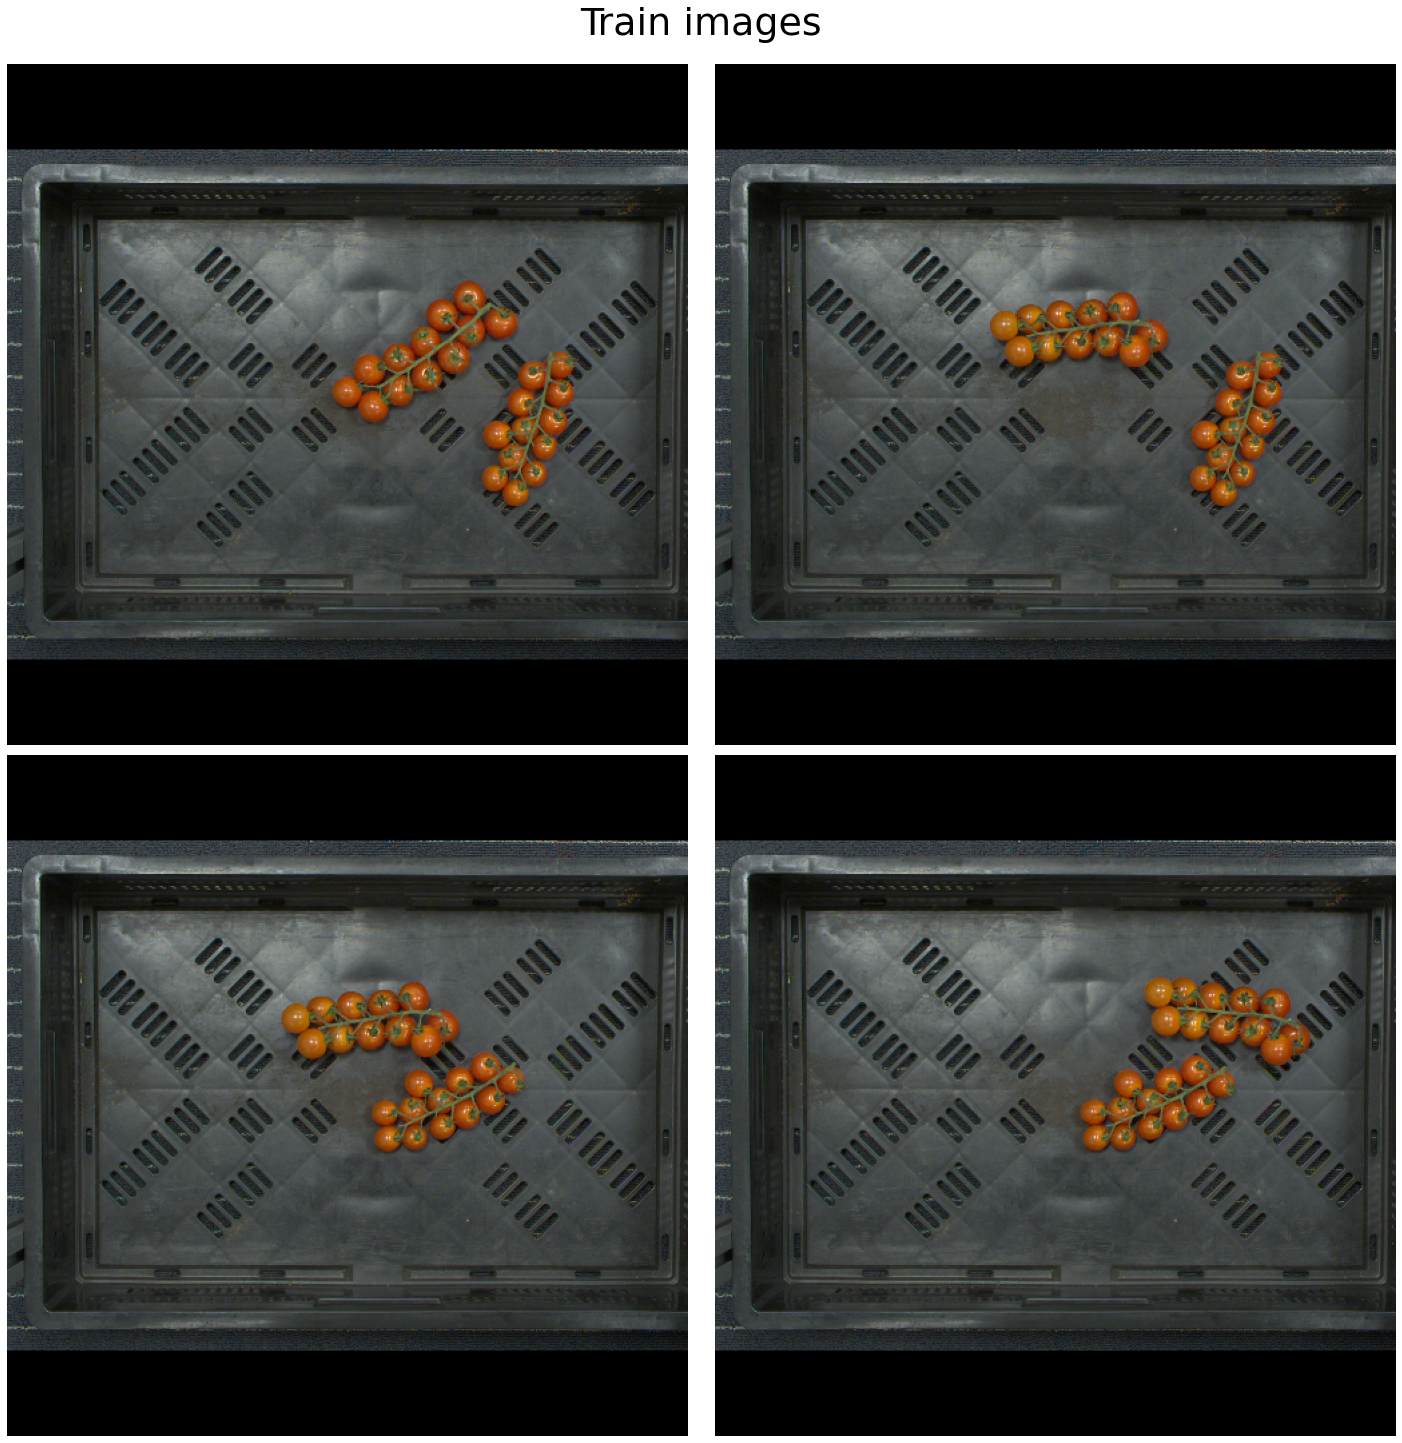

In [198]:
def prepare_image(image):
    image, _, ratio = resize_and_pad_image(image, jitter=None)
    image = tf.keras.applications.resnet.preprocess_input(image)
    return tf.expand_dims(image, axis=0), ratio


# val_dataset = tfds.load("coco/2017", split="validation", data_dir="data")
# int2str = dataset_info.features["objects"]["label"].int2str

fig = plt.figure(figsize=(20,20))
plt.suptitle('Train images',fontsize=38, y=1.0)
# for sample in val_dataset.take(4):
for j, sample in enumerate(train_dataset.take(4)):
# for sample in test_dataset.take(4):
    image = tf.cast(sample["image"], dtype=tf.float32)
    
    # Ground truth
    _bboxes = sample["objects"]["bbox"].numpy()
    bboxes = []
    for i in range(len(_bboxes)):
        box = [x*desired_size for x in _bboxes[i]]
        bboxes.append(box)
        
    classes = ['tomato']*len(bboxes)
    scores = [1]*len(bboxes)
    
    # Prediction
    input_image, ratio = prepare_image(image)
    detections = inference_model.predict(input_image)
    num_detections = detections.valid_detections[0]
    class_names = [
        int(x) for x in detections.nmsed_classes[0][:num_detections]
    ]
    bboxes_pred = swap_xy(detections.nmsed_boxes[0][:num_detections] / ratio)
    
    print(f'Prediction: {num_detections} detections')
    
    ax = fig.add_subplot(2, 2, j+1)
    # Prediction visualisation
    visualize_detections(
        image,
        bboxes_pred,
        class_names,
        detections.nmsed_scores[0][:num_detections],
        ax=ax
    )
plt.tight_layout()
    

    
#     # Ground truth visualisation
#     visualize_detections(
#     image,
#     bboxes,
#     classes,
#     scores,
#     )
    
#     print('Ground truth')

# fig = plt.figure(figsize=(20,20))
# plt.suptitle('Val images',fontsize=38, y=1.0)
# for j, sample in enumerate(val_dataset.take(4)):
# # for j, sample in enumerate(train_dataset.take(4)):
# # for sample in test_dataset.take(4):
#     image = tf.cast(sample["image"], dtype=tf.float32)
    
#     # Ground truth
#     _bboxes = sample["objects"]["bbox"].numpy()
#     bboxes = []
#     for i in range(len(_bboxes)):
#         box = [x*desired_size for x in _bboxes[i]]
#         bboxes.append(box)
        
#     classes = ['tomato']*len(bboxes)
#     scores = [1]*len(bboxes)
    
#     # Prediction
#     input_image, ratio = prepare_image(image)
#     detections = inference_model.predict(input_image)
#     num_detections = detections.valid_detections[0]
#     class_names = [
#         int(x) for x in detections.nmsed_classes[0][:num_detections]
#     ]
#     bboxes_pred = swap_xy(detections.nmsed_boxes[0][:num_detections] / ratio)
      
#     ax = fig.add_subplot(2, 2, j+1)
#     # Prediction visualisation
#     visualize_detections(
#         image,
#         bboxes_pred,
#         class_names,
#         detections.nmsed_scores[0][:num_detections],
#         ax=ax
#     )
# plt.tight_layout()

# fig = plt.figure(figsize=(20,20))
# plt.suptitle('Test images',fontsize=38, y=1.0)
# # for sample in val_dataset.take(4):
# # for j, sample in enumerate(train_dataset.take(4)):
# for j, sample in enumerate(test_dataset.take(4)):
#     image = tf.cast(sample["image"], dtype=tf.float32)
    
#     # Ground truth
#     _bboxes = sample["objects"]["bbox"].numpy()
#     bboxes = []
#     for i in range(len(_bboxes)):
#         box = [x*desired_size for x in _bboxes[i]]
#         bboxes.append(box)
        
#     classes = ['tomato']*len(bboxes)
#     scores = [1]*len(bboxes)
    
#     # Prediction
#     input_image, ratio = prepare_image(image)
#     detections = inference_model.predict(input_image)
#     num_detections = detections.valid_detections[0]
#     class_names = [
#         int(x) for x in detections.nmsed_classes[0][:num_detections]
#     ]
#     bboxes_pred = swap_xy(detections.nmsed_boxes[0][:num_detections] / ratio)
      
#     ax = fig.add_subplot(2, 2, j+1)
#     # Prediction visualisation
#     visualize_detections(
#         image,
#         bboxes_pred,
#         class_names,
#         detections.nmsed_scores[0][:num_detections],
#         ax=ax
#     )
# plt.tight_layout()

In [84]:
def plot_training_history(history, model, title):
#     plt.plot(history.history['accuracy'])
#     plt.plot(history.history['val_accuracy'])
#     plt.ylabel('accuracy')
#     plt.xlabel('epoch')
#     plt.legend(['training', 'validation'], loc='best')
#     plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
#     plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.ylim(0, 5)
    plt.title(title)
    plt.show()

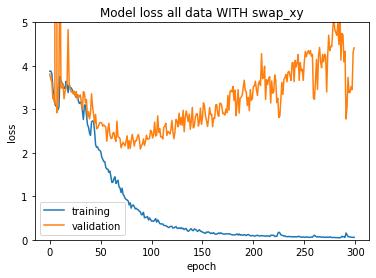

In [86]:
plot_training_history(history, model, title='Model loss all data WITH swap_xy')

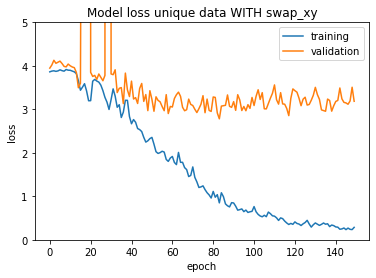

In [147]:
plot_training_history(history, model, title='Model loss unique data WITH swap_xy')

### Save model

In [130]:
model.save(path + '/model')

INFO:tensorflow:Assets written to: C:\Users\jensz\Documents\Studie\Thesis\Hugo's internship\Final_Tomato_Detection/model\assets


INFO:tensorflow:Assets written to: C:\Users\jensz\Documents\Studie\Thesis\Hugo's internship\Final_Tomato_Detection/model\assets


In [147]:
model.summary()

Model: "RetinaNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 FeaturePyramid (FeaturePyra  multiple                 31585152  
 mid)                                                            
                                                                 
 sequential_10 (Sequential)  (None, None, None, 9)     2381065   
                                                                 
 sequential_11 (Sequential)  (None, None, None, 36)    2443300   
                                                                 
Total params: 36,409,517
Trainable params: 36,356,397
Non-trainable params: 53,120
_________________________________________________________________
